In [9]:
import sys
import uproot
import uproot._connect._pandas
import concurrent.futures

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic
from root_pandas import read_root

specify repository path where helper functions are written, and import these functions

In [10]:
sys.path.insert(0, '/eos/user/m/manoj/hgcal-electron-pion-classification/Analysis/')

from data import load_data, x_times_e
from observables import *
from helpers import *

##### Files in a directory

In [16]:
directory = '/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/v2/withMCP/beamAngleCorrected/'
energies = [20, 30, 50, 80, 100, 200, 250, 300]

In [12]:
dataset_dir = "/eos/user/m/manoj/processed_files/"

In [13]:
columns = ['rechit_layer','rechit_energy','rechit_x','rechit_y','rechit_z']

In [14]:
# import os
# for pdgId in [11,211]:
#     if pdgId == 11:
#         print("Electrons .......")
#         hdf_file = dataset_dir+"electron_"
#     else:
#         print("Pions .......")
#         flag = None
#         hdf_file = dataset_dir+"pion_"    
#     for energy in energies:
#         temp_file = hdf_file + "%iGeV.h5"%energy
#         print(temp_file)
#         file = directory + 'ntuple_sim_config22_pdgID%i_beamMomentum%i_listFTFP_BERT_EMM.root' %(pdgId,energy)
#         os.system("python ../Analysis/preprocess.py "+ file +" "+ temp_file)

## FINAL STRUCTURE OF DATASET
[total_energy,baryX,baryY,baryZ,dR,hits]

## Re-calculating BaryX

##### Write dataset info into hdf file

##### Get event's info and write result into corresponding files.

In [53]:
# energies = [30]#, 80, 100, 200, 250, 300]
# executor = concurrent.futures.ThreadPoolExecutor(16) # threads in pool
# chunksize = 10000
# columns = ['rechit_layer','rechit_energy','rechit_x','rechit_y','rechit_z']
# flag = None

# layers = []
# ds_columns = ['beamE','baryX','baryY','baryZ','dR','hits','Etotal','E1to20','E21to28','E1to28',
#               'E29to40','E1to10byEtot','E1to2byEtot','E26to28byEtot','E1to20byE21to28']

# for i in range (1,41):
#     layers.append("E%i"%i)

# for pdgId in [11]:
#     if pdgId == 11:
#         print("Electrons .......")
#         flag = 'EE'
#         hdf_file = dataset_dir+"electron_test"
#     else:
#         print("Pions .......")
#         flag = None
#         hdf_file = dataset_dir+"pion_"    
#     for energy in energies:
#         file = directory + 'ntuple_sim_config22_pdgID%i_beamMomentum%i_listFTFP_BERT_EMM.root' %(pdgId,energy)
        
#         hits = uproot.open(file)['rechitntupler/hits']
#         no_of_events = len(hits['event'].array())
#         beamE = hits['beamEnergy'].array()[0]
#         start = 0
#         dataset = pd.DataFrame(columns = ds_columns + layers) # empty dataframe
#         no_of_events = 20000
#         while start < no_of_events:
#             end = start + chunksize
#             if end > no_of_events:
#                 end = start + no_of_events % chunksize

#             df = hits.pandas.df(columns, entrystart = start,entrystop = end,
#                                 flatten = True,executor = executor)
#             start = end
            
# #             if flag == 'EE': # electromagnatic chamber
# #                 sel = (df.rechit_energy > 0.50) & (df.rechit_layer < 29) # remove insentric noise
# #             else:
#             sel = (df.rechit_energy > 0.50)
#             df = df[sel]
        
#             df.dropna(subset=['rechit_energy']) # drop missing rows
#             x_times_e(df) # add x * energy in dataset
            
#             df = df.reset_index(level=1,drop=True)
#             df.index.name = 'event'
            
#             _temp = pd.DataFrame(columns = ds_columns) # emplty dataframe

#             _temp.baryX = get_barycenter(df,'x')
#             _temp.baryY = get_barycenter(df,'y')
#             _temp.baryZ = get_barycenter(df,'z')

#             _temp.Etotal = total_energy(df)
#             _temp.dR = get_dr(_temp.baryX,_temp.baryY)
#             _temp.hits = [float(hit) for hit in df.groupby(['event']).size().values]
            
#             # E1-E20
#             _temp.E1to20 = enrgy_bw_layer(df,1,20)
#             # E21-E28
#             _temp.E21to28 = enrgy_bw_layer(df,21,28)
#             #E1-E28
#             _temp.E1to28 = enrgy_bw_layer(df,1,28)
#             #E29-E40
#             _temp.E29to40 = enrgy_bw_layer(df,29,40)
#             # E1-E8
#             # _temp.E1to8 = enrgy_bw_layer(df,1,8)
            
#             # E1-E2 / Etot
#             _temp.E1to2byEtot = enrgy_bw_layer(df,1,2)
#             # E26-E28 / Etot
#             _temp.E26to28byEtot = enrgy_bw_layer(df,26,28)
#             # E1-E10 / Etot
#             _temp.E1to10byEtot = enrgy_bw_layer(df,1,10)
            
#             # E1-E8 / E1-E20
#             # _temp.E1to8byE1to20 = _temp.E1to8 / _temp.E1to20
#             # E1-E20 / E21-E28
#             _temp.E1to20byE21to28 = _temp.E1to20 / _temp.E21to28
            
#             # get per layer energy
#             _temp = pd.concat([_temp,get_layers_df(df,_temp.index.unique(),layers)],axis=1)
#             dataset = dataset.append(_temp)
#             df, _temp = None, None
#         dataset.index.name = 'event'
#         dataset.beamE = beamE
        
#         print("No of events in %iGeV run = "%energy,len(dataset))
#         print("writing %iGev beam energy's data."%energy)
#         hdf = pd.HDFStore(hdf_file+"%iGeV.h5"%energy, mode = 'a') # open file in append mode
#         hdf.put('beam_%GeV'%energy,dataset,data_columns=True) 
#         hdf.close()
#         dataset = None

##### Get profiles and write result into corresponding files.

In [8]:
# columns = ['rechit_layer','rechit_energy','rechit_x','rechit_y']
# flag = None
# for pdgId in [11,211]:
#     if pdgId == 11:
#         print("Electrons .......")
#         flag = 'EE'
#         hdf_file = dataset_dir+"electron_"
#     else:
#         print("Pions .......")
#         flag = None
#         hdf_file = dataset_dir+"pion_"    
#     for energy in energies:
#         file = directory + 'ntuple_sim_config22_pdgID%i_beamMomentum%i_listFTFP_BERT_EMM.root' %(pdgId,energy)
        
#         hits = uproot.open(file)['rechitntupler/hits']
#         no_of_events = len(hits['event'].array())
#         start = 0
        
#         dr, df_long, df_hits = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        
#         count = 0
#         while start < no_of_events:
#             end = start + chunksize
#             if end > no_of_events:
#                 end = start + no_of_events % chunksize

#             df = hits.pandas.df(columns, entrystart = start,entrystop = end,
#                                 flatten = True,executor = executor)
#             start = end
#             df = df[df.rechit_energy > 0.50]
#             if flag == 'EE':
#                 df = df[df.rechit_layer < 29]

#             df.dropna(subset=['rechit_energy']) # drop missing rows
#             df['x_timesE'] = df.rechit_energy * df['rechit_x']
#             df['y_timesE'] = df.rechit_energy * df['rechit_y']
            
#             df = df.reset_index(level=1,drop=True)
#             df.index.name = 'event'

#             # get dr / radial profile
#             dfg = get_hypot(df).to_frame().rename(columns = {0: "dR"})
#             fgh = df.rechit_layer.to_frame()
            
#             dr = dr.append(pd.concat([dfg,fgh],axis=1))
#             dfg, fgh = None, None # free momory

#             # get long. profile
#             df_long = df_long.append(df.groupby(['event','rechit_layer'])['rechit_energy'].sum().
#                                      to_frame().reset_index(level=1))
#             # get hits
#             df_hits = df_hits.append(df.groupby(['event','rechit_layer']).size().to_frame().
#                            reset_index(level=1).rename(columns = {0: "nhits"}))
#         df = None
        
#         dr.dropna(how ='any')
#         x = dr.rechit_layer.values
#         dr = dr.dR.values
#         x_med, y_med = binned_statistic(x, [x,dr], bins = 40, statistic='median').statistic
#         fgh = pd.DataFrame(columns=['dR'])
#         fgh.dR = y_med[~np.isnan(x_med)]
#         dr, x_med, y_med = None, None, None
        
#         hdf = pd.HDFStore(hdf_file+"%iGeV.h5"%energy, mode = 'a') # open file in append mode
#         hdf.put('beam_%GeV_radProfile'%energy,fgh,data_columns=True)
        
#         hdf = pd.HDFStore(hdf_file+"%iGeV.h5"%energy, mode = 'a') # open file in append mode
#         hdf.put('beam_%GeV_avgHits'%energy,df_hits.groupby('rechit_layer')['nhits'].mean(),
#                 data_columns=True) 
#         hdf.put('beam_%GeV_longProfile/mean'%energy,df_long.groupby('rechit_layer')['rechit_energy'].mean(),
#                data_columns=True)
#         hdf.put('beam_%GeV_longProfile/median'%energy,df_long.groupby('rechit_layer')['rechit_energy'].median(),
#                 data_columns=True)
        
#         df_long , df_hits = None, None
#         print(energy)
#         hdf.close()

In [51]:
directory+"ntuple_sim_config22_pdgID11_beamMomentum0_listFTFP_BERT_EMM.root"

'/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/v2/withMCP/beamAngleCorrected/ntuple_sim_config22_pdgID11_beamMomentum0_listFTFP_BERT_EMM.root'

Files in the directory

### Electrons dataset

##### BaryX

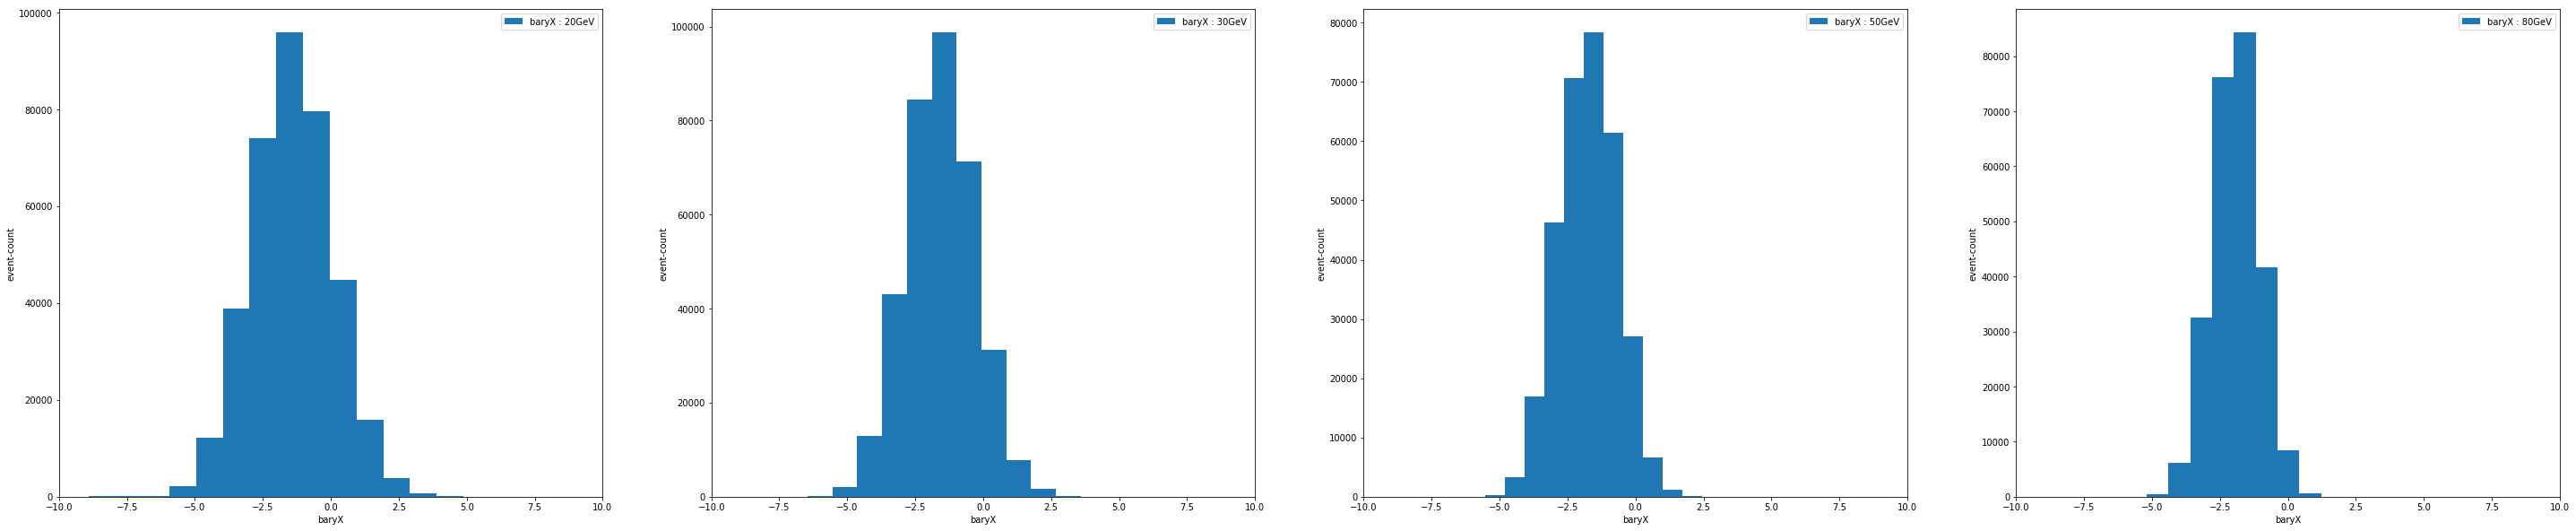

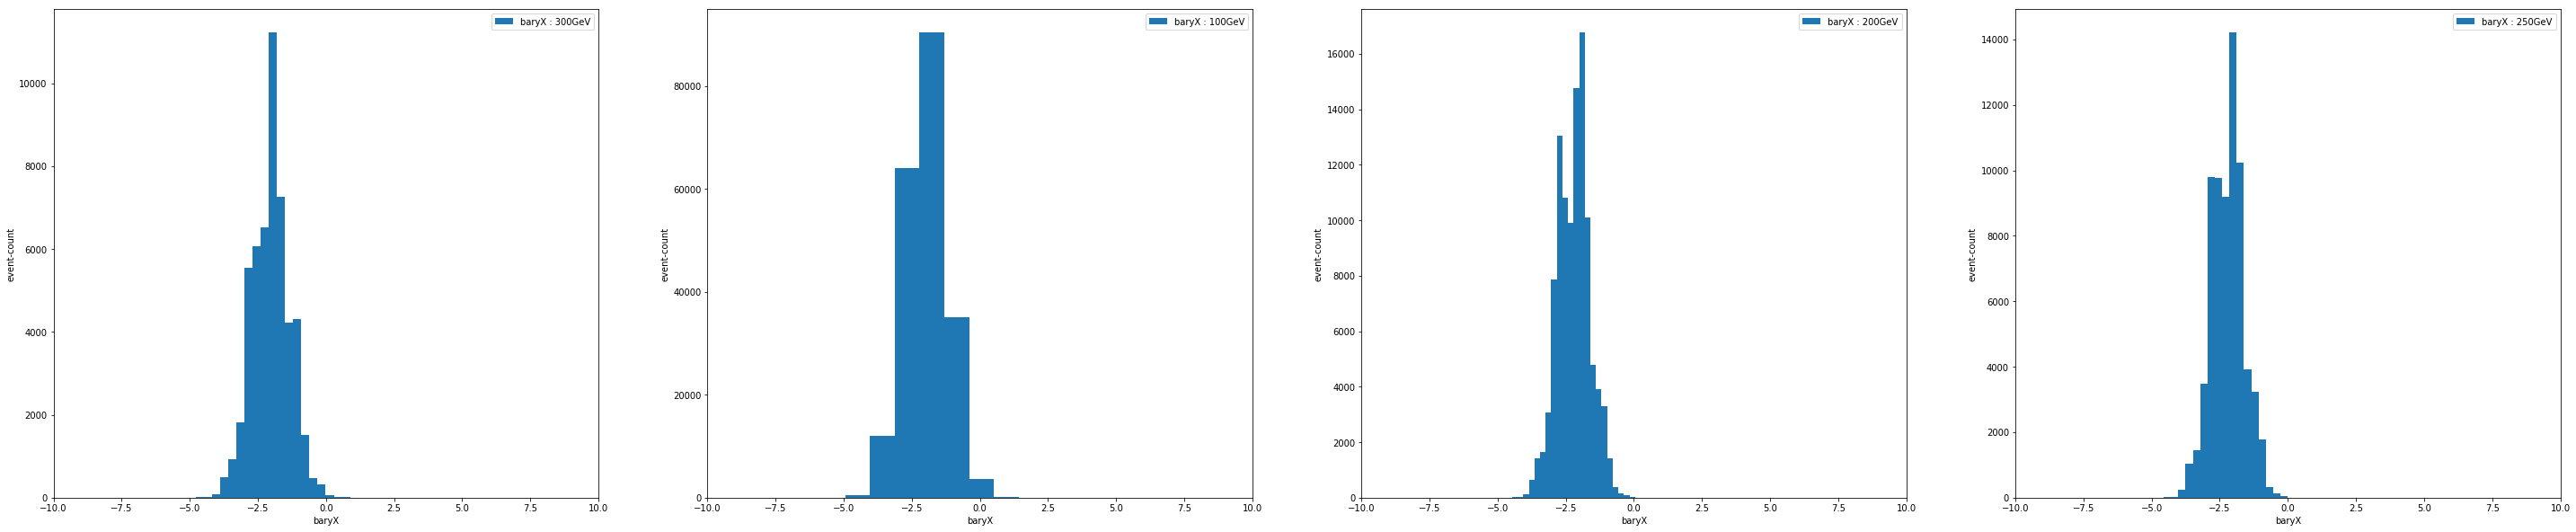

In [17]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.baryX.dropna(), 30, color="C0",label = "baryX : %iGeV"%key)
        plt.xlabel("baryX")
        plt.ylabel("event-count")
        plt.xlim(-10,10)
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.baryX.dropna(), 30, color="C0",label = "baryX : %iGeV"%key)
        plt.xlabel("baryX")
        plt.ylabel("event-count")
        plt.xlim(-10,10)
        plt.legend()
    count += 1

In [11]:
df.columns

Index(['baryX', 'baryY', 'baryZ', 'dR', 'hits', 'Etotal', 'E1to20', 'E21to28',
       'E1to28', 'E29to40', 'E1to10byEtot', 'E1to2byEtot', 'E26to28byEtot',
       'E1to20byE21to28', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29',
       'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39',
       'E40'],
      dtype='object')

##### BaryY

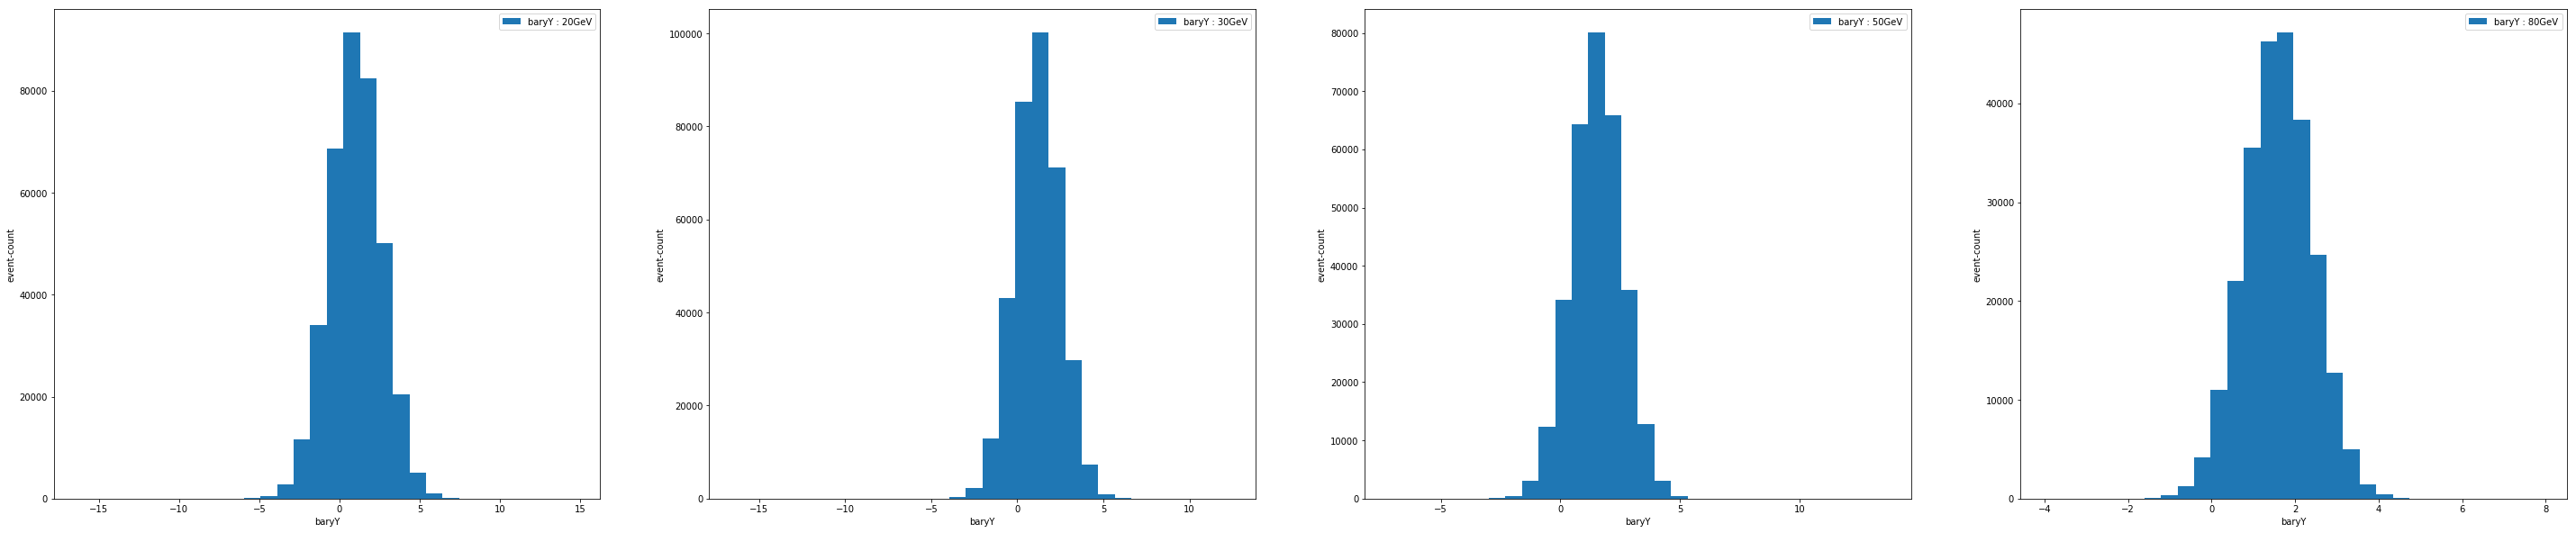

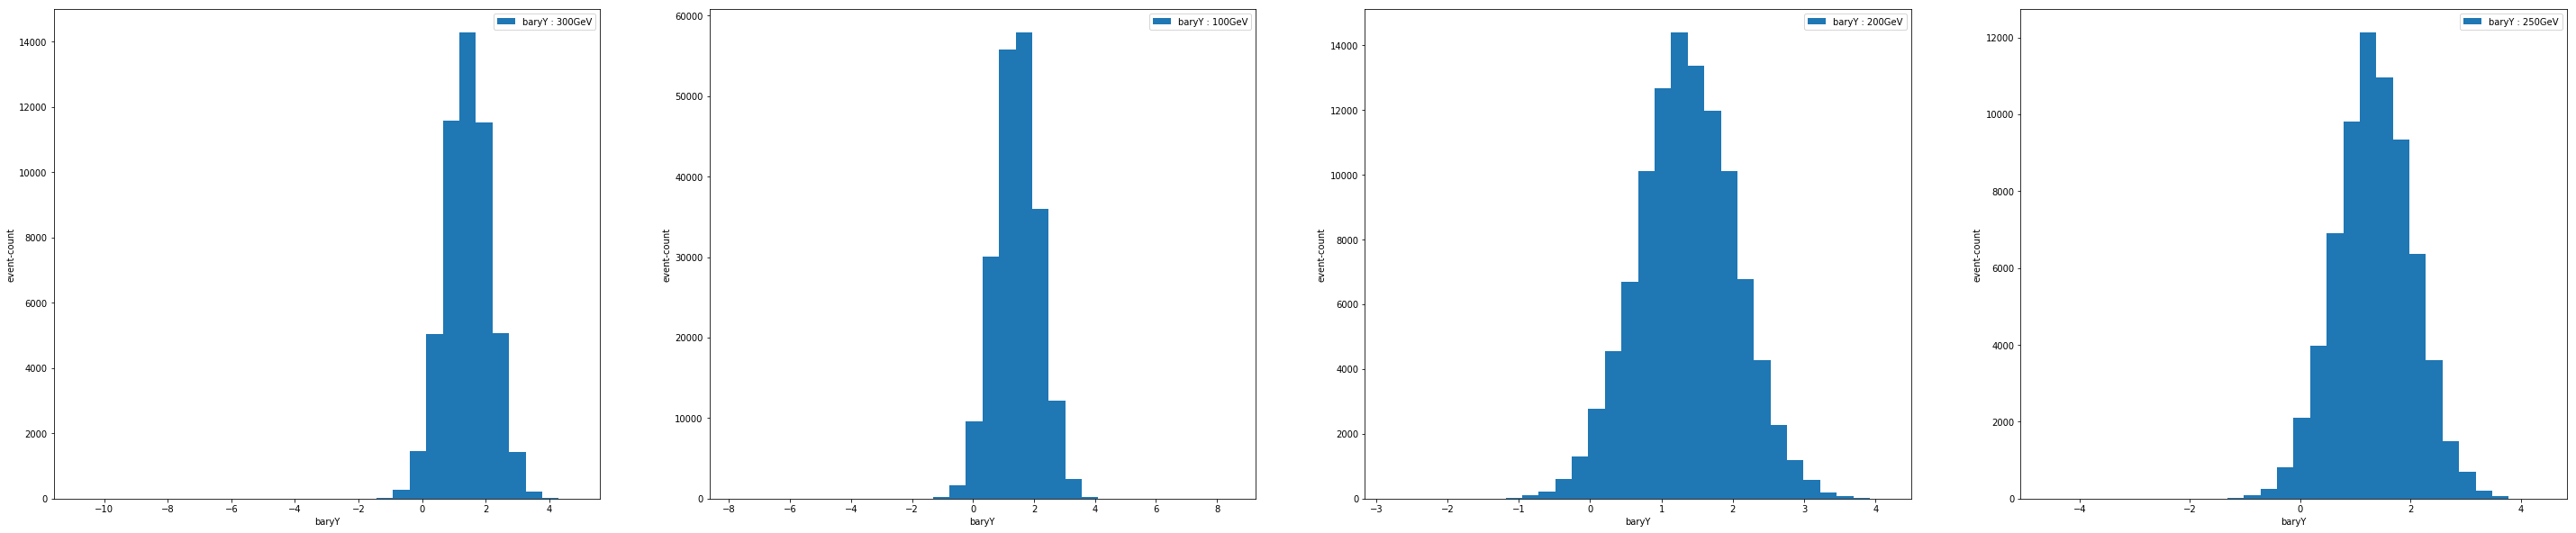

In [12]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.baryY.dropna(), 30, color="C0",label = "baryY : %iGeV"%key)
        plt.xlabel("baryY")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.baryY.dropna(), 30, color="C0",label = "baryY : %iGeV"%key)
        plt.xlabel("baryY")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

##### BaryZ

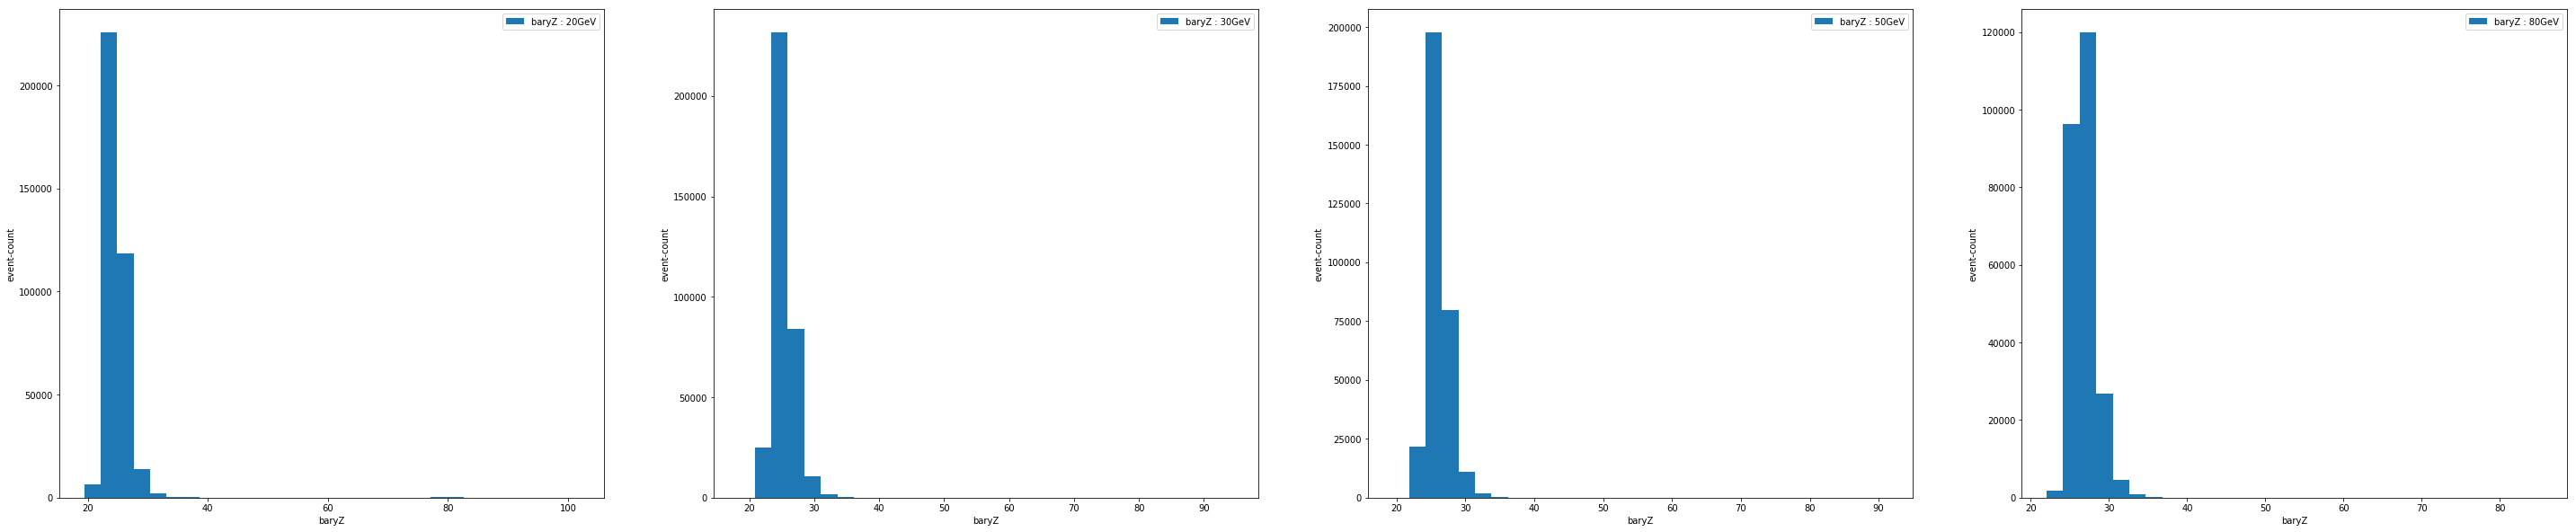

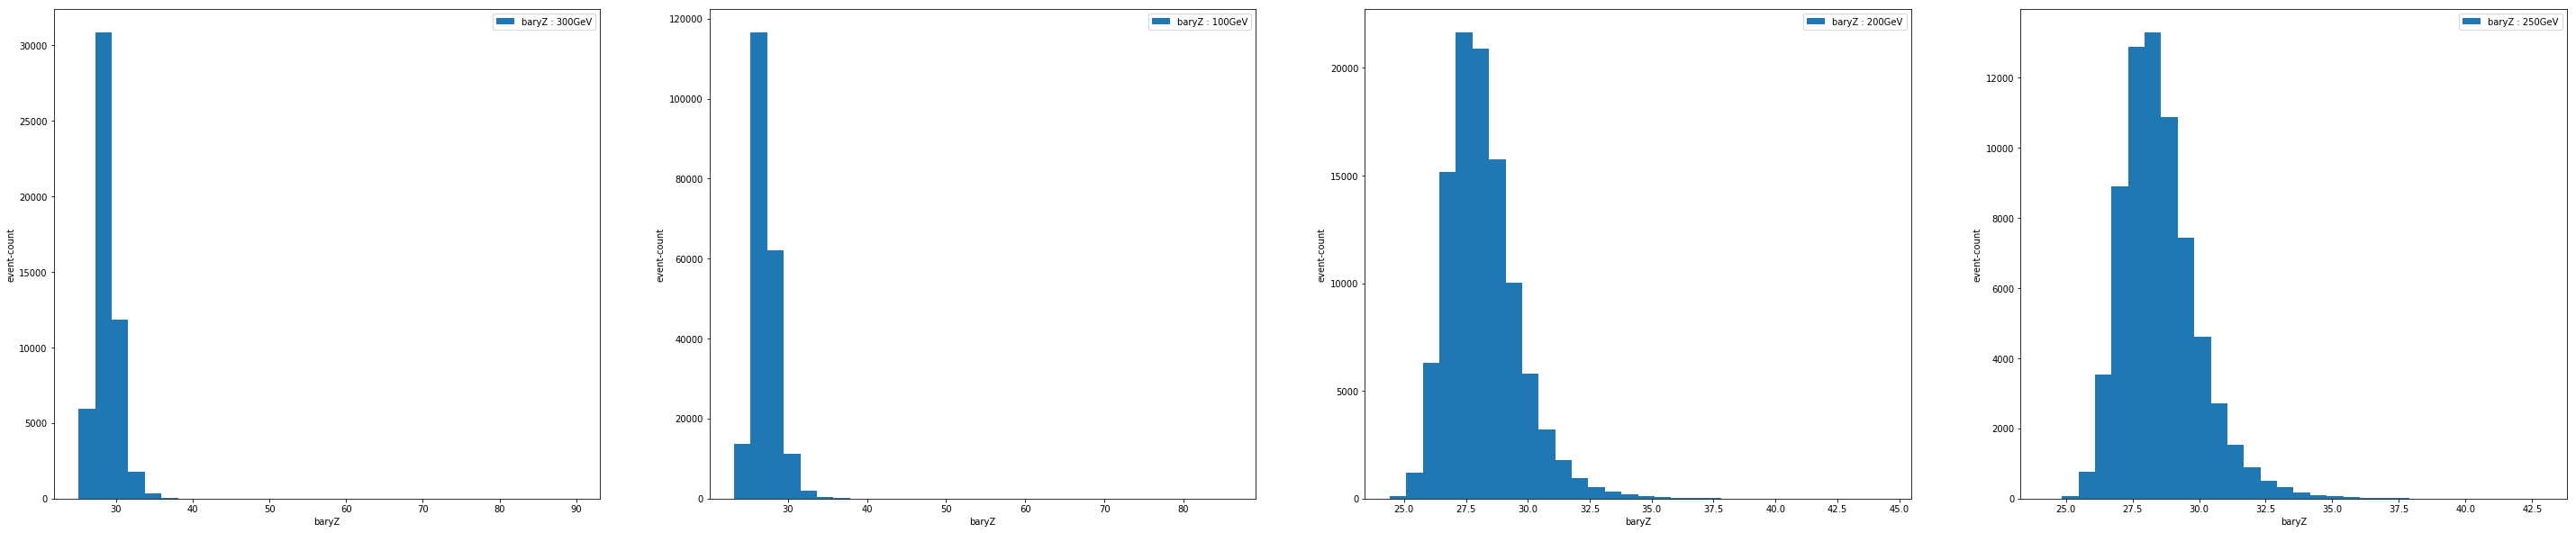

In [13]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.baryZ.dropna(), 30, color="C0",label = "baryZ : %iGeV"%key)
        plt.xlabel("baryZ")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.baryZ.dropna(), 30, color="C0",label = "baryZ : %iGeV"%key)
        plt.xlabel("baryZ")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

##### dR

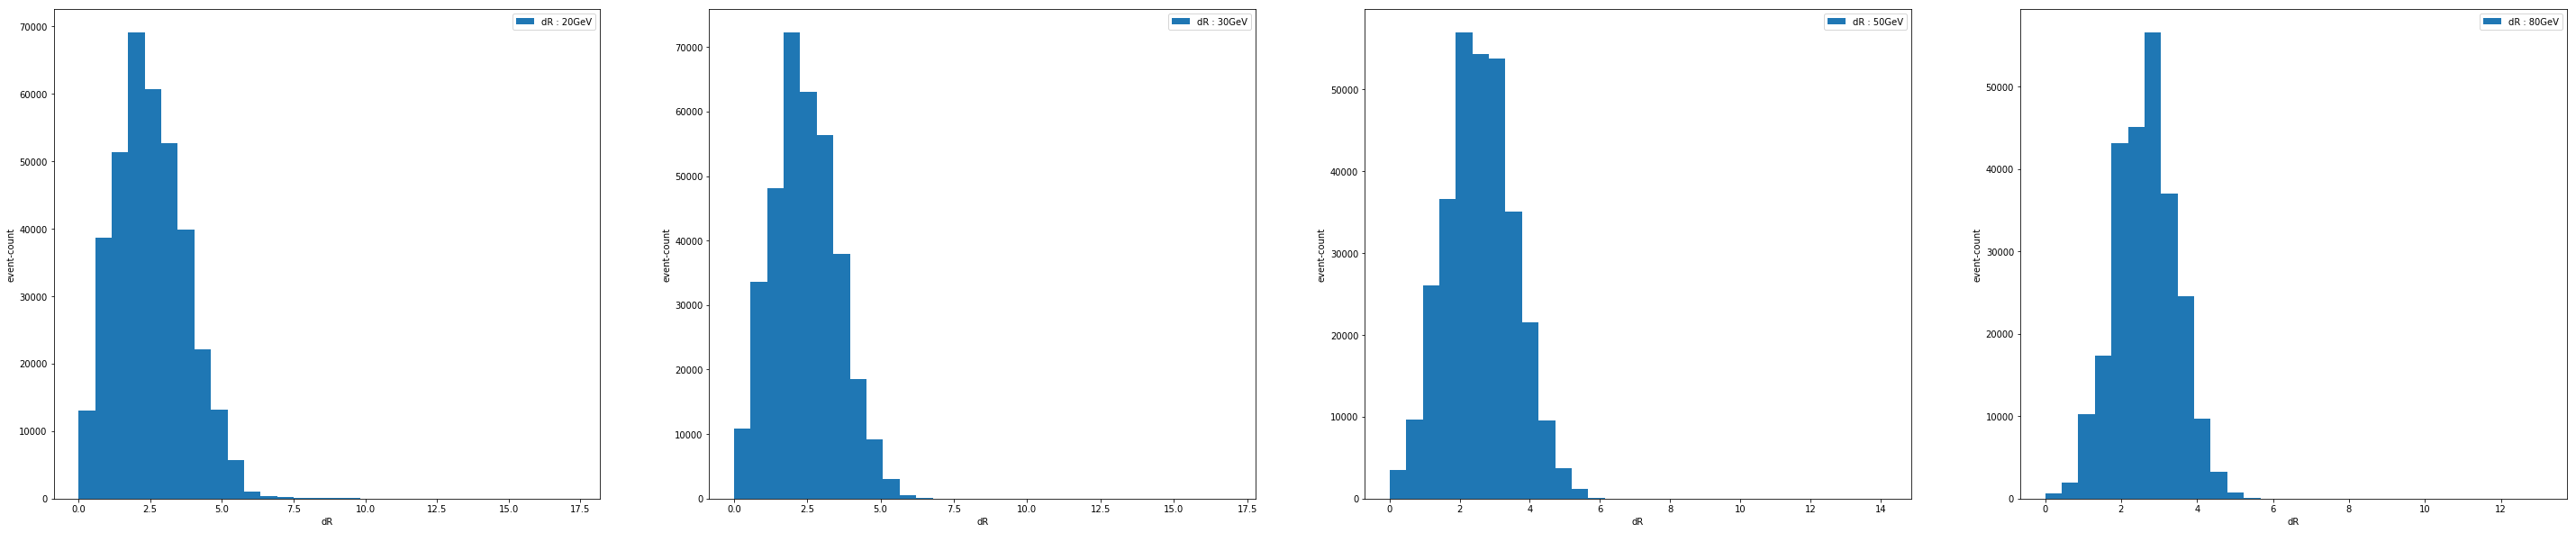

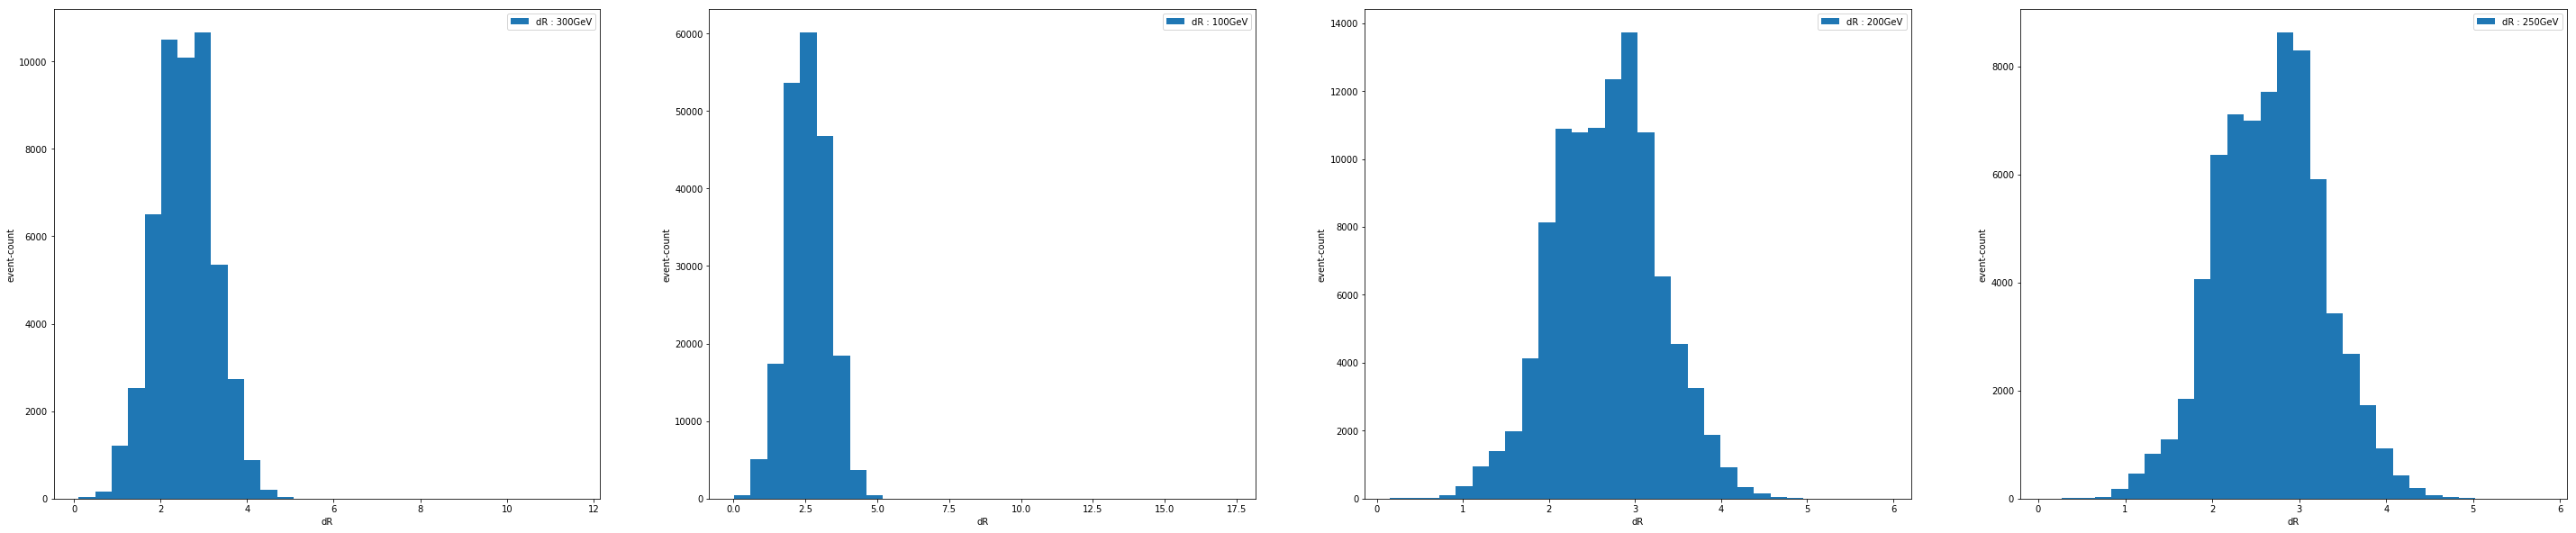

In [14]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.dR.dropna(), 30, color="C0",label = "dR : %iGeV"%key)
        plt.xlabel("dR")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.dR.dropna(), 30, color="C0",label = "dR : %iGeV"%key)
        plt.xlabel("dR")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

##### Hits

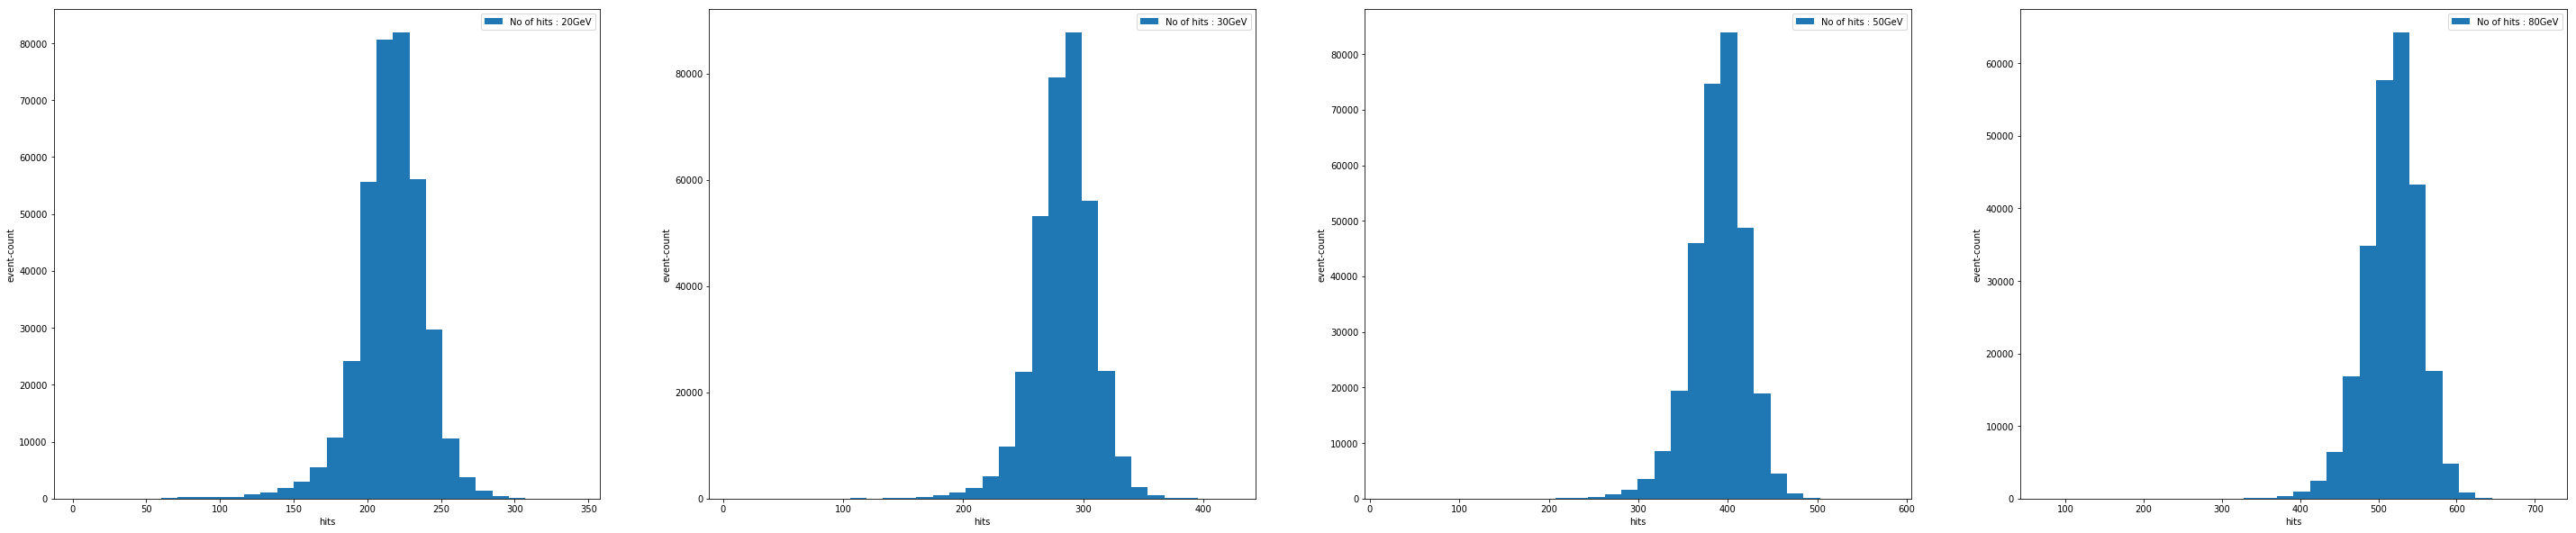

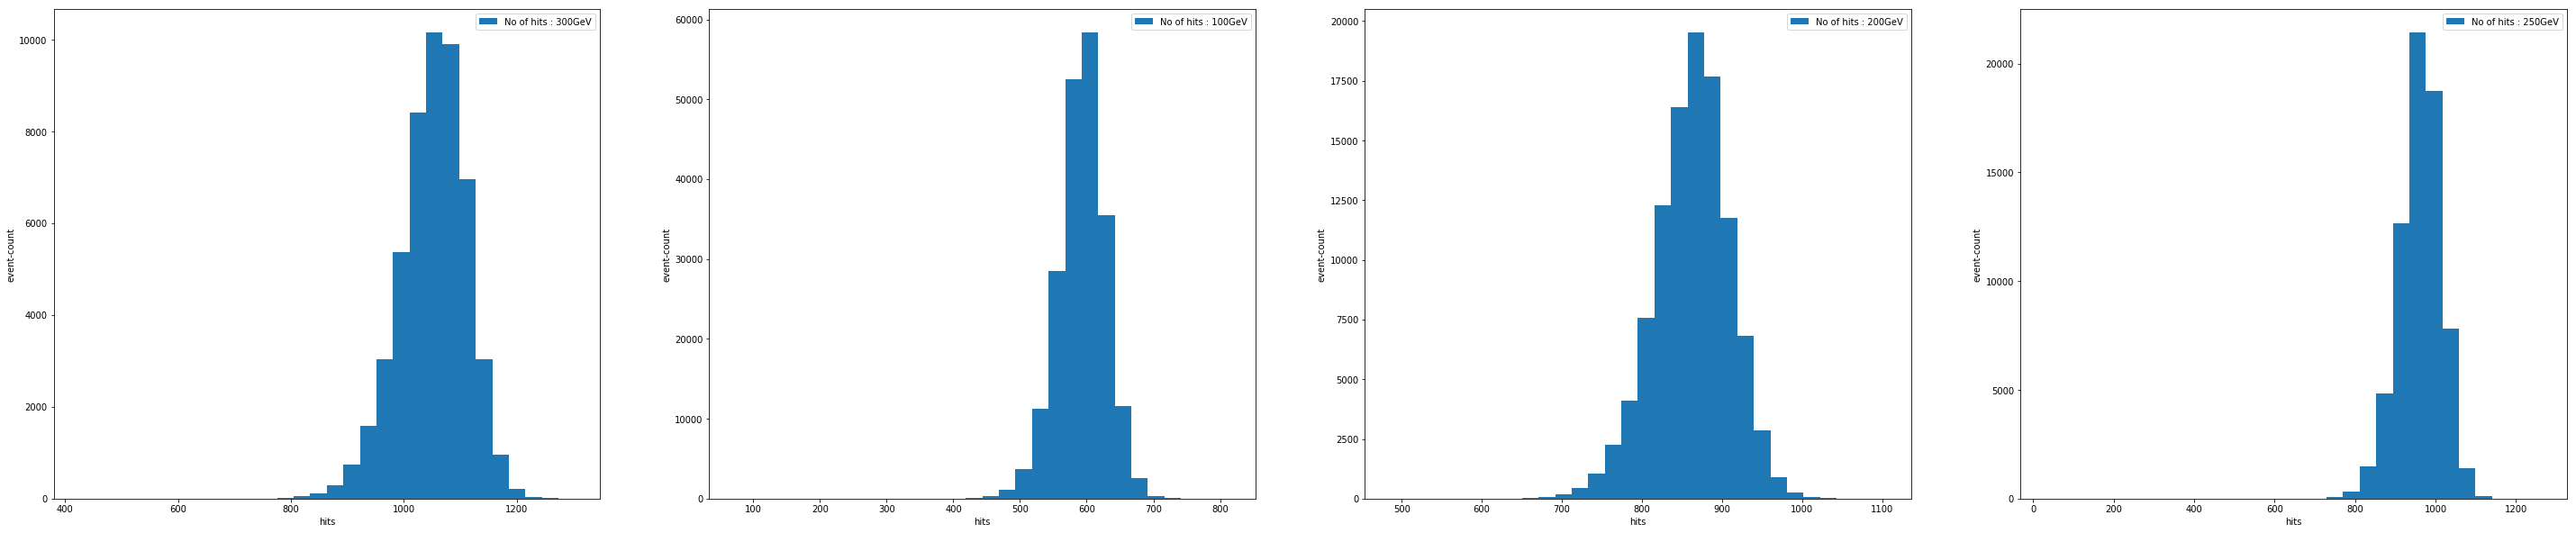

In [15]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.hits, 30, color="C0",label = "No of hits : %iGeV"%key)
        plt.xlabel("hits")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.hits, 30, color="C0",label = "No of hits : %iGeV"%key)
        plt.xlabel("hits")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

### Pions dataset

##### BaryX

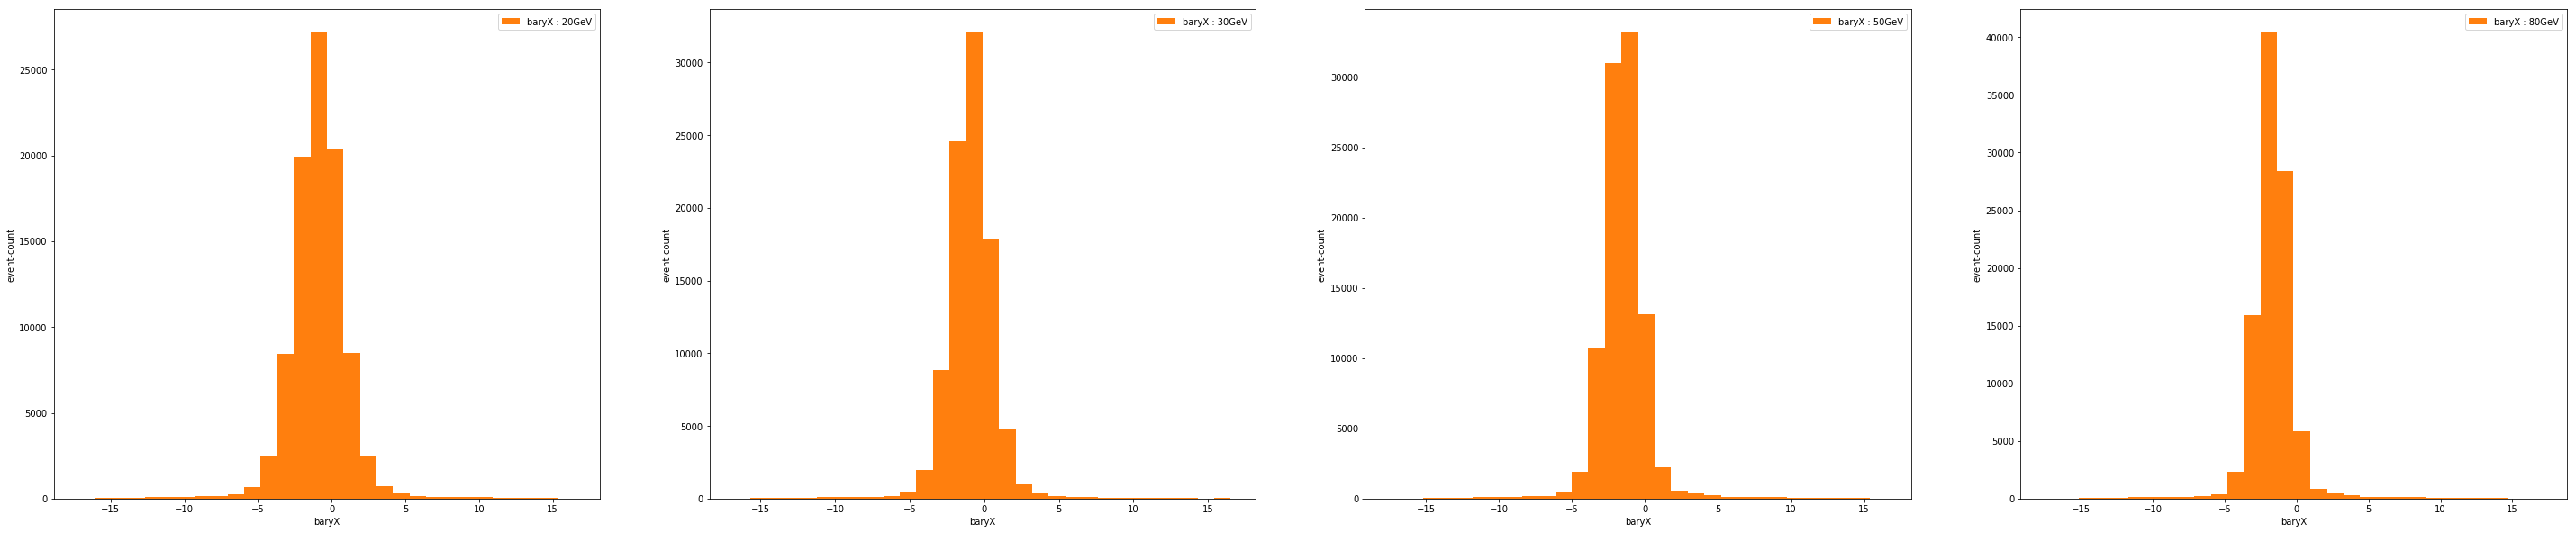

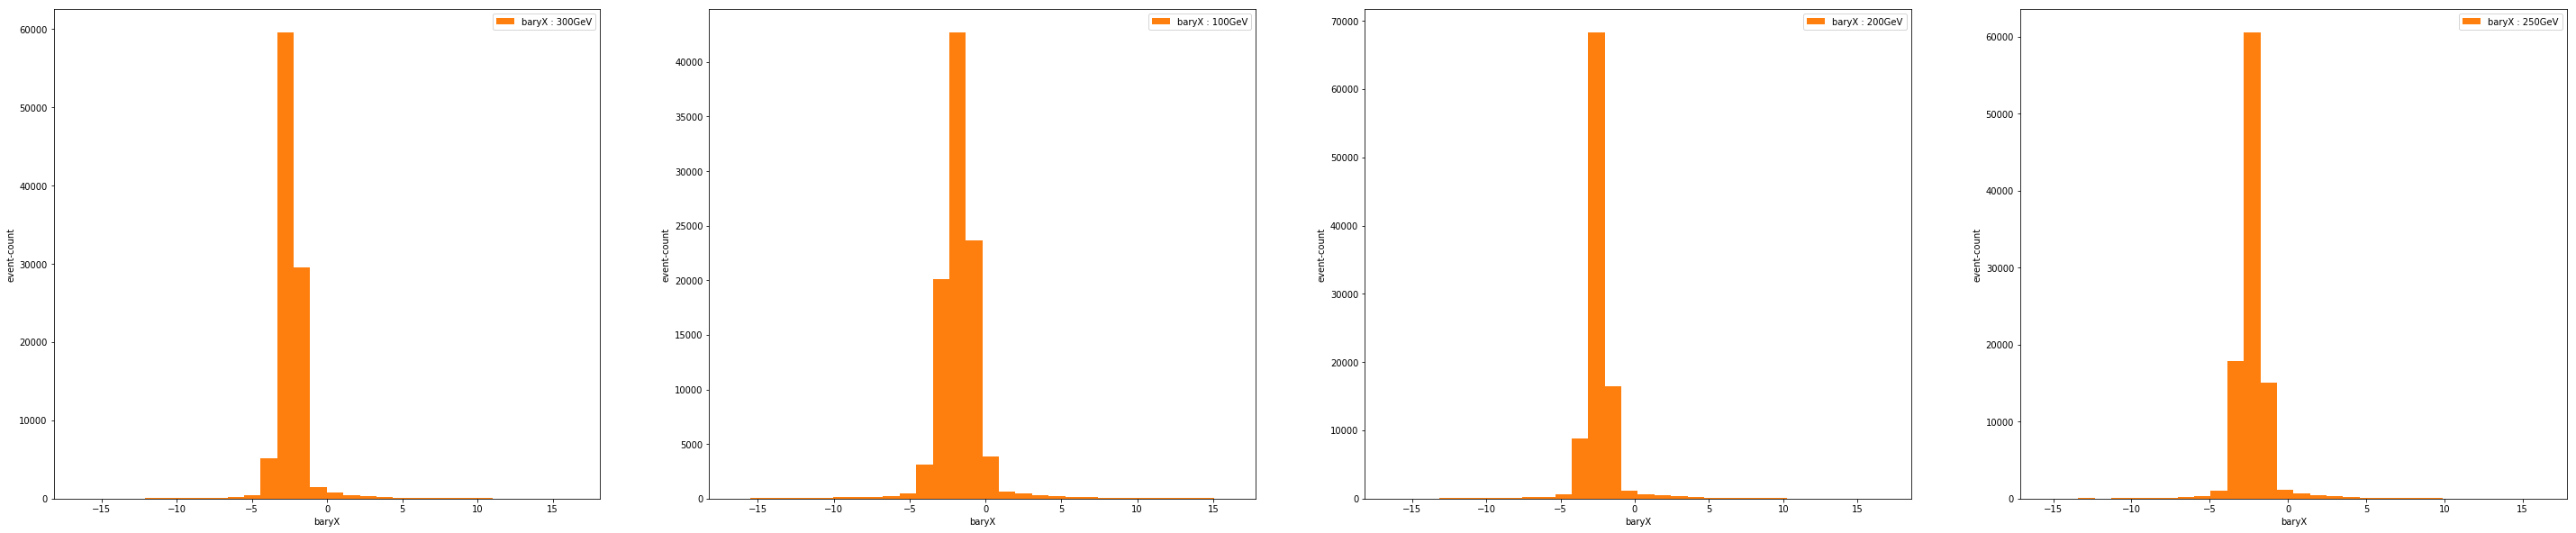

In [16]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.baryX, 30, color="C1",label = "baryX : %iGeV"%key)
        plt.xlabel("baryX")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.baryX, 30, color="C1",label = "baryX : %iGeV"%key)
        plt.xlabel("baryX")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

##### BaryY

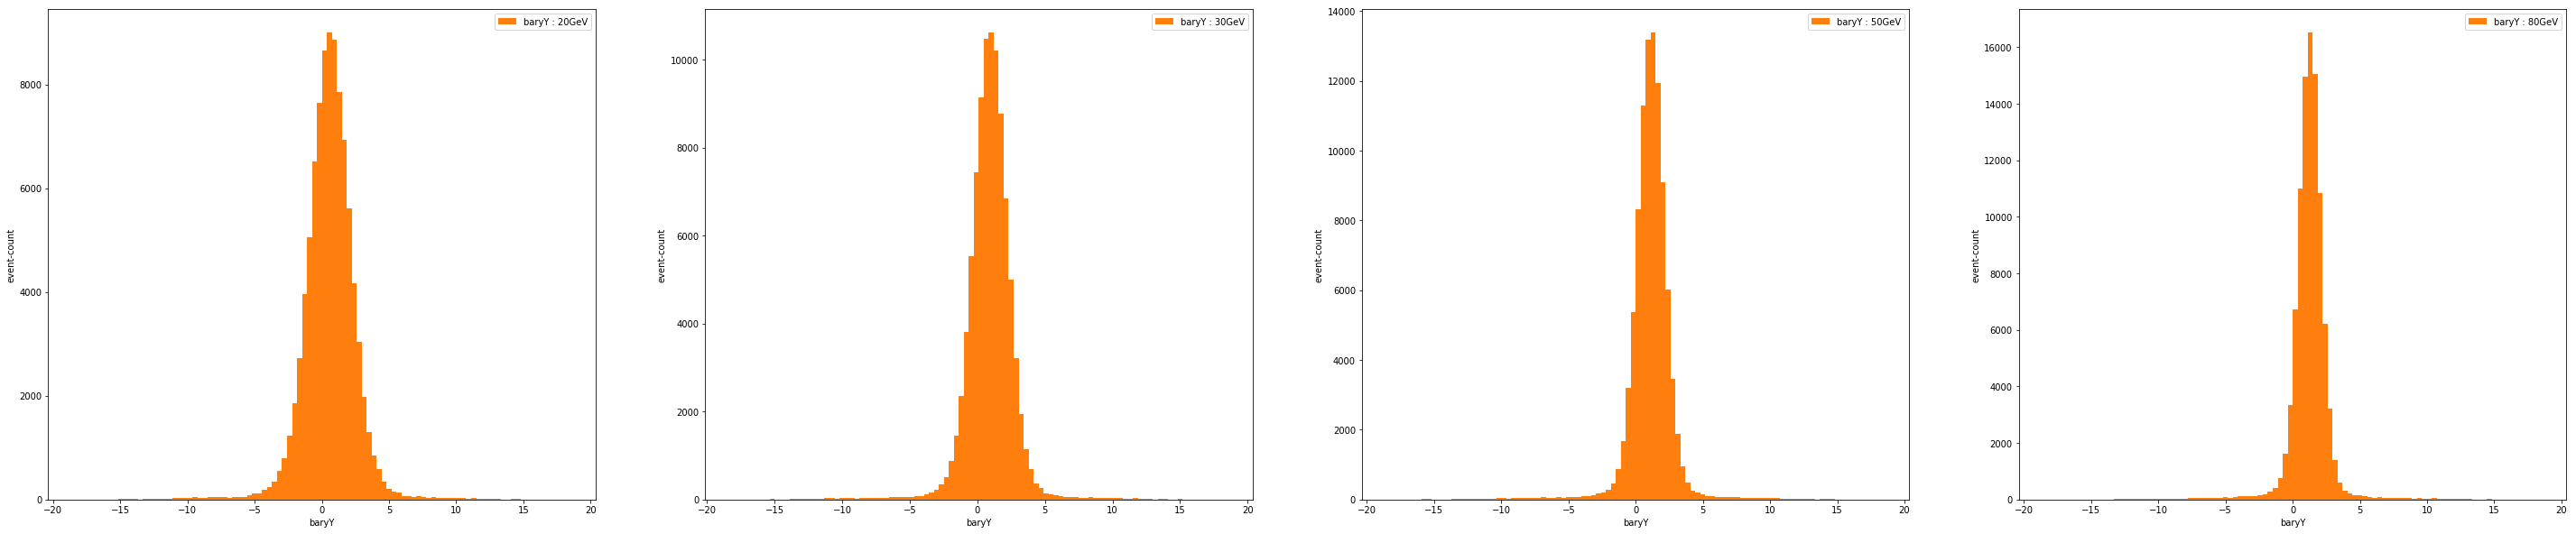

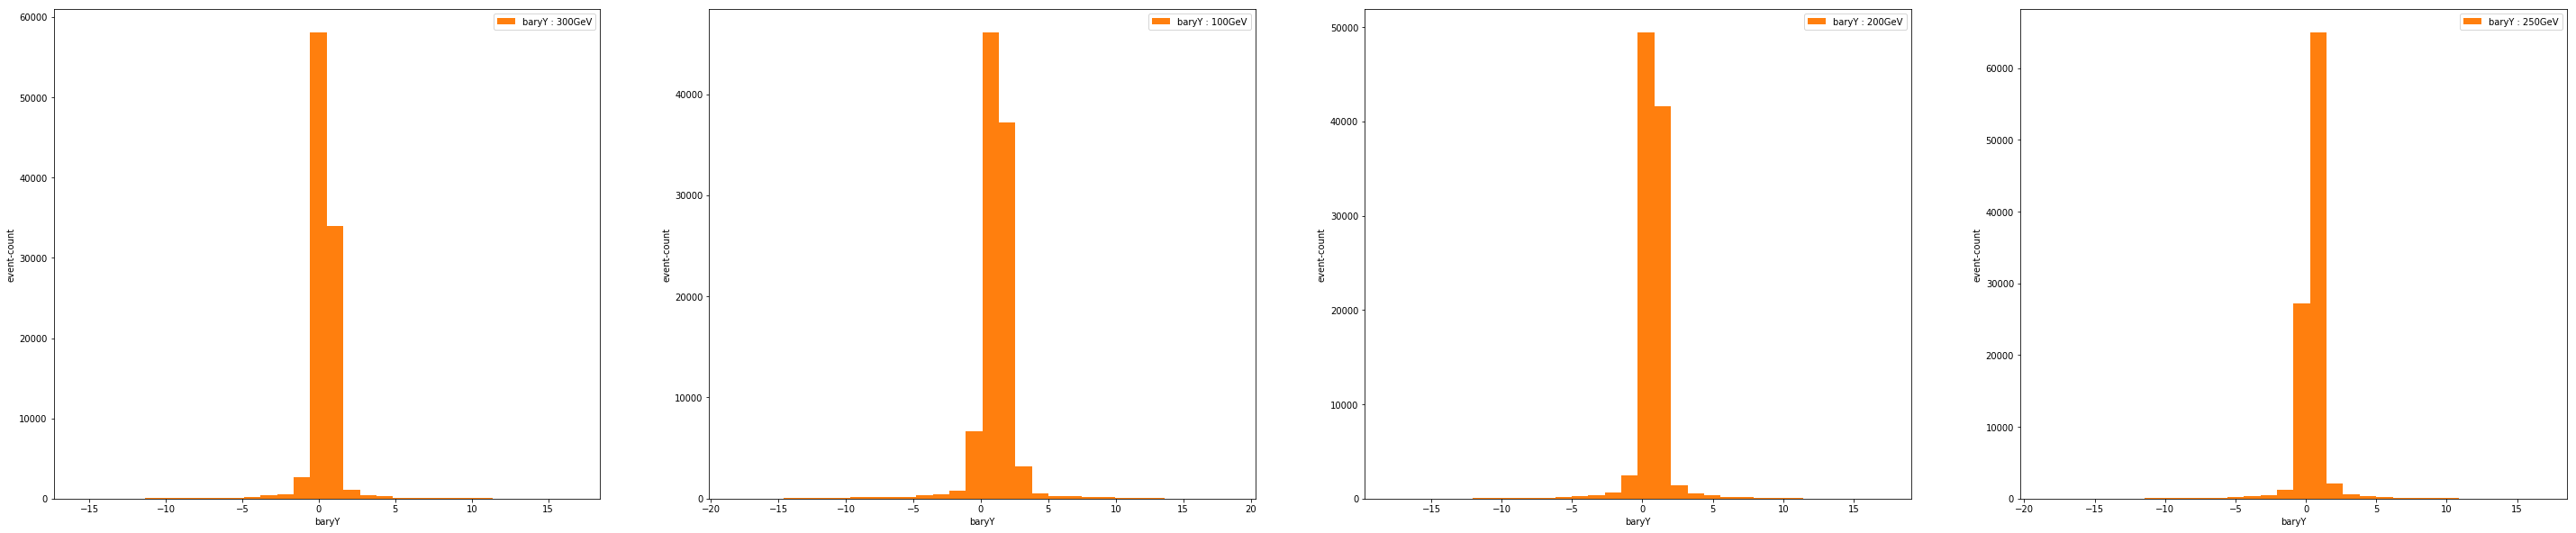

In [17]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.baryY, 100, color="C1",label = "baryY : %iGeV"%key)
        plt.xlabel("baryY")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.baryY, 30, color="C1",label = "baryY : %iGeV"%key)
        plt.xlabel("baryY")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

##### BaryZ

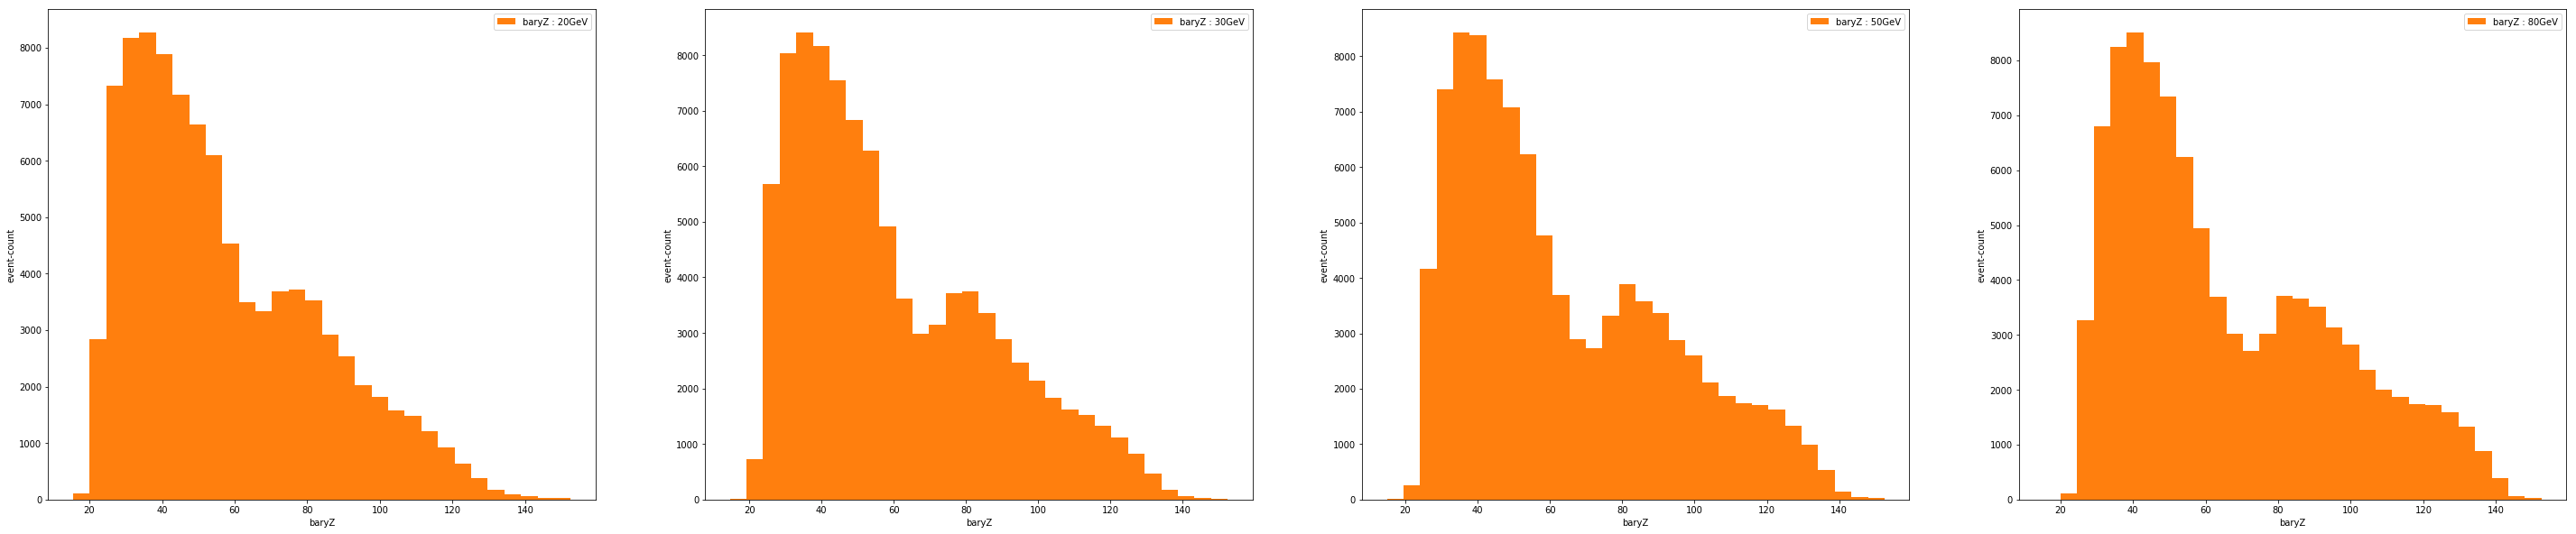

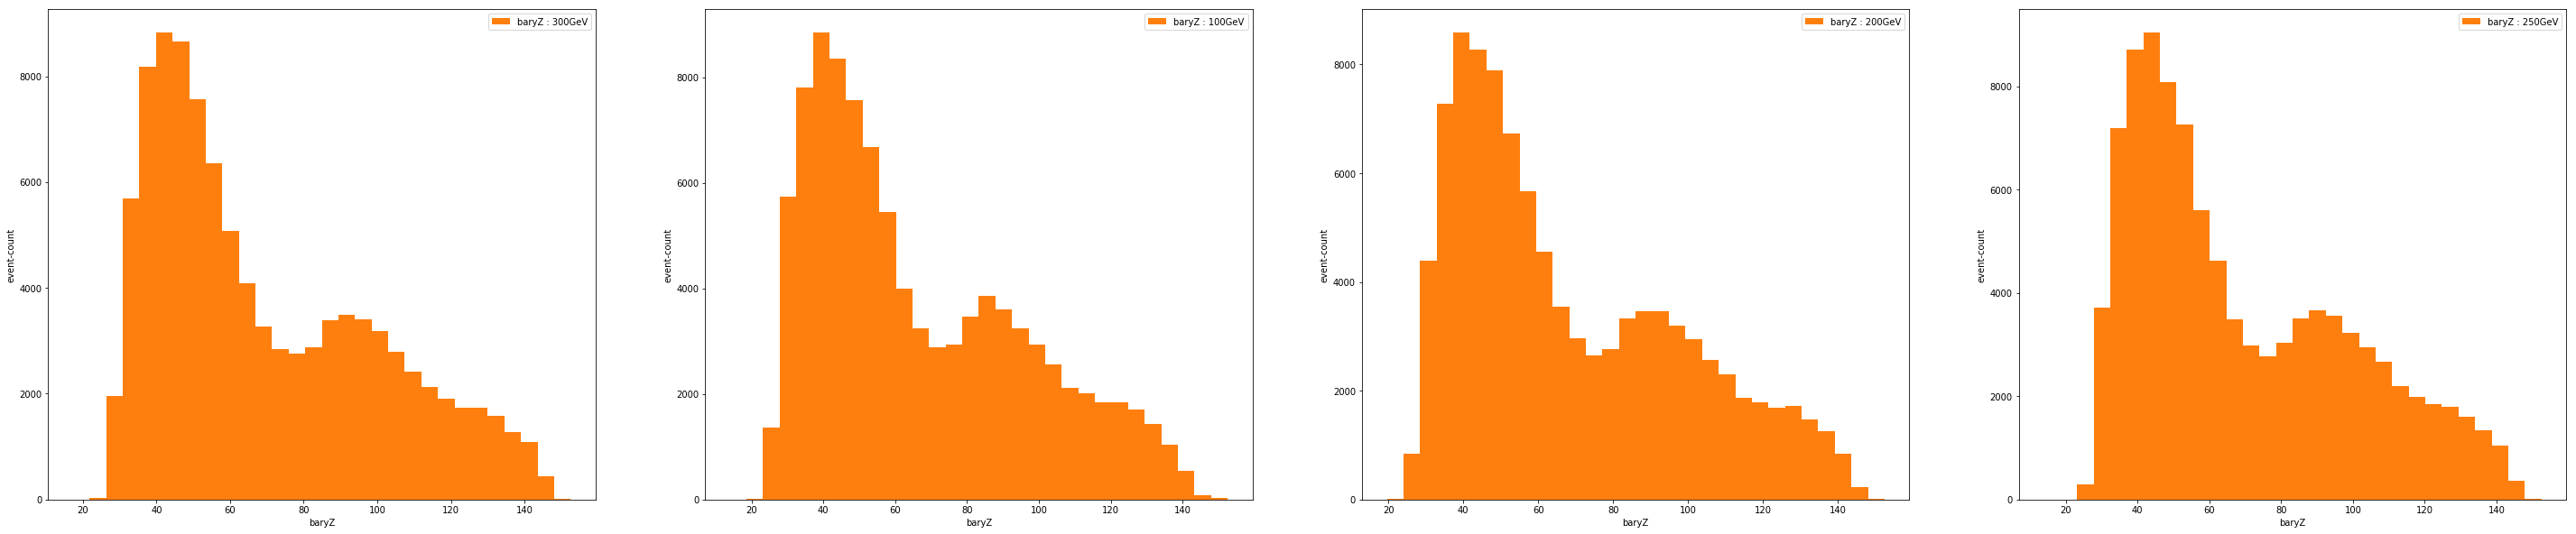

In [18]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.baryZ, 30, color="C1",label = "baryZ : %iGeV"%key)
        plt.xlabel("baryZ")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.baryZ, 30, color="C1",label = "baryZ : %iGeV"%key)
        plt.xlabel("baryZ")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

##### dR

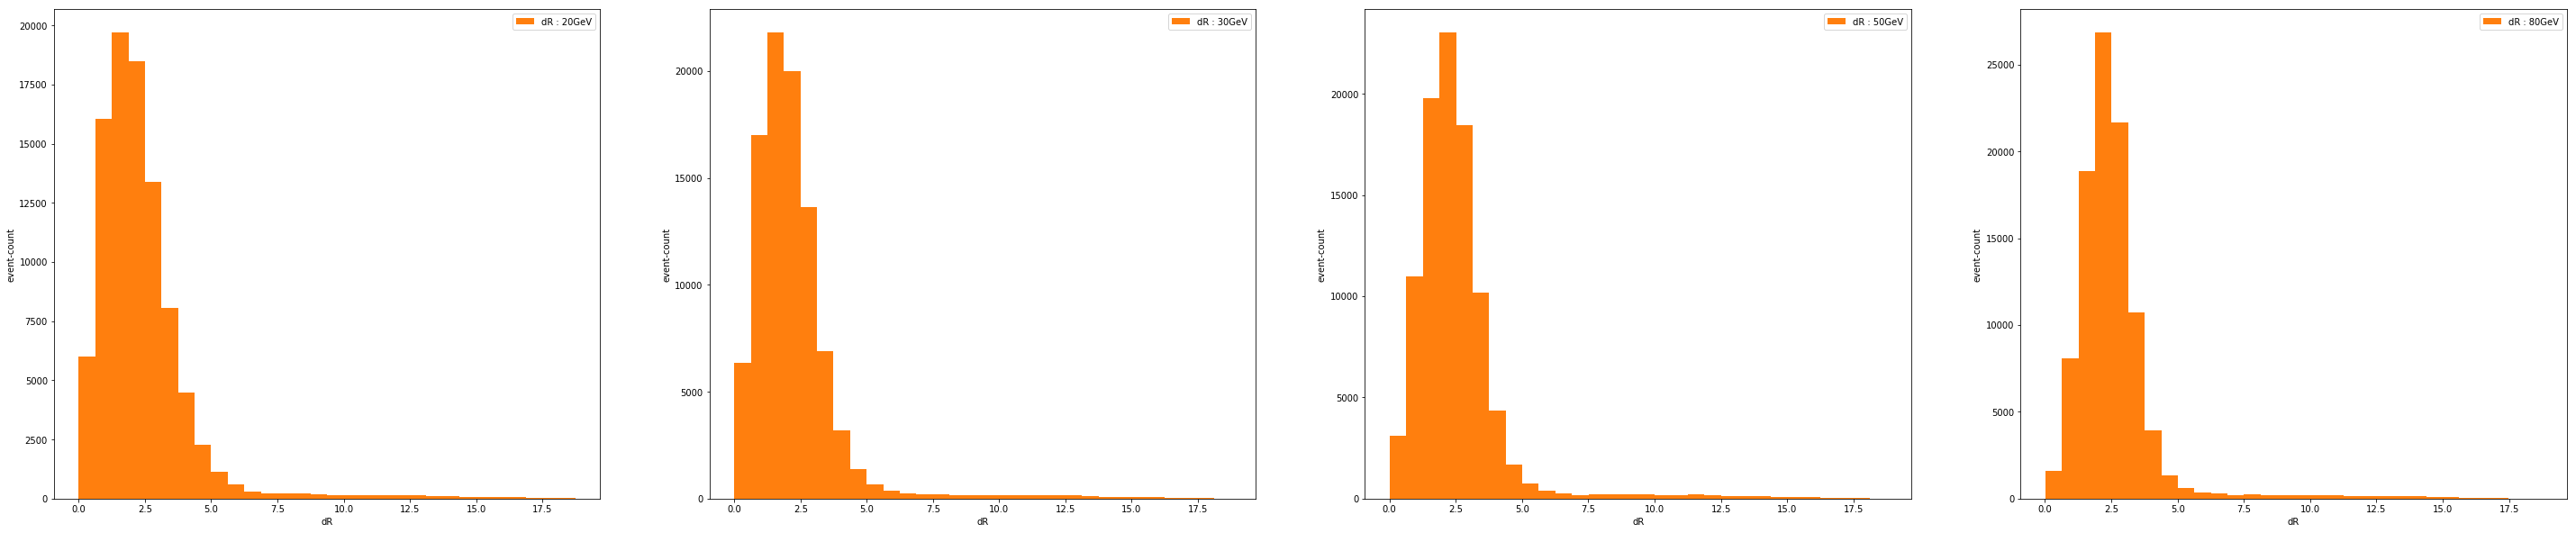

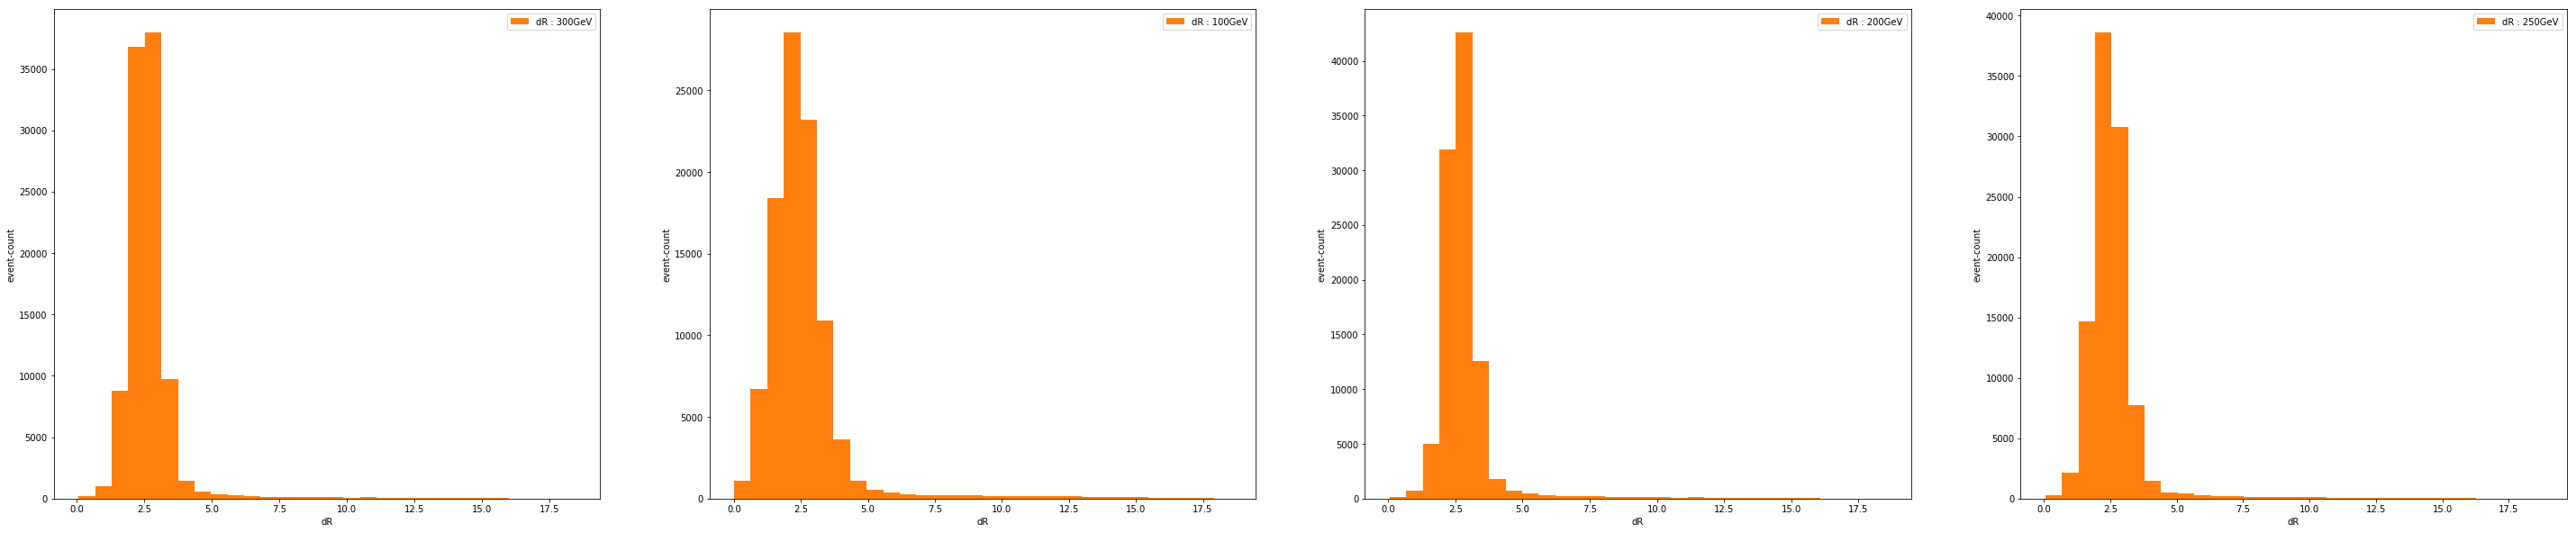

In [19]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.dR, 30, color="C1",label = "dR : %iGeV"%key)
        plt.xlabel("dR")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.dR, 30, color="C1",label = "dR : %iGeV"%key)
        plt.xlabel("dR")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

##### Hits

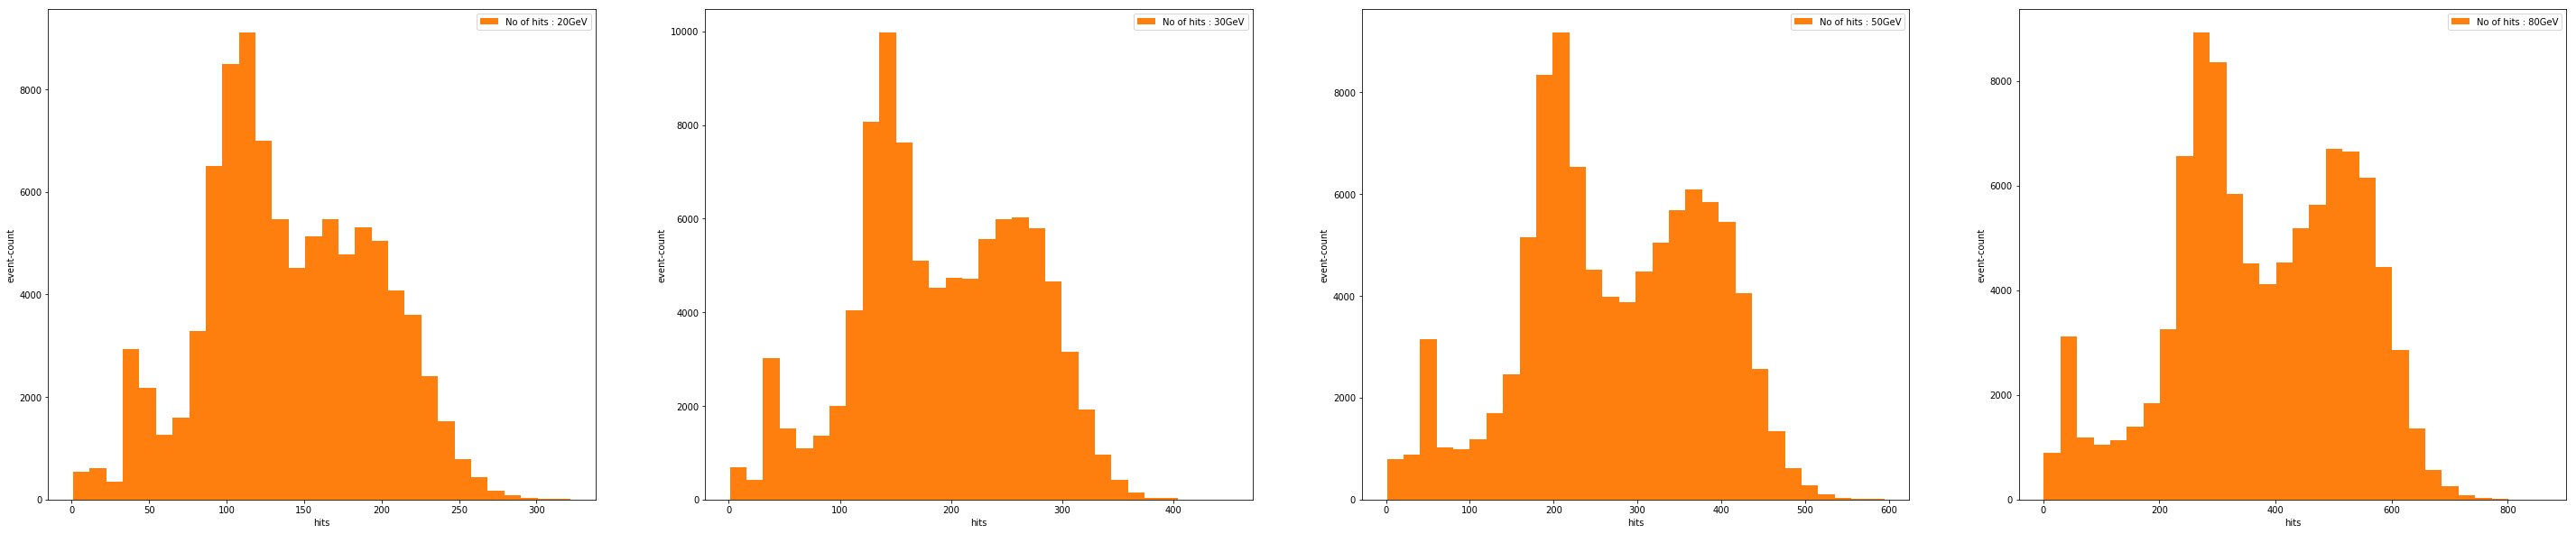

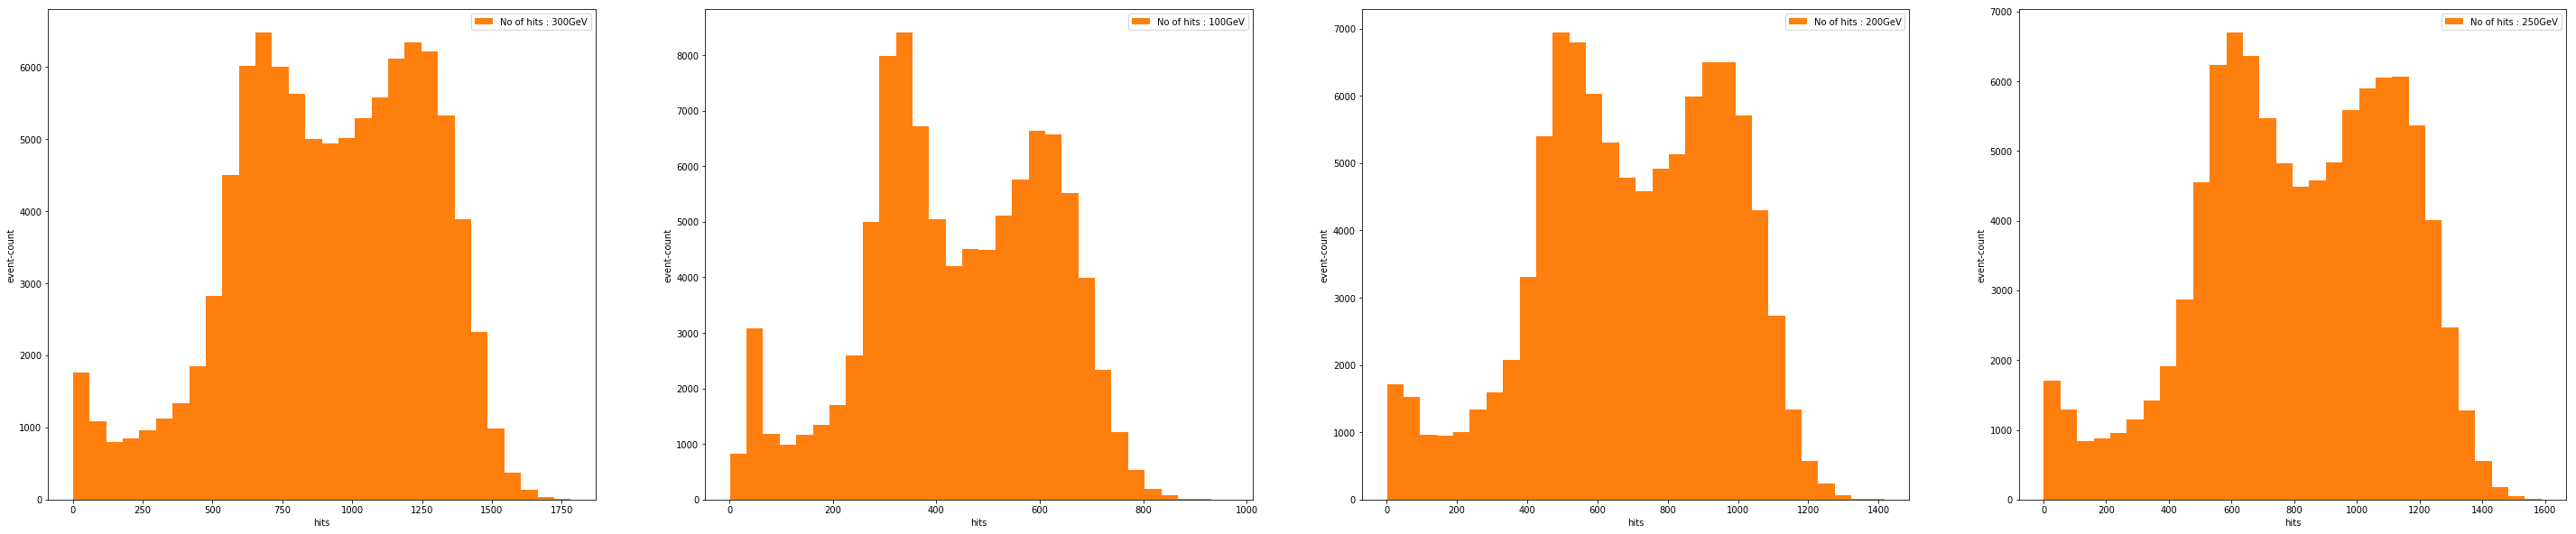

In [20]:
count = 1
flag = True
for key in energies:
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%key,mode = 'a') # open file in append mode
    df = hdf["dataset"]; hdf.close()
    df.hits = [float(hit) for hit in df.hits.values]
    if count < 5:
        if count == 1:
            f = plt.figure(1,figsize = (50,10))
        plt.subplot(1,4,count)
        plt.hist(df.hits, 30, color="C1",label = "No of hits : %iGeV"%key)
        plt.xlabel("hits")
        plt.ylabel("event-count")
        plt.legend()
    else:
        if count == 5:
            g = plt.figure(2,figsize = (50,10))
        plt.subplot(1,4,(count % 4)+1)
        plt.hist(df.hits, 30, color="C1",label = "No of hits : %iGeV"%key)
        plt.xlabel("hits")
        plt.ylabel("event-count")
        plt.legend()
    count += 1

#### longitudinal profile

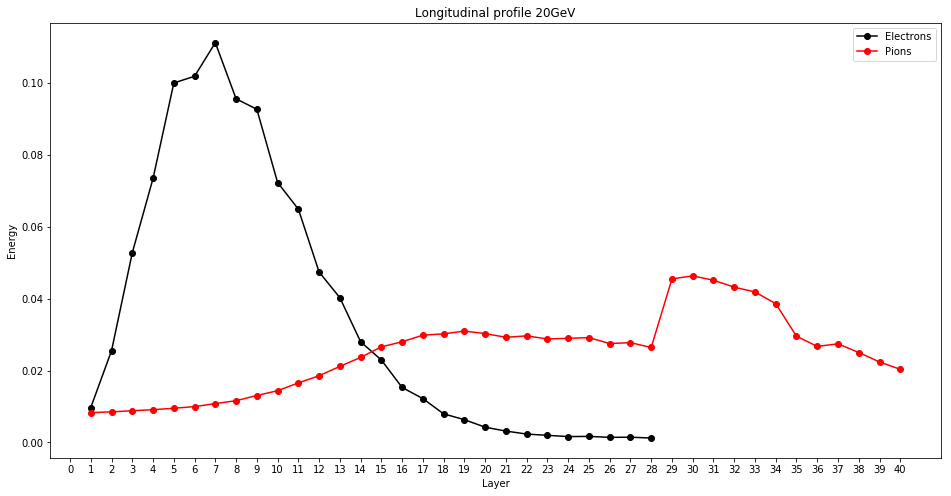

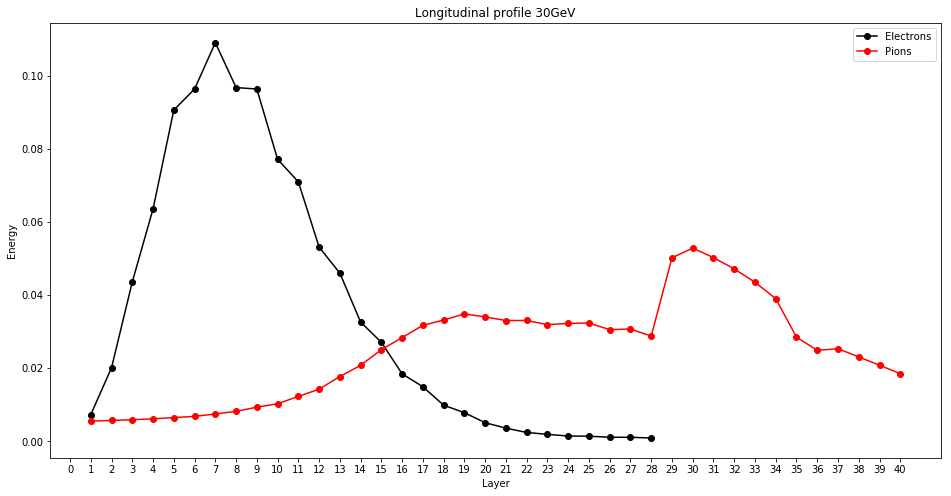

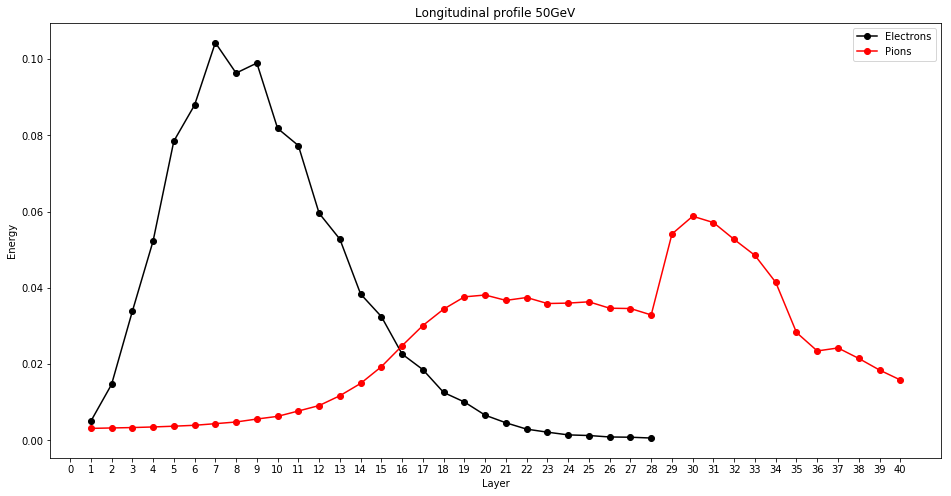

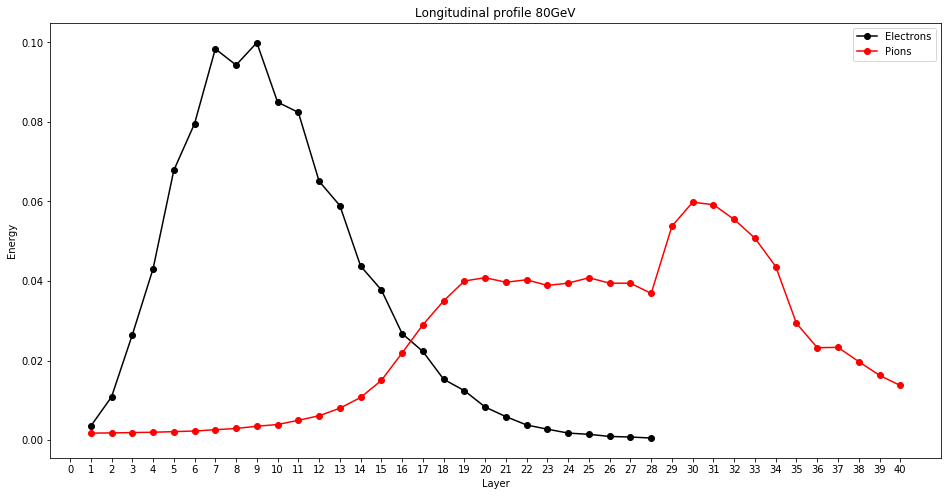

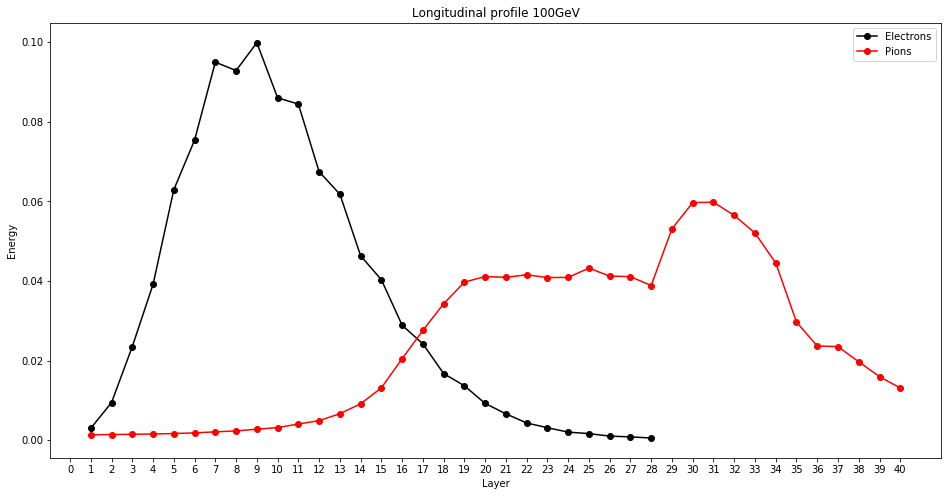

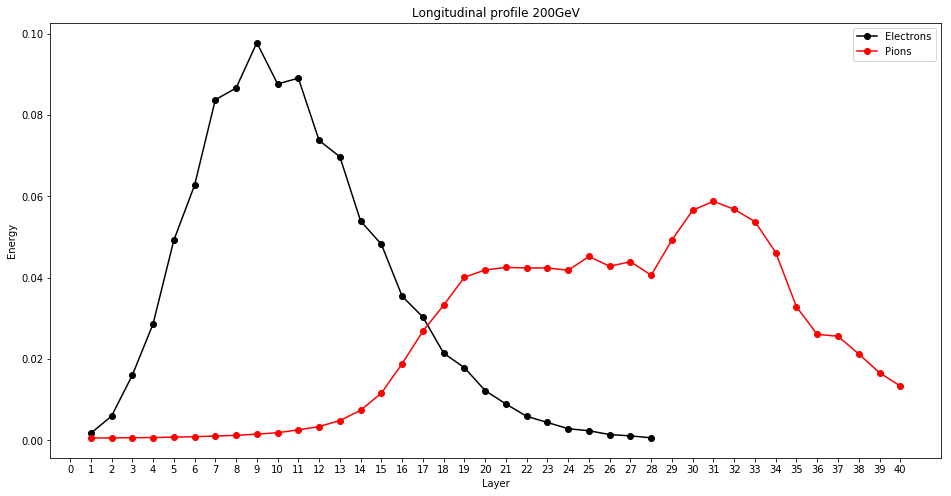

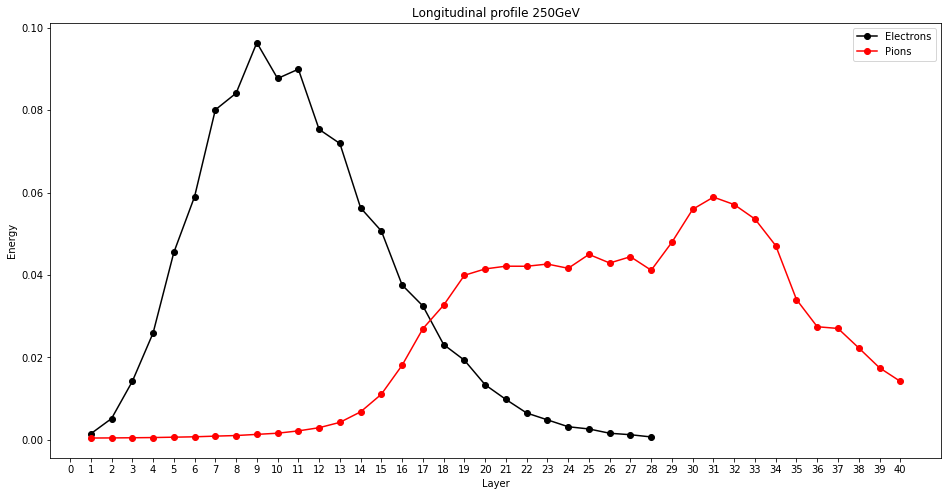

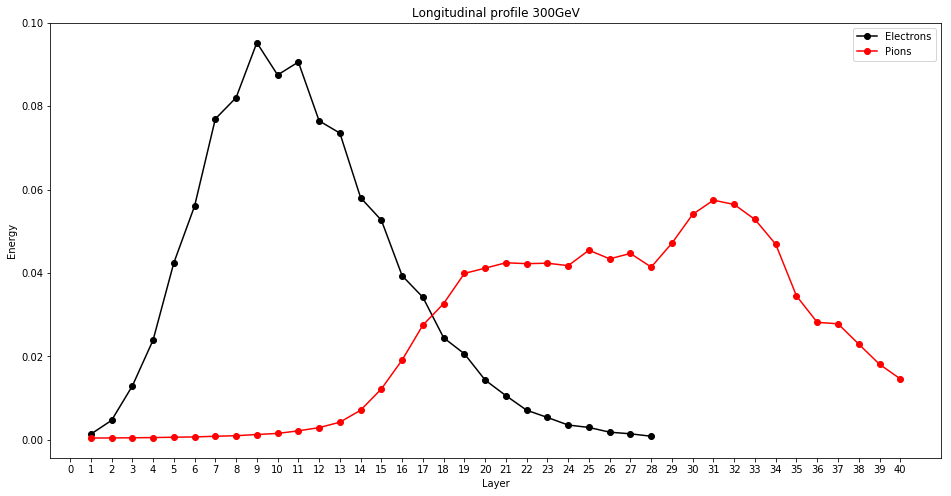

In [21]:
count = 1;
for energy in energies:
    
#   longitudinal profile
    f = plt.figure(count,figsize = (150,8))
    plt.subplot(1,8,count)
    plt.title('Longitudinal profile %iGeV'%energy)
    
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf["beam_%ieV_longProfile/median"%energy]
    hdf.close()
    plt.plot(temp / temp.sum(), 'o-', color = 'k', label = 'Electrons')
    
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf["beam_%ieV_longProfile/median"%energy]
    hdf.close()
    plt.plot(temp / temp.sum(), 'o-', color = 'red', label = 'Pions')
    plt.legend()
    plt.xlabel('Layer')
    plt.ylabel('Energy')
    plt.xticks(np.arange(0, 41, step=1))
    count += 1

#### transverse profile EE(electron)

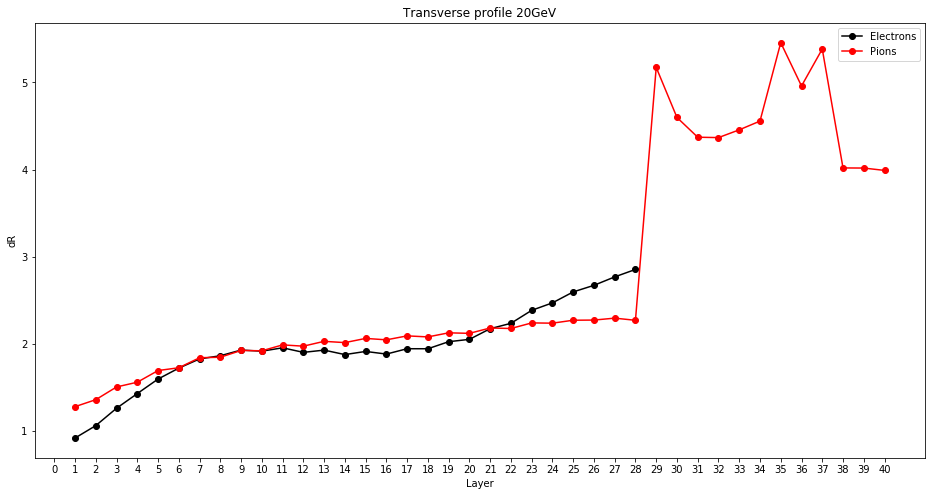

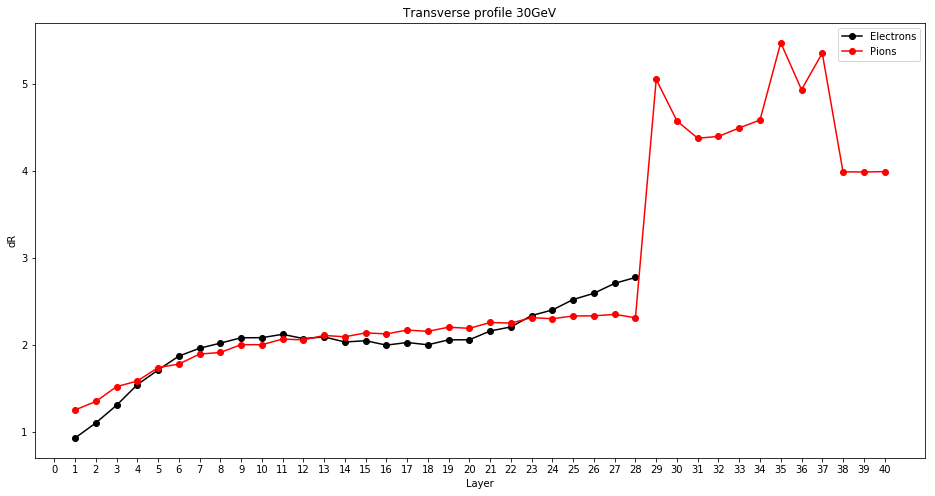

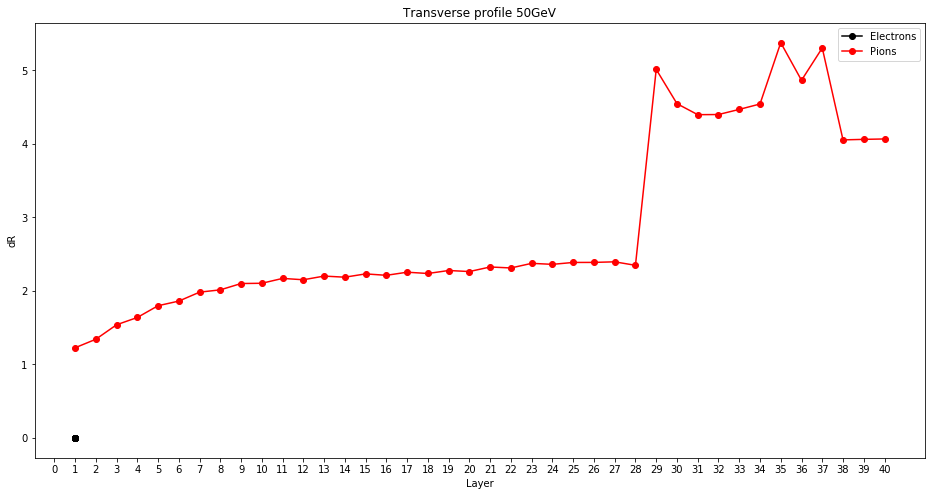

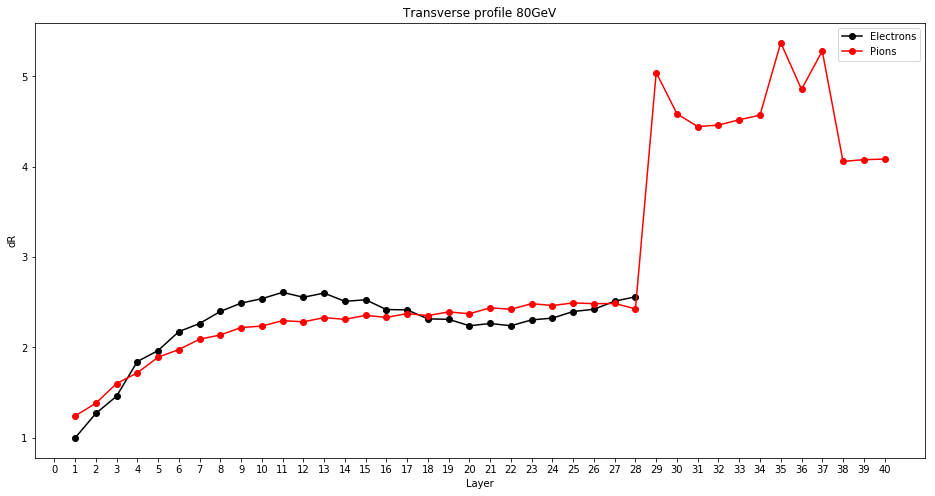

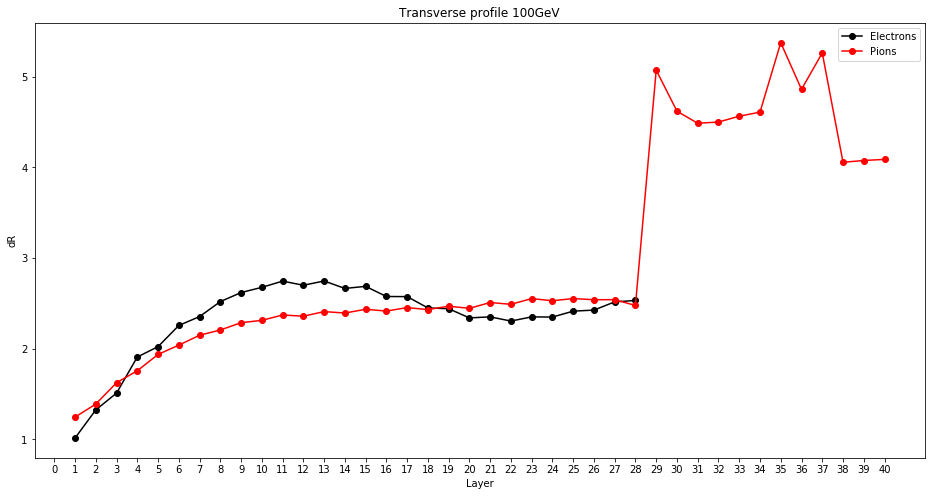

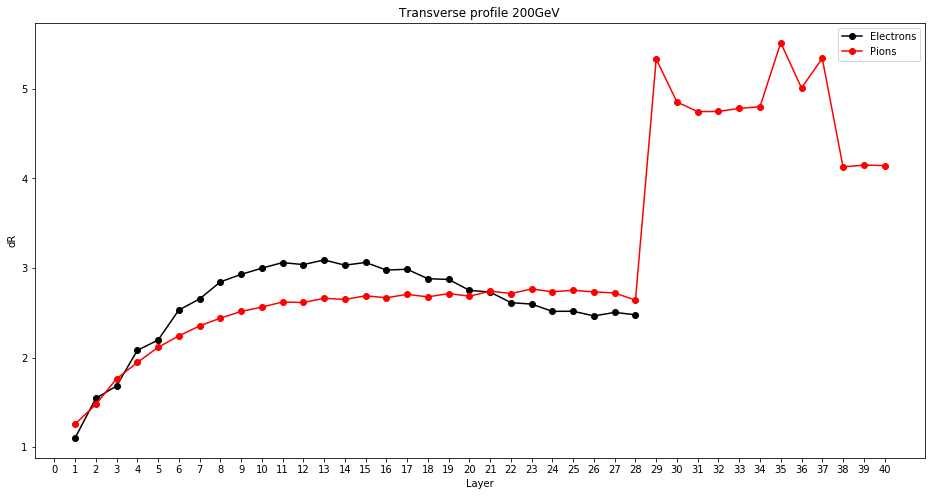

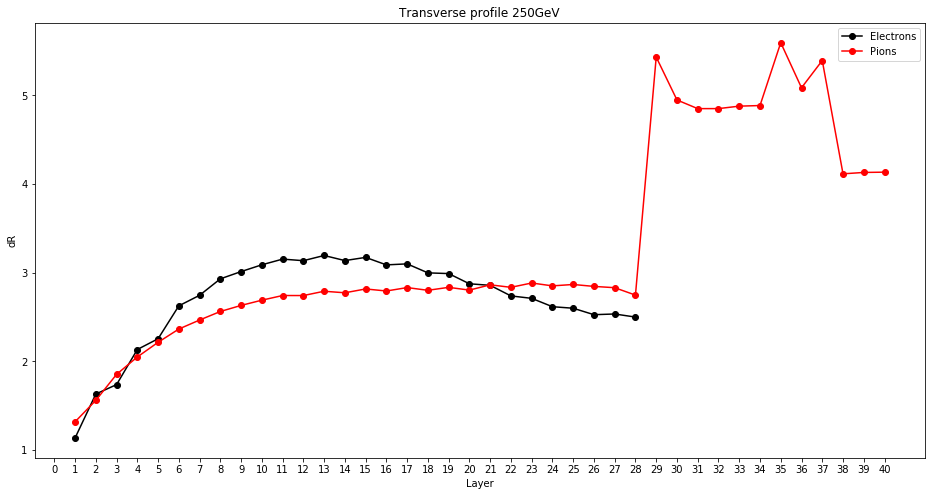

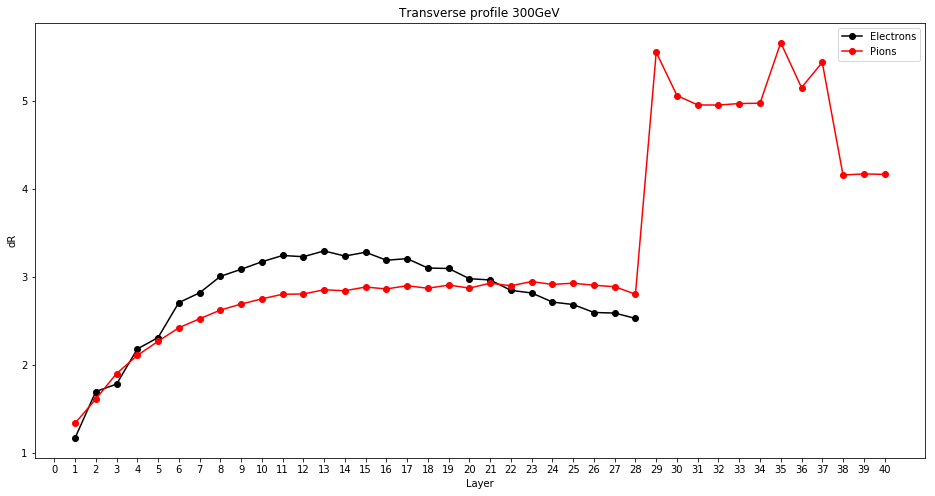

In [22]:
count = 1;
for energy in energies:
    
#   longitudinal profile
    
    f = plt.figure(count,figsize = (150,8))
    plt.subplot(1,8,count)
    plt.title('Transverse profile %iGeV'%energy)
    
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV_radProfile'%energy]
    temp.index += 1
    hdf.close()
    plt.plot(temp, 'o-', color = 'k', label = 'Electrons')
    
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV_radProfile'%energy]
    temp.index += 1
    hdf.close()
    plt.plot(temp, 'o-', color = 'red', label = 'Pions')
    plt.legend()
    plt.xlabel('Layer')
    plt.ylabel('dR')
    plt.xticks(np.arange(0, 41, step=1))
    count += 1

#### average hits EE(electron)

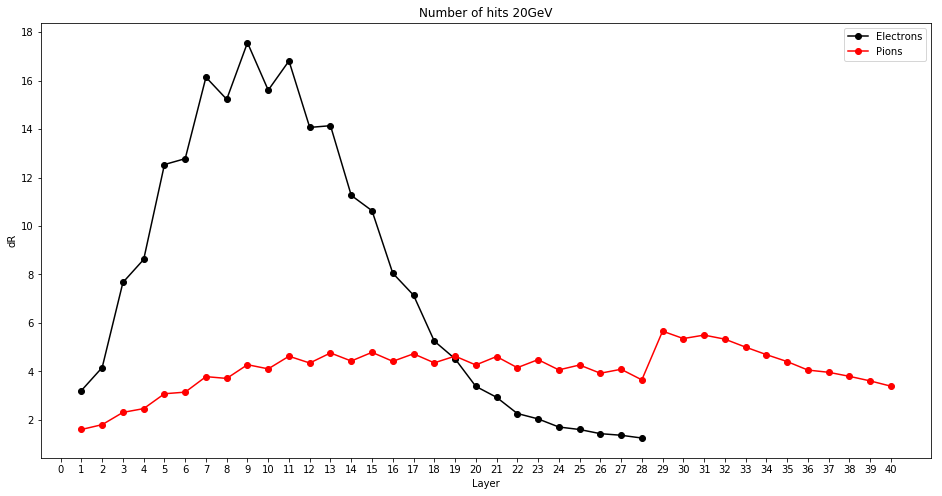

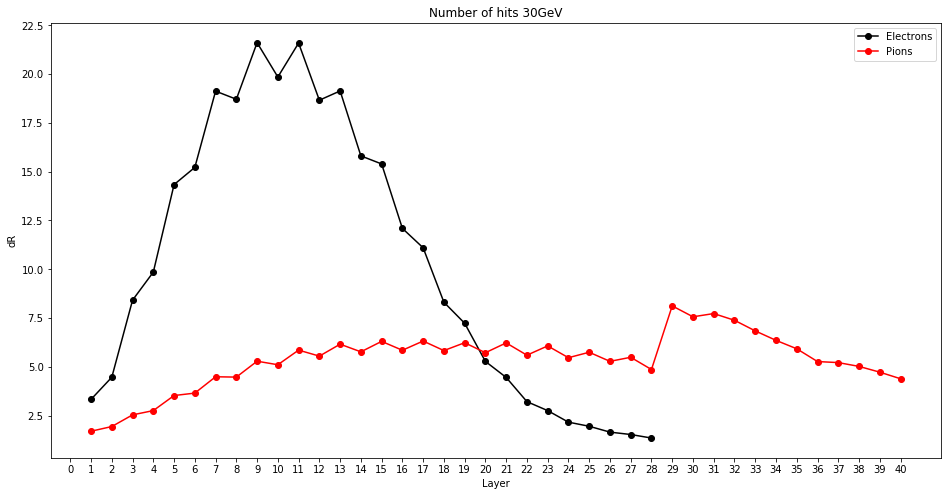

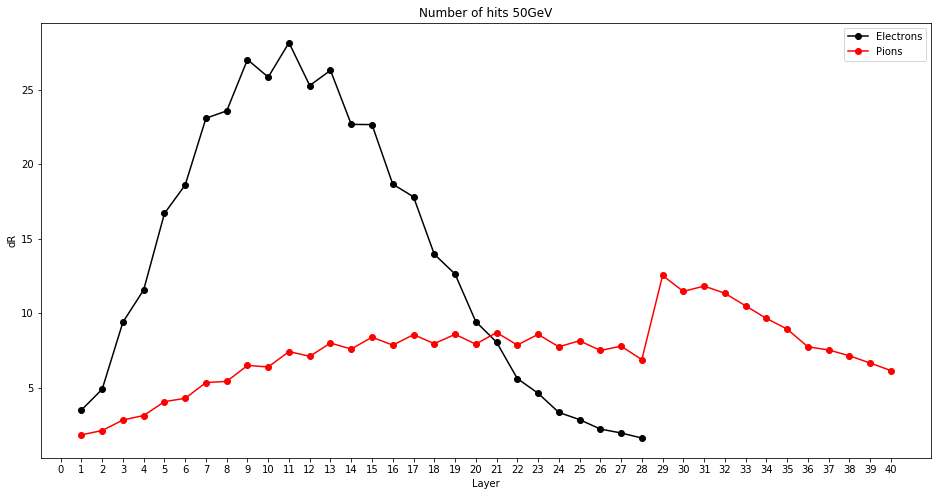

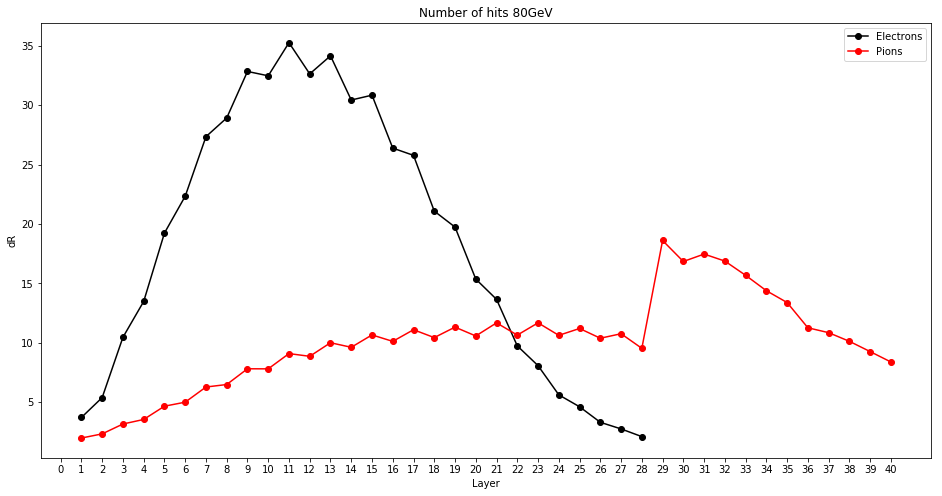

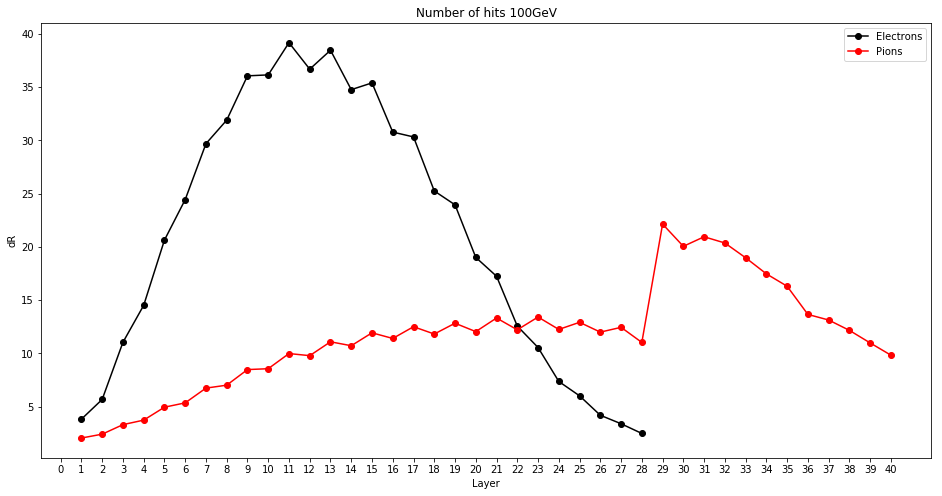

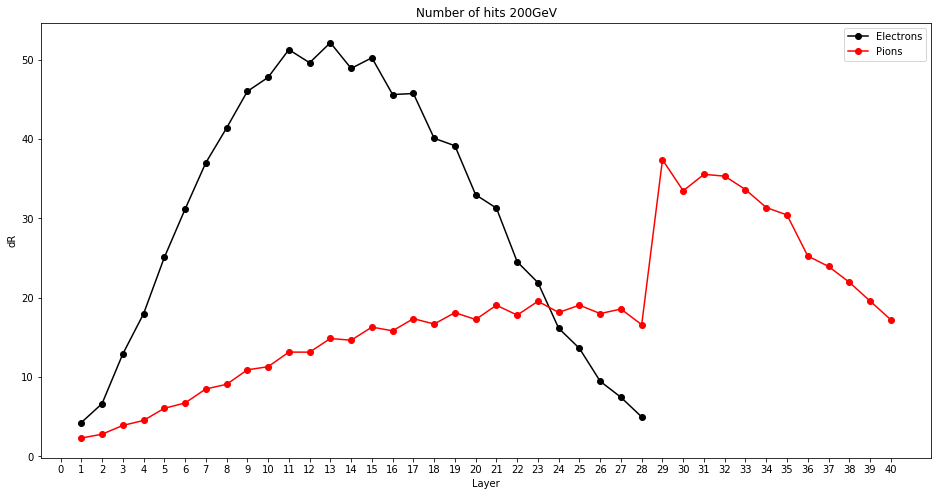

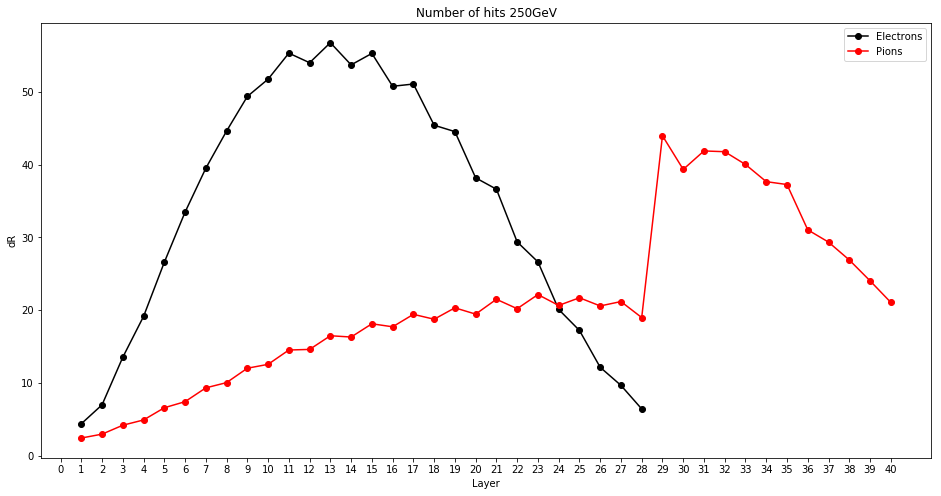

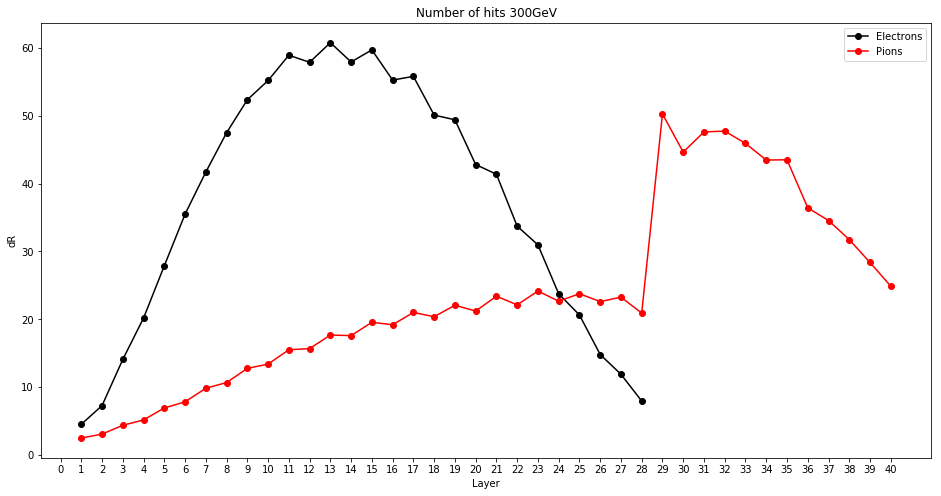

In [23]:
count = 1;
for energy in energies:
    
#   longitudinal profile
    
    f = plt.figure(count,figsize = (150,8))
    plt.subplot(1,8,count)
    plt.title('Number of hits %iGeV'%energy)
    
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV_avgHits'%energy]
    hdf.close()
    plt.plot(temp, 'o-', color = 'k', label = 'Electrons')
    
    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV_avgHits'%energy]
    hdf.close()
    plt.plot(temp, 'o-', color = 'red', label = 'Pions')
    plt.legend()
    plt.xlabel('Layer')
    plt.ylabel('dR')
    plt.xticks(np.arange(0, 41, step=1))
    count += 1

##### Energy sum for all events E1-E20

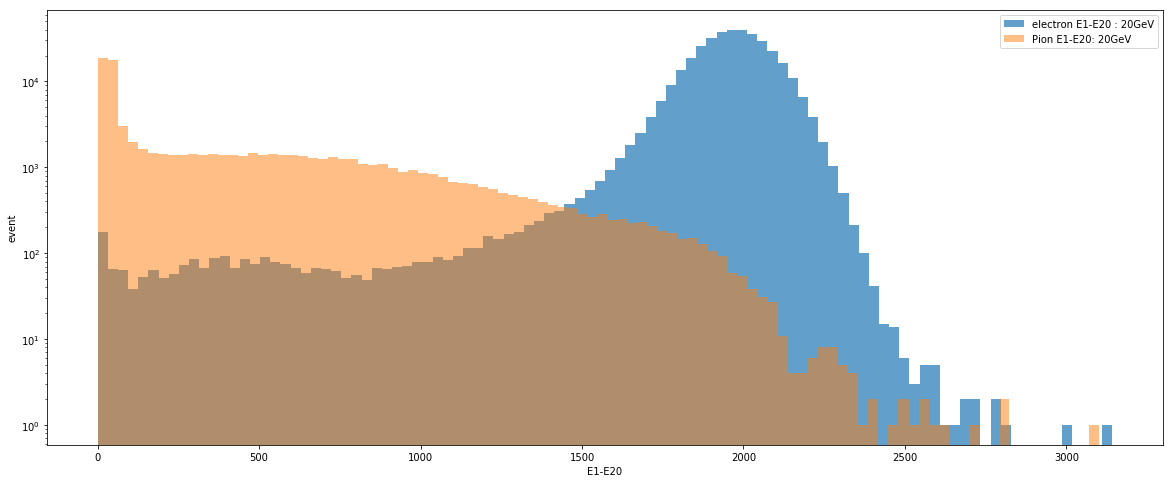

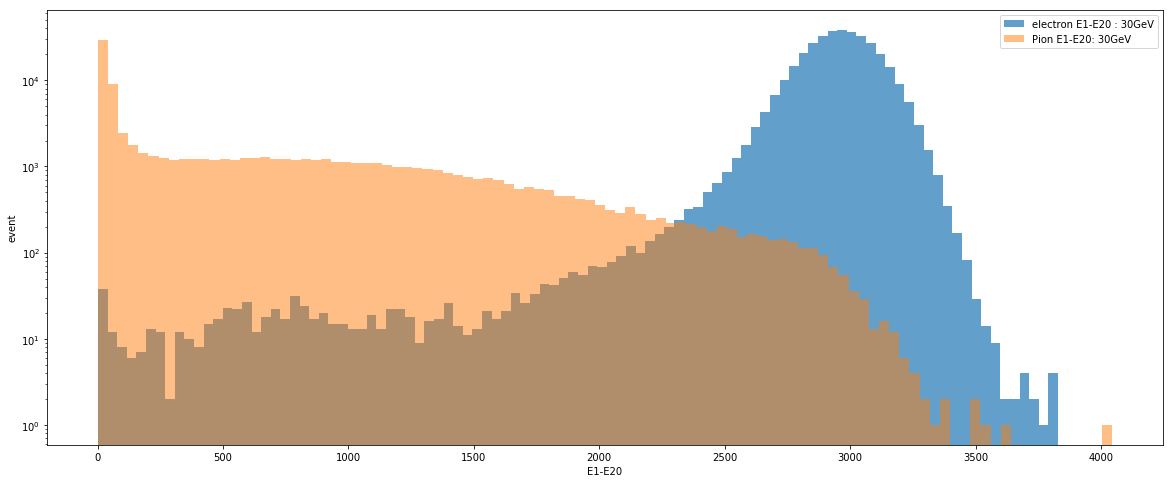

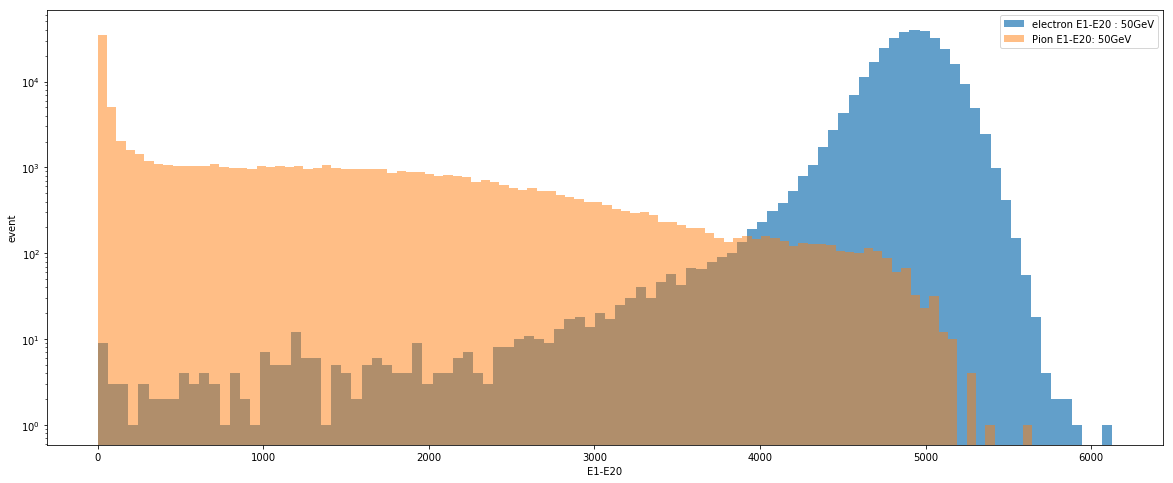

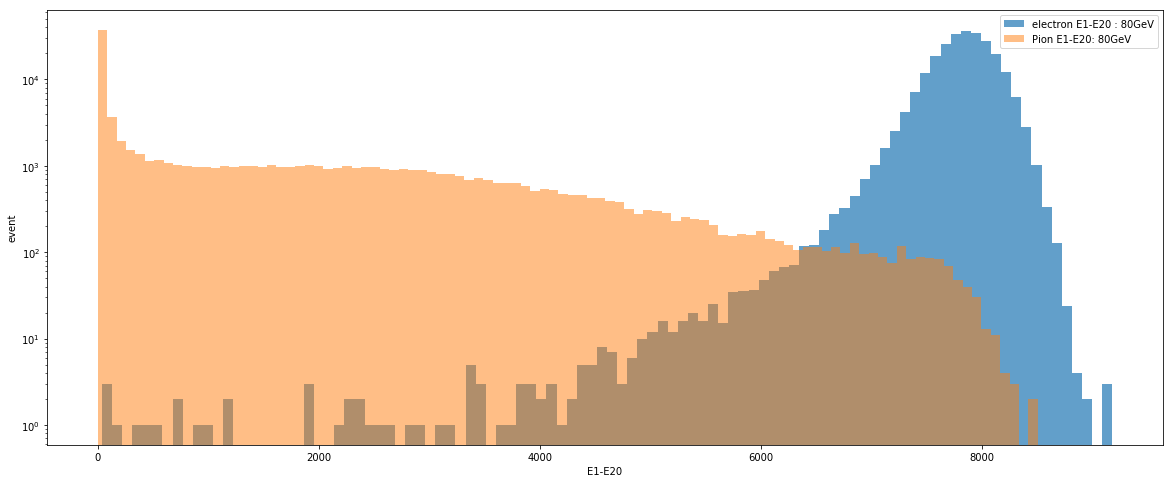

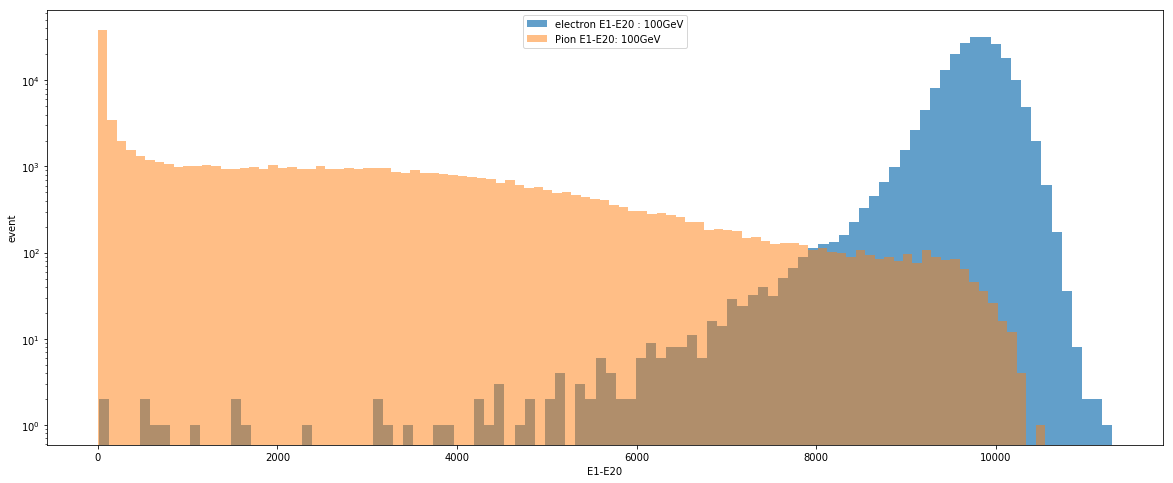

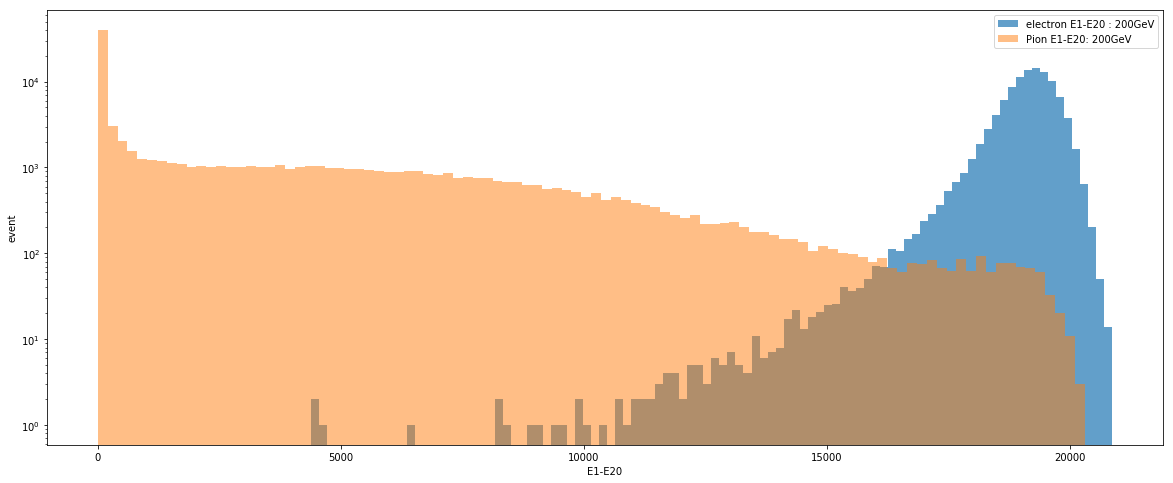

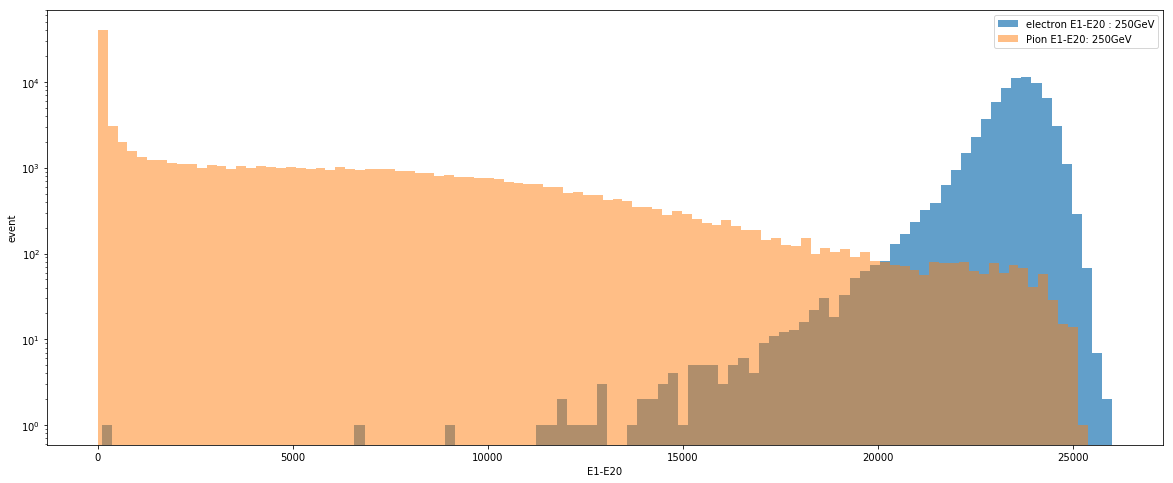

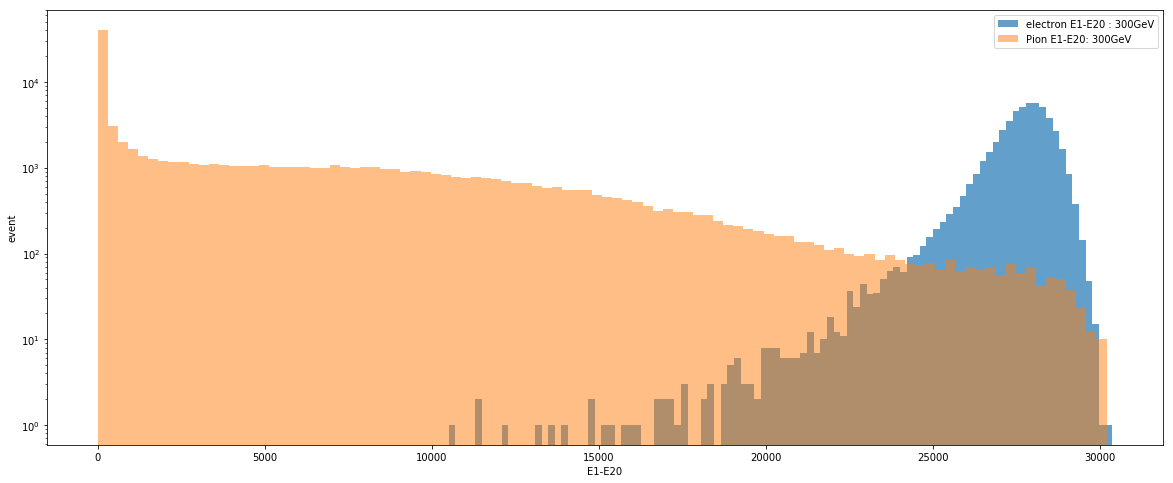

In [25]:
count = 1
bw = 'E1-E20'

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E1to20'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.50)
    plt.yscale('log')
    plt.legend()
    count += 1

##### Energy sum for all events E21-E28

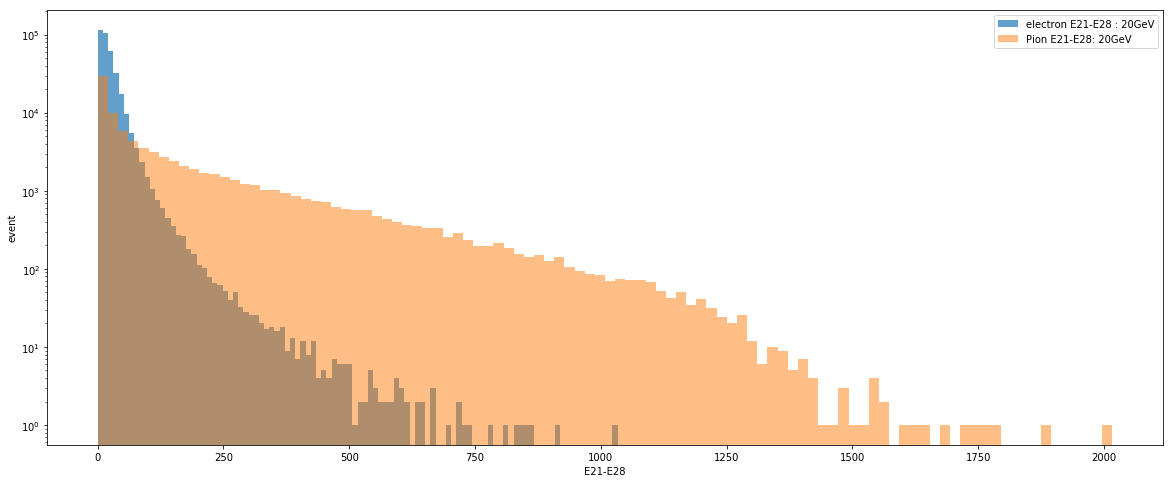

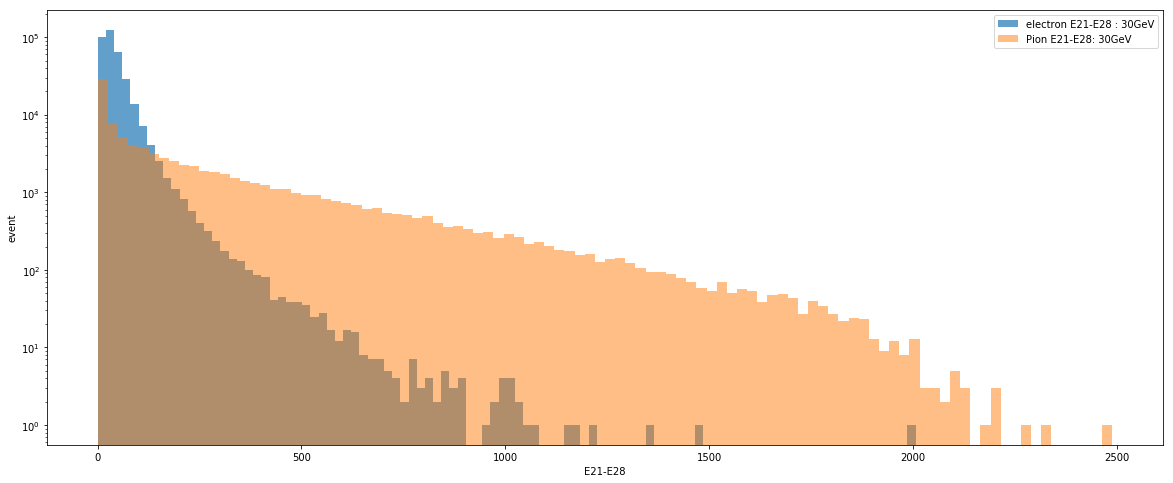

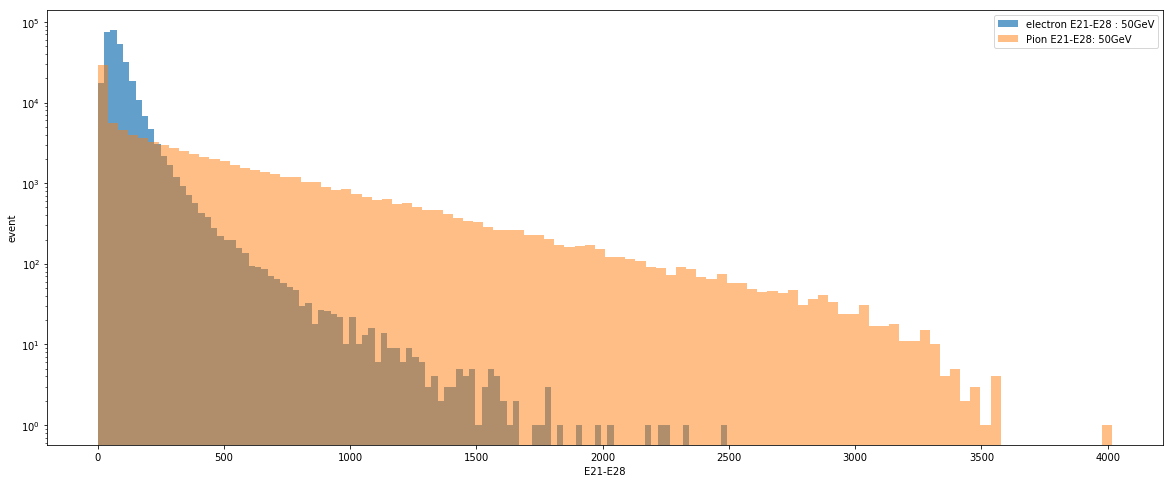

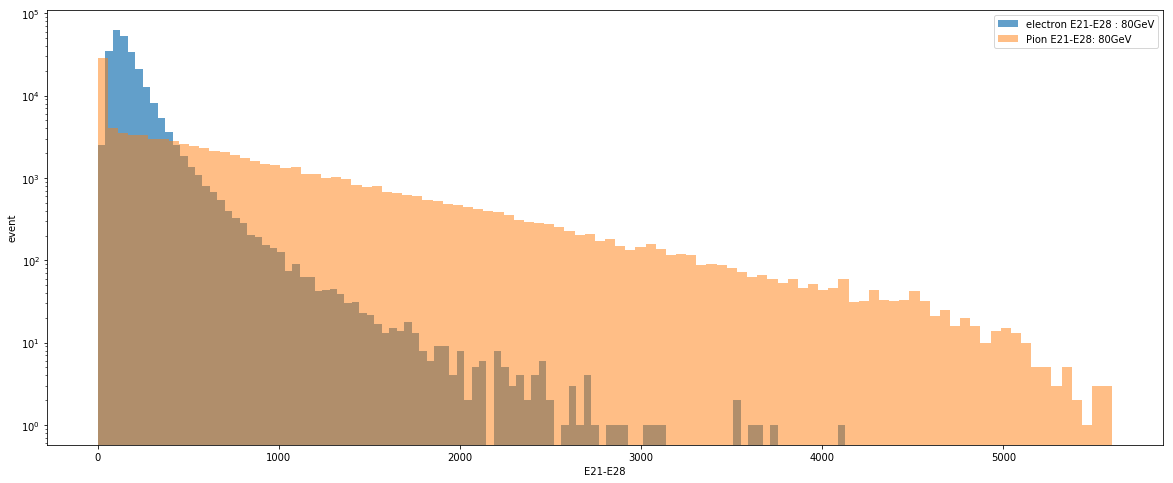

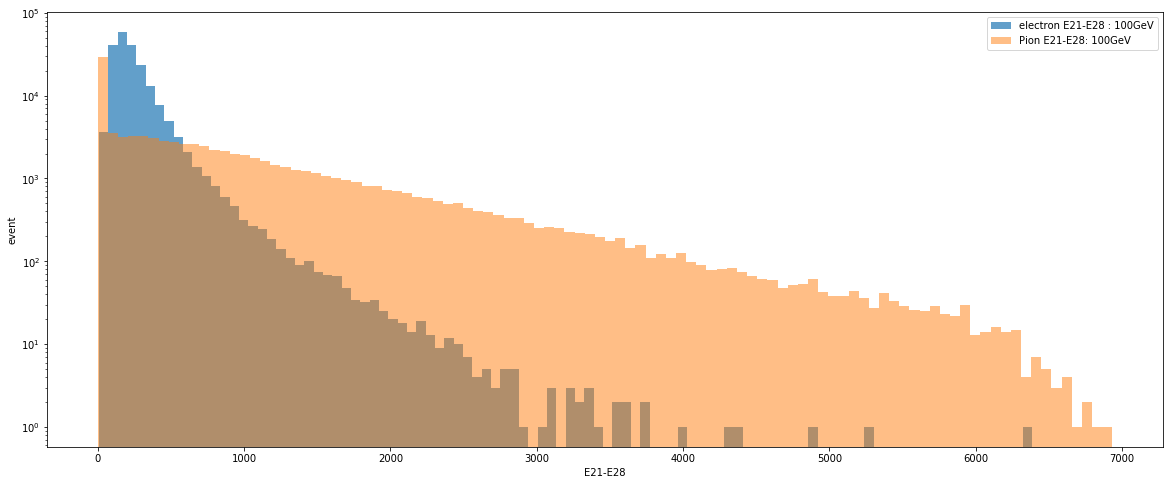

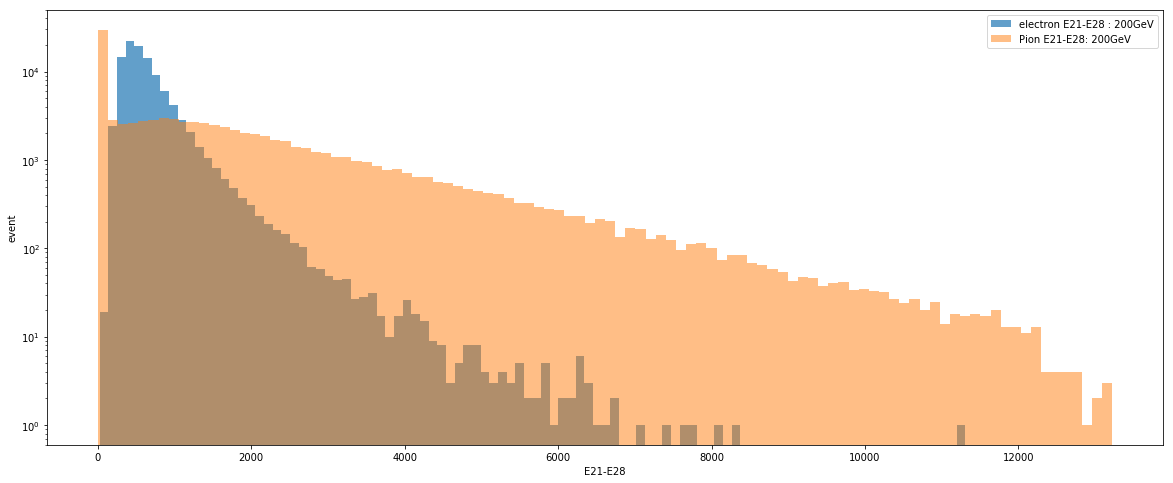

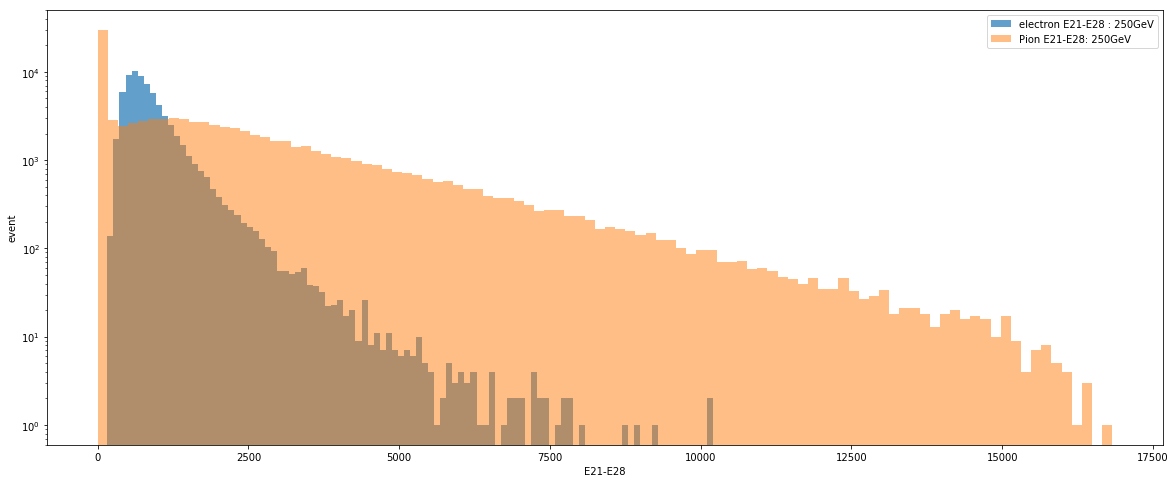

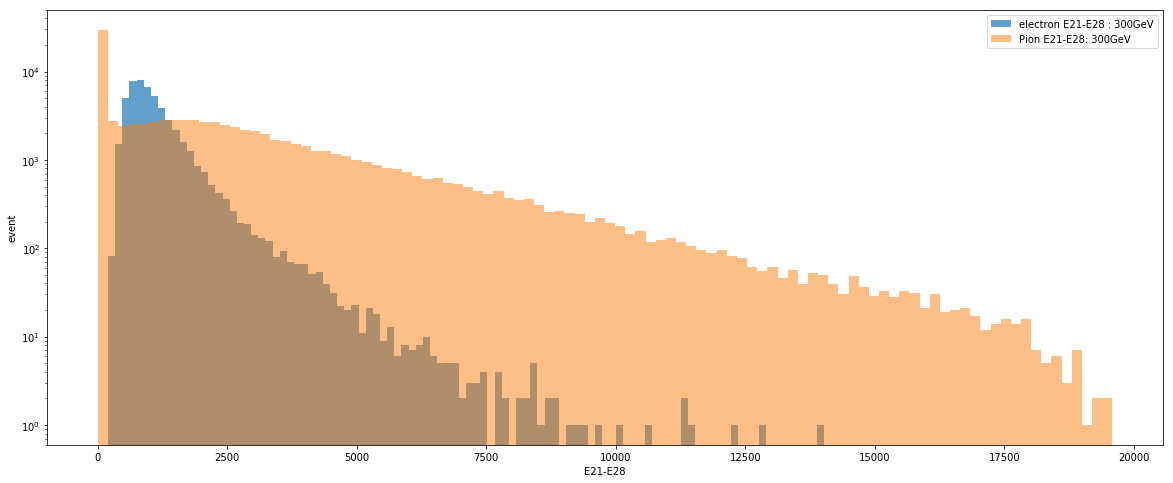

In [27]:
count = 1
bw = "E21-E28"

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E21to28'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.50)
    plt.yscale('log')
    plt.legend()
    count += 1

##### Ratio  E1-20 / E21-E28

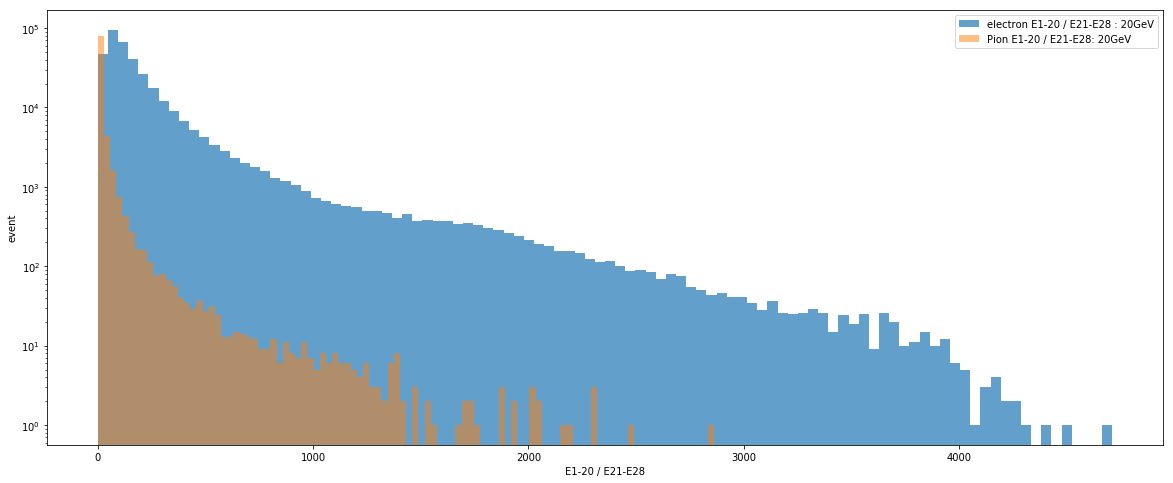

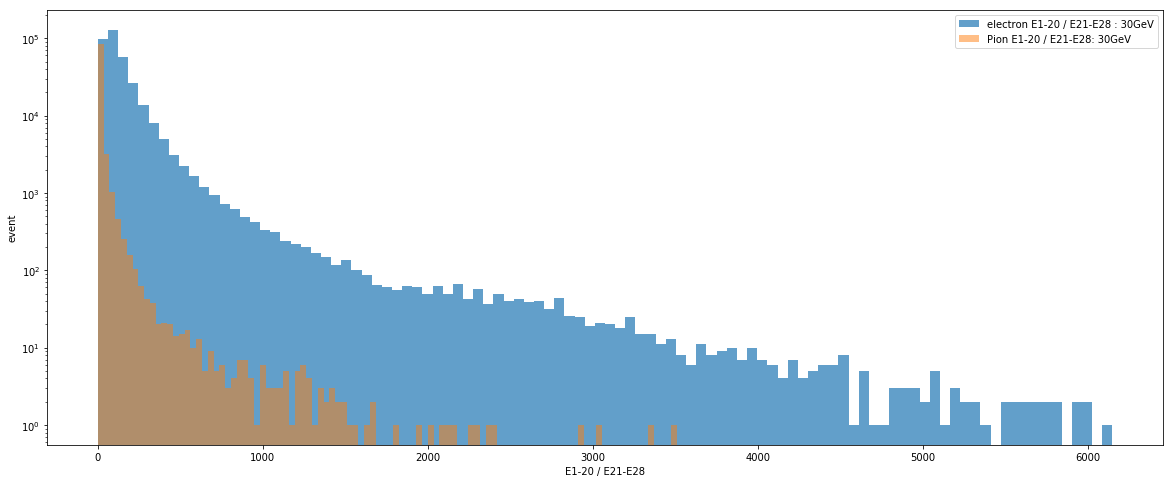

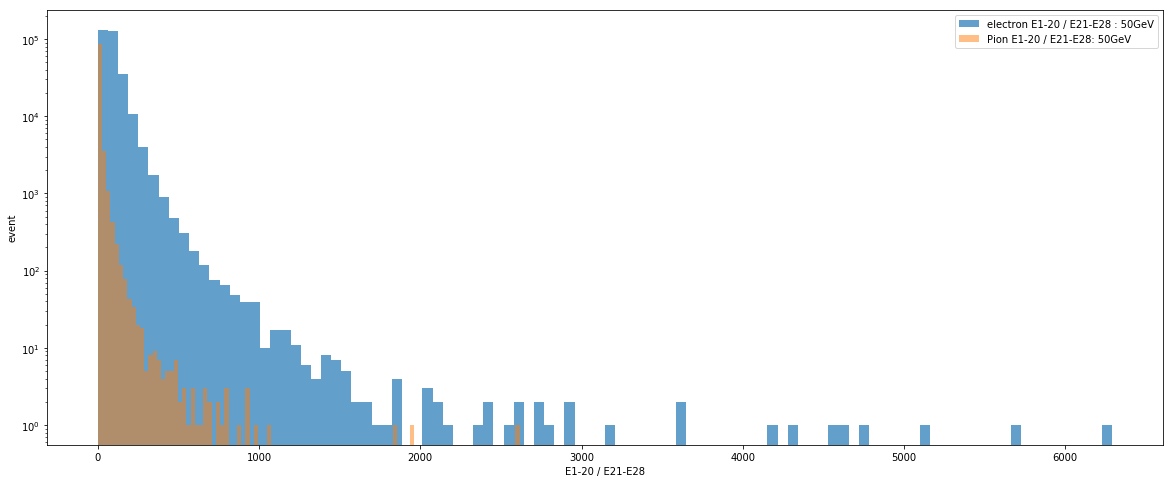

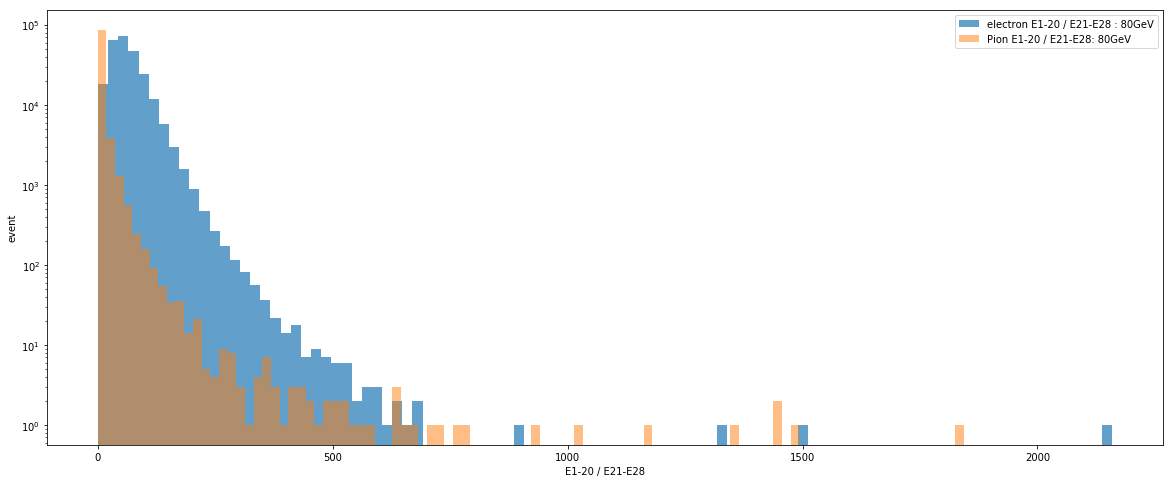

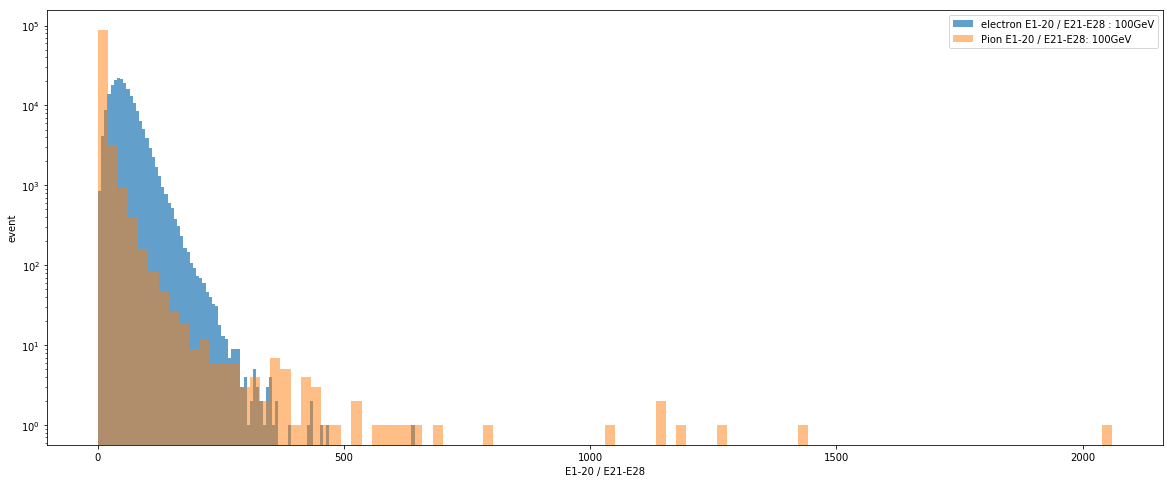

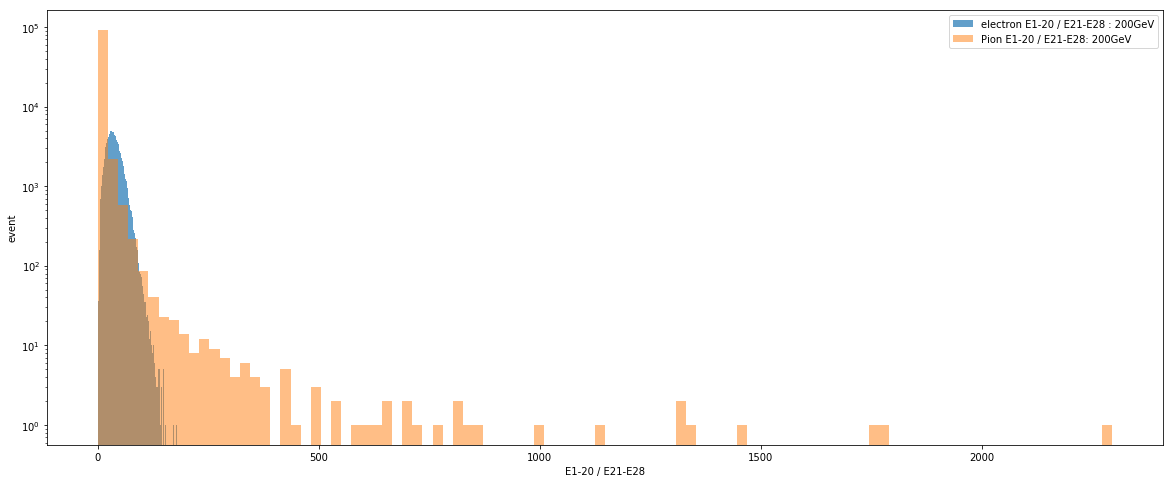

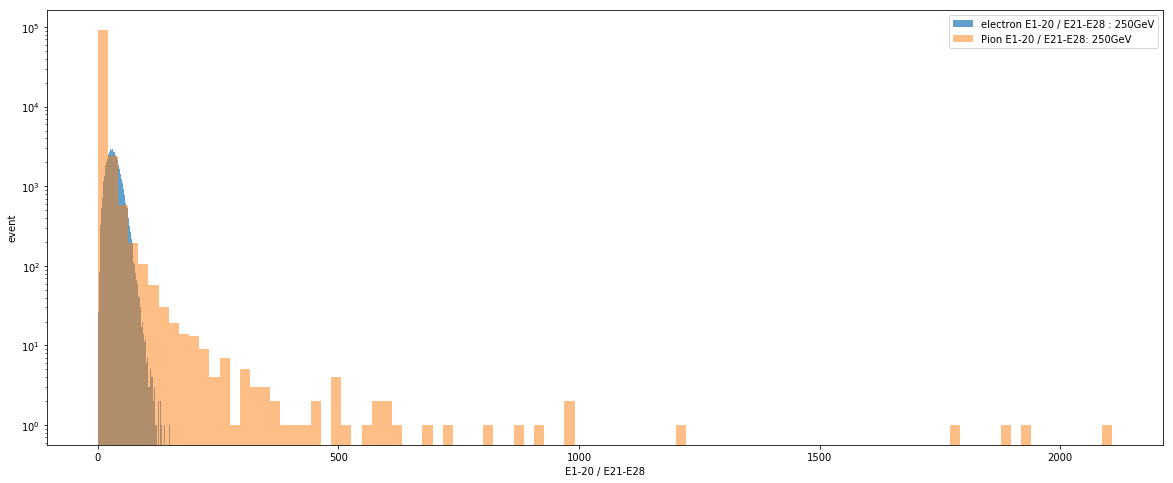

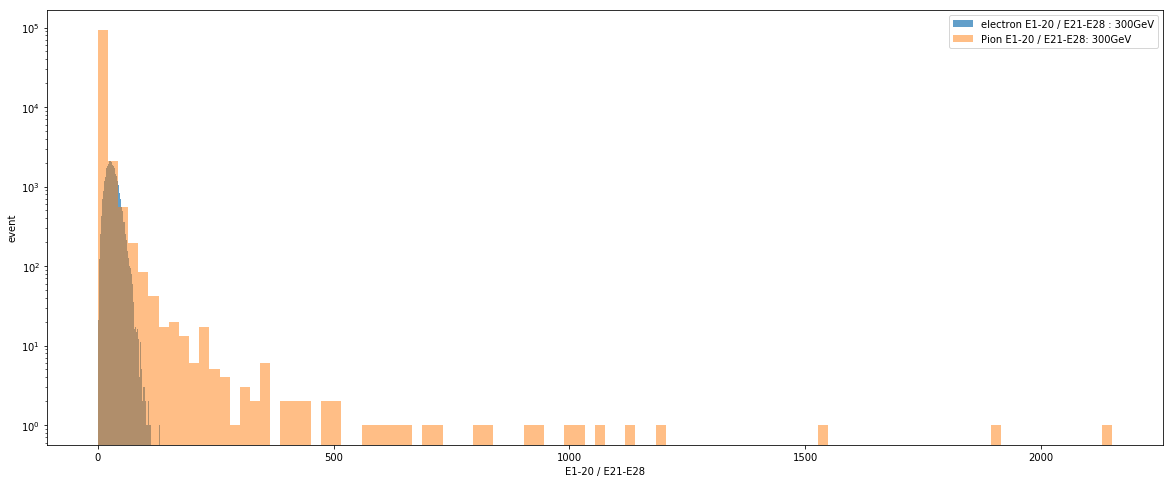

In [28]:
count = 1
bw = "E1-20 / E21-E28"

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E21to28'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy]['E1to20'] / hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy]['E1to20'] / hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.50)
    plt.yscale('log')
    plt.legend()
    count += 1

##### Energy sum for all events E1-E28

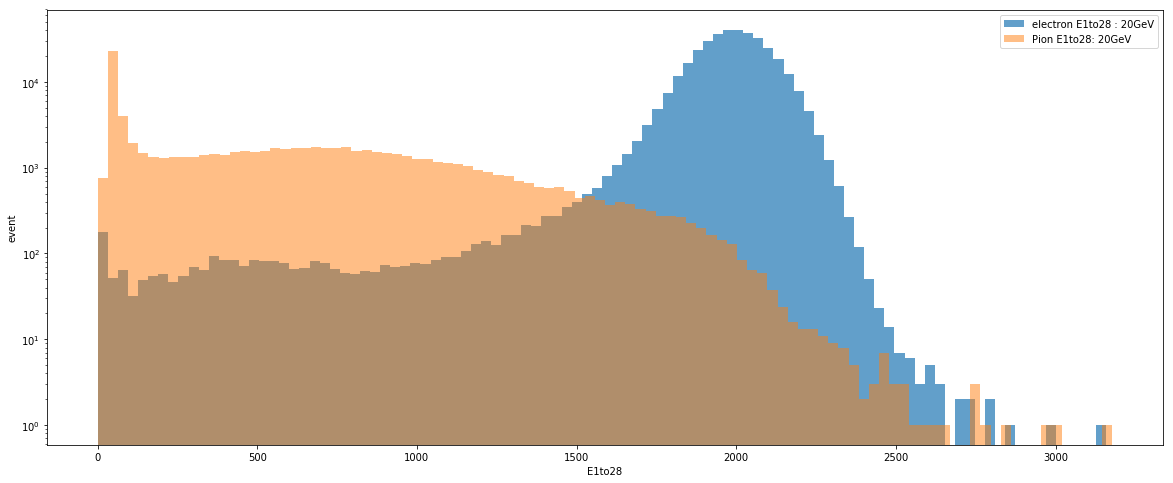

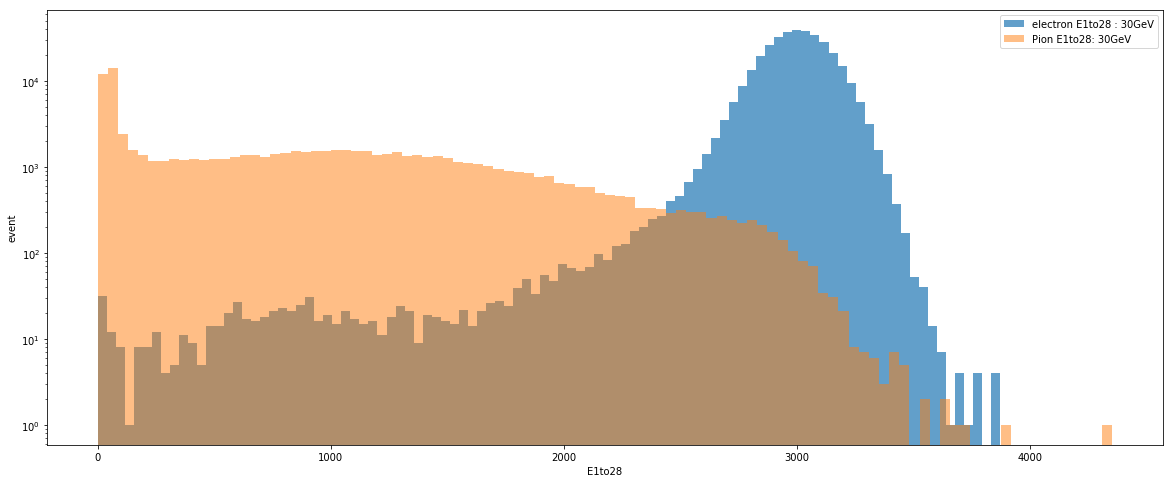

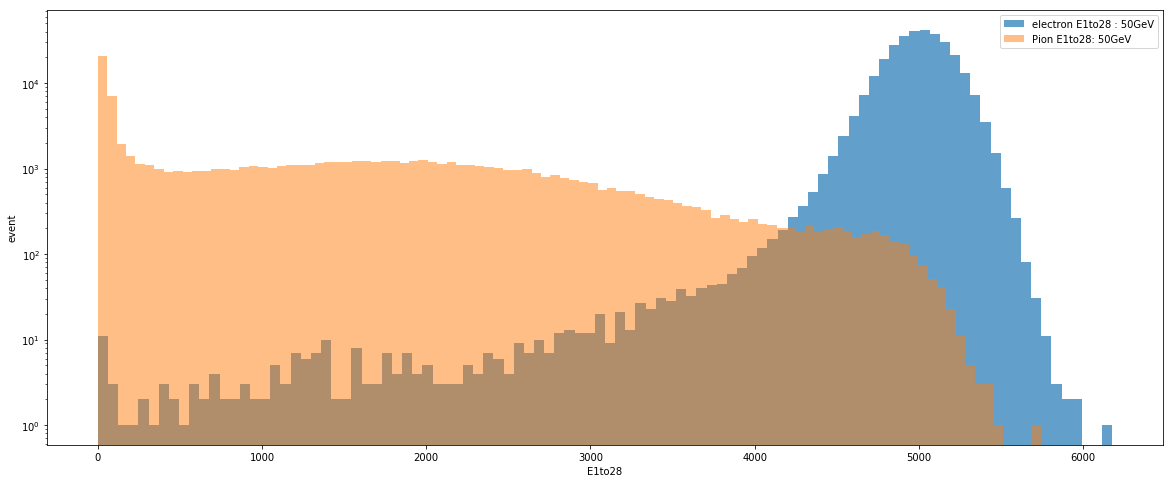

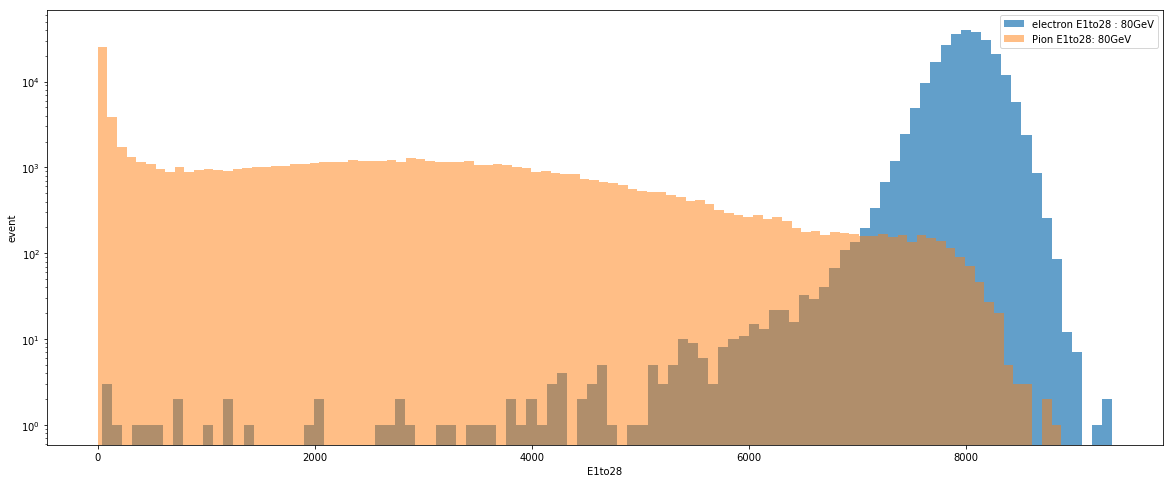

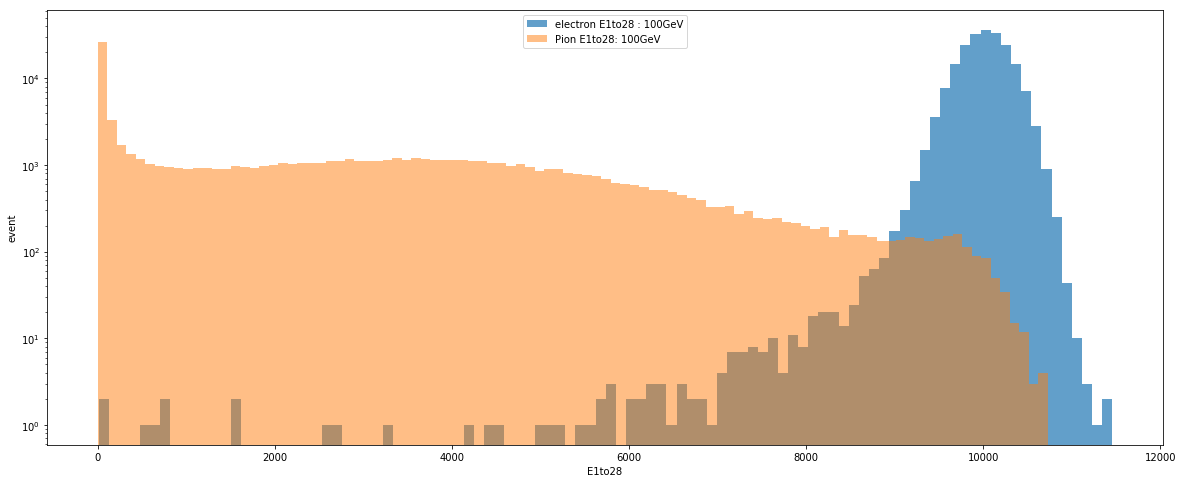

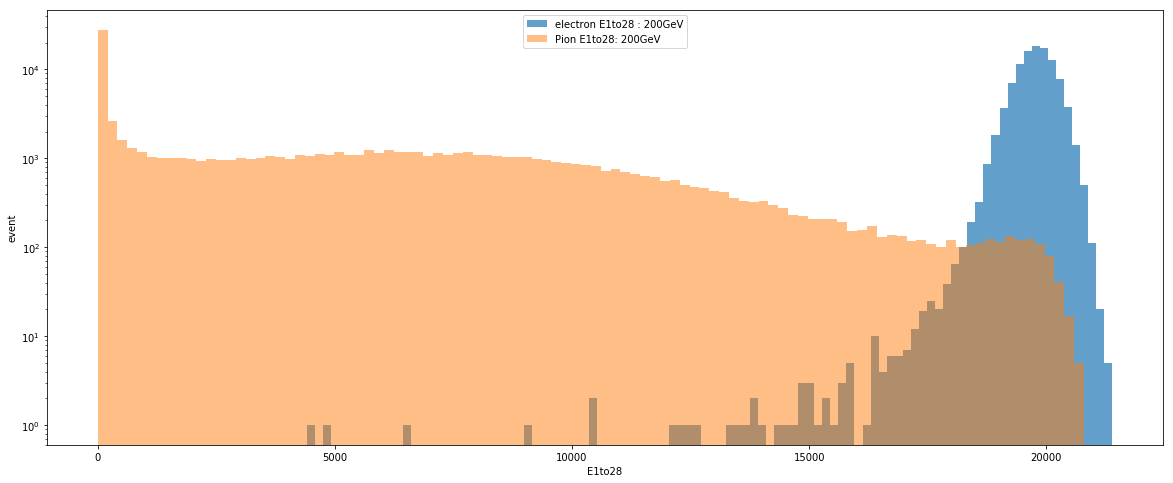

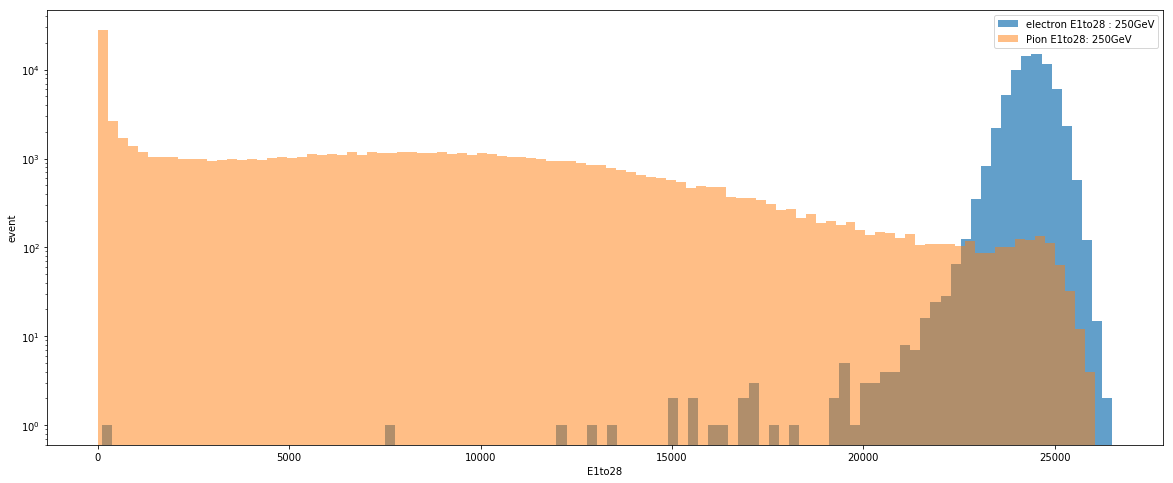

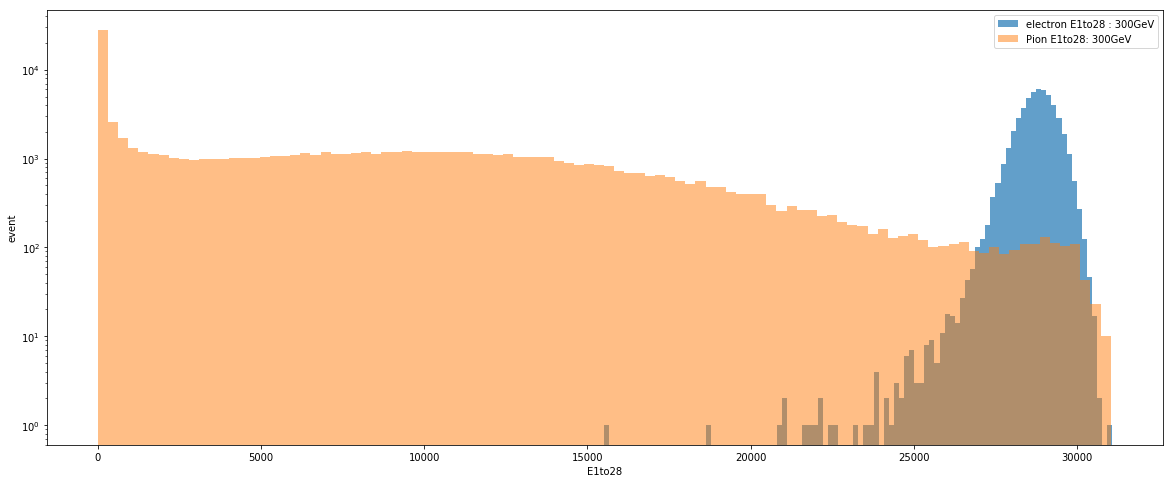

In [29]:
count = 1
bw = "E1to28"

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E1to28'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.50)
    plt.yscale('log')
    plt.legend()
    count += 1

##### Energy sum for all events E29-E40

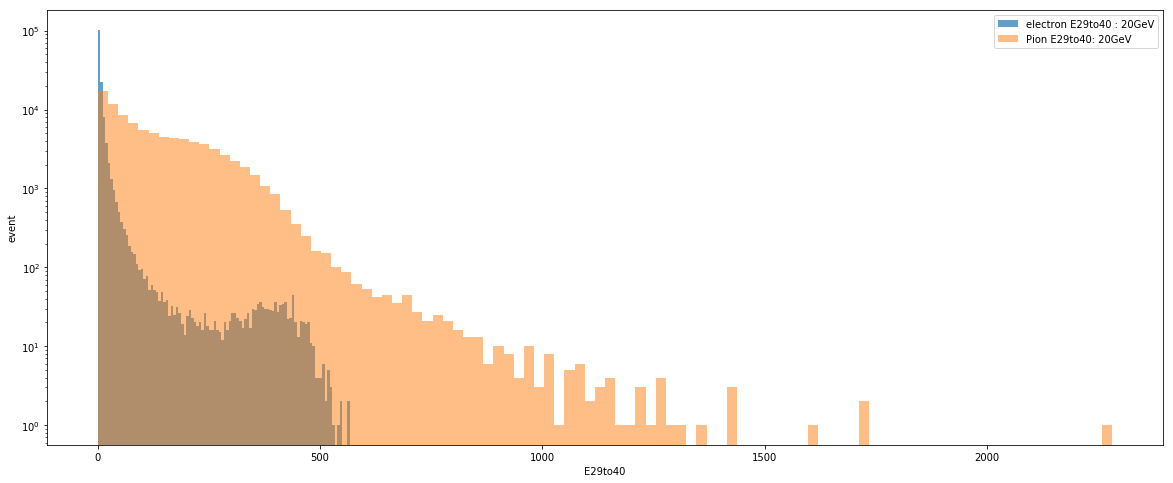

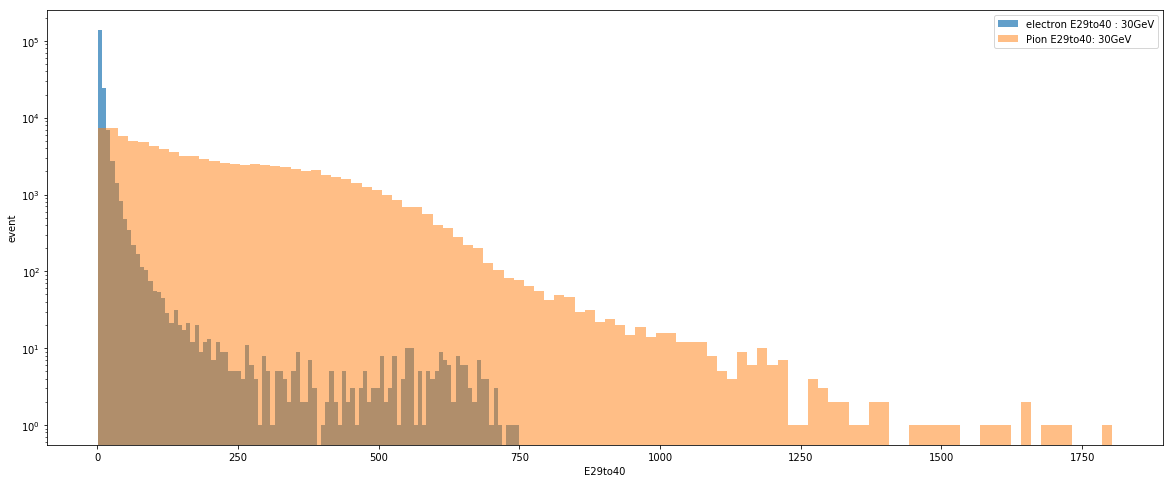

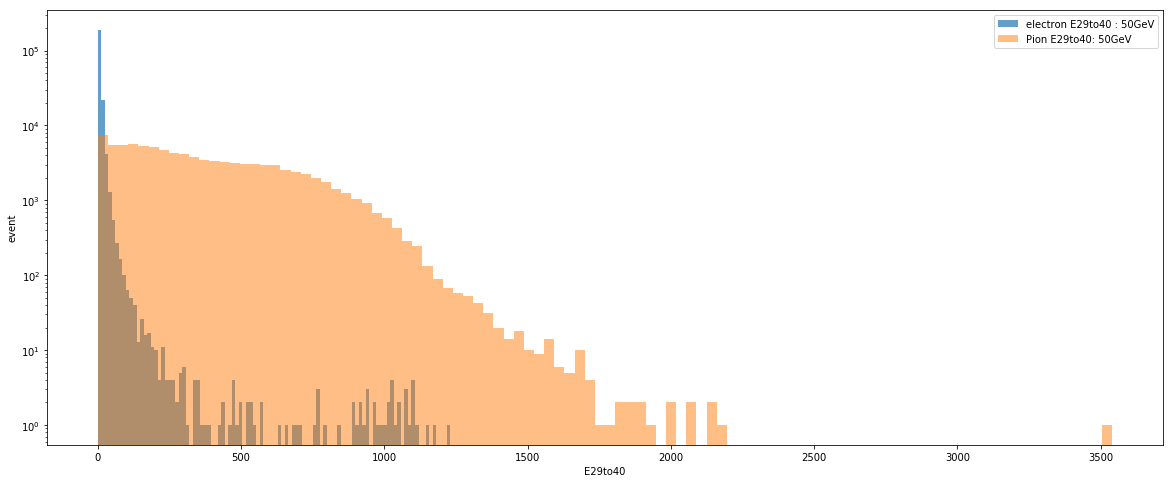

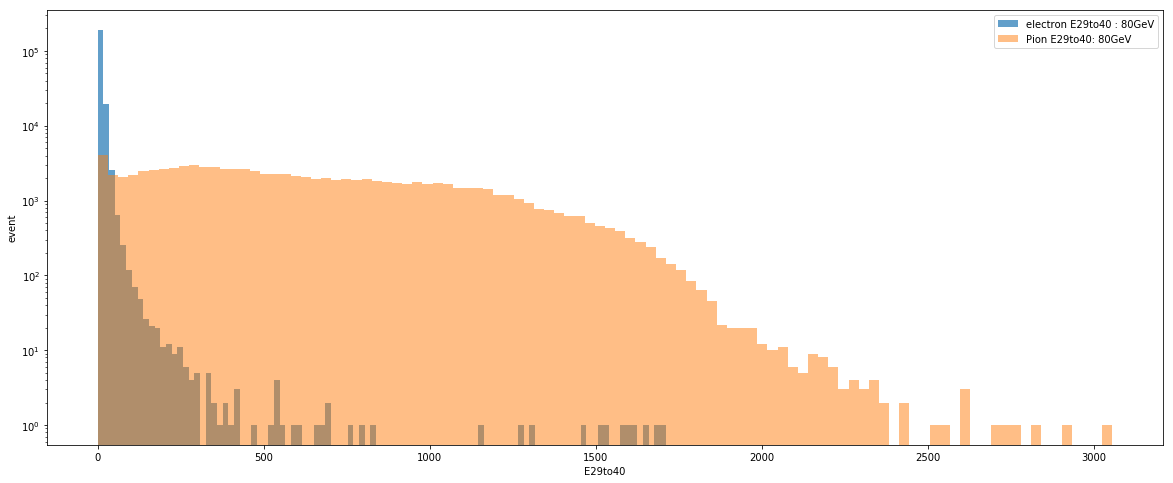

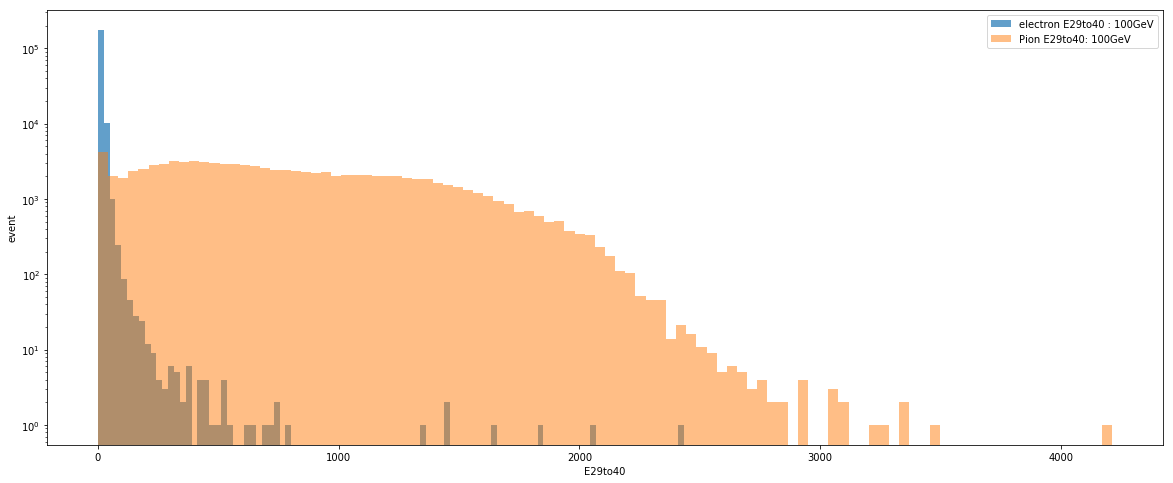

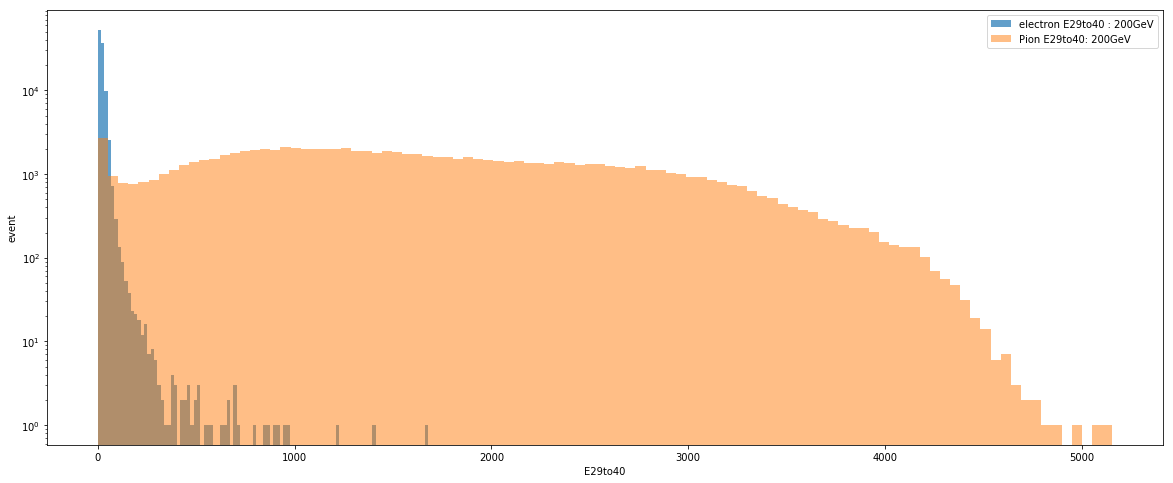

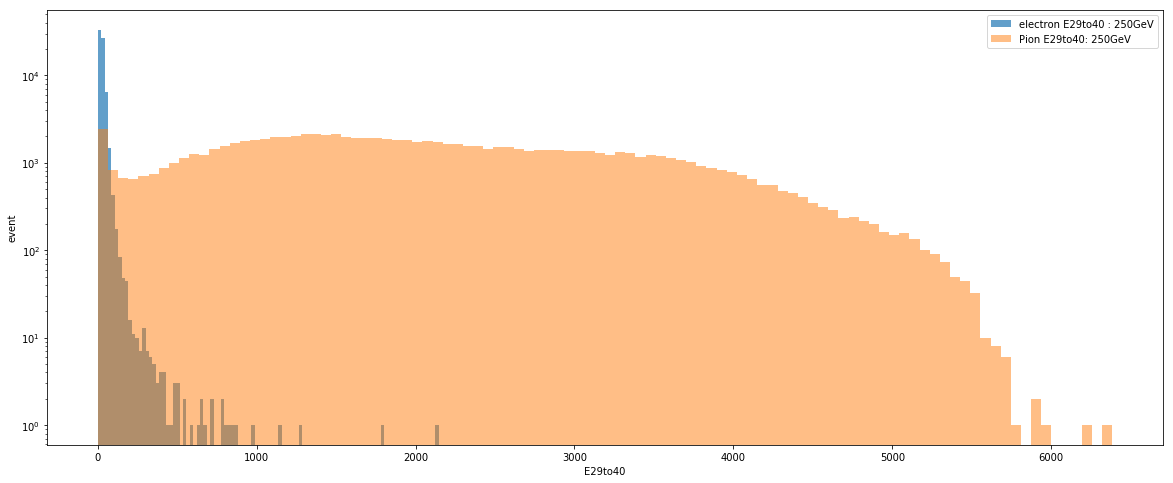

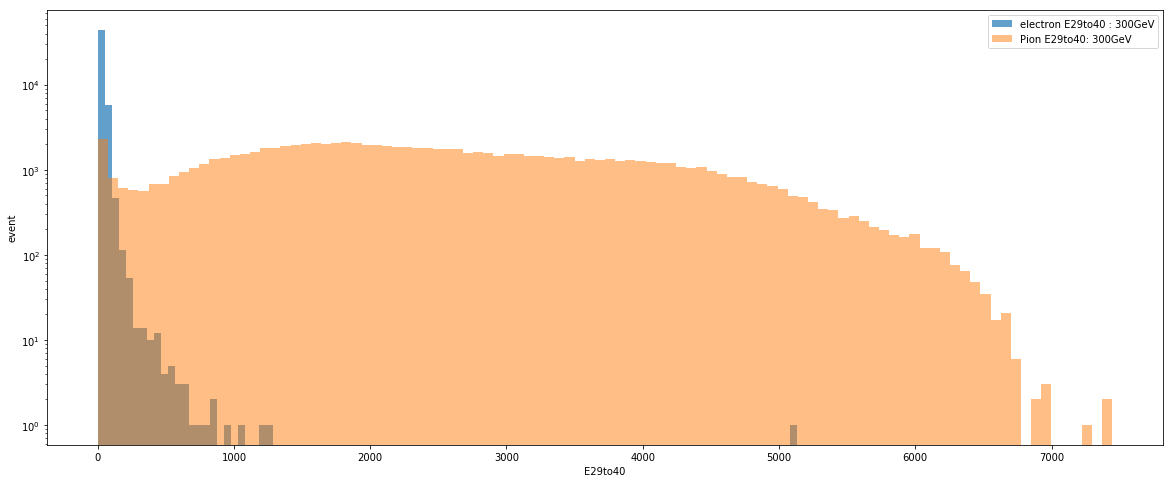

In [30]:
count = 1
bw = "E29to40"

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E29to40'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.50)
    plt.yscale('log')
    plt.legend()
    count += 1

##### E1-E10(E10) / Etot

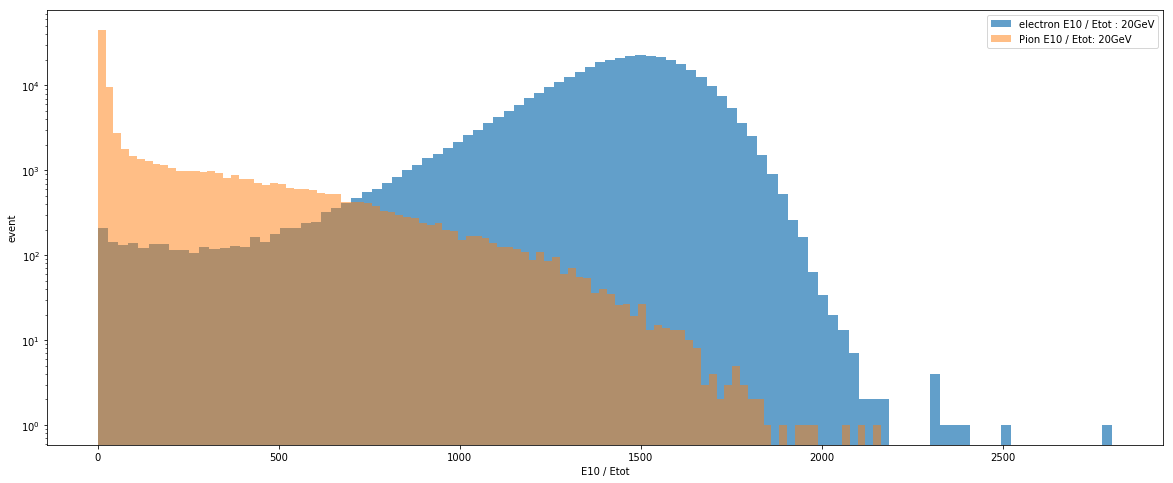

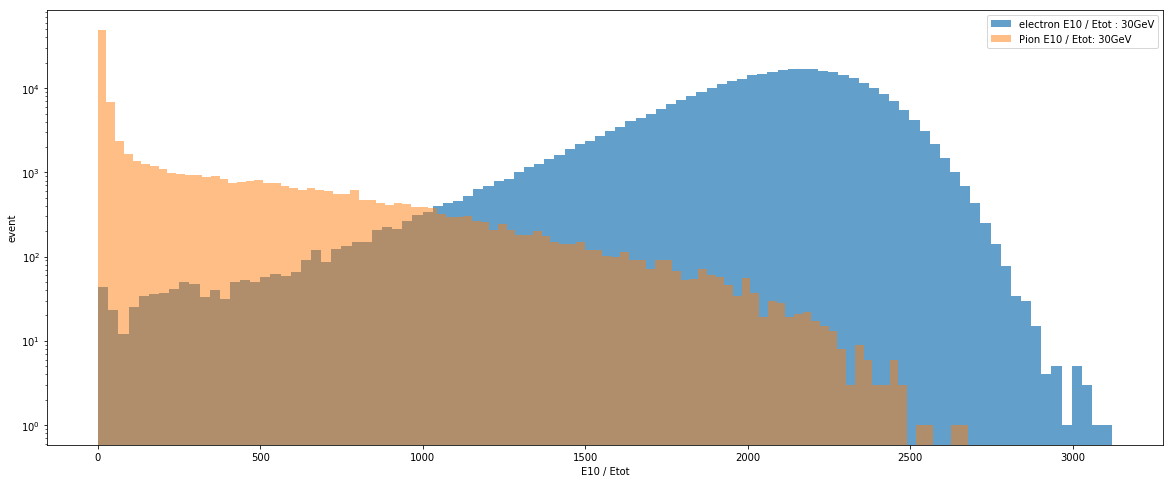

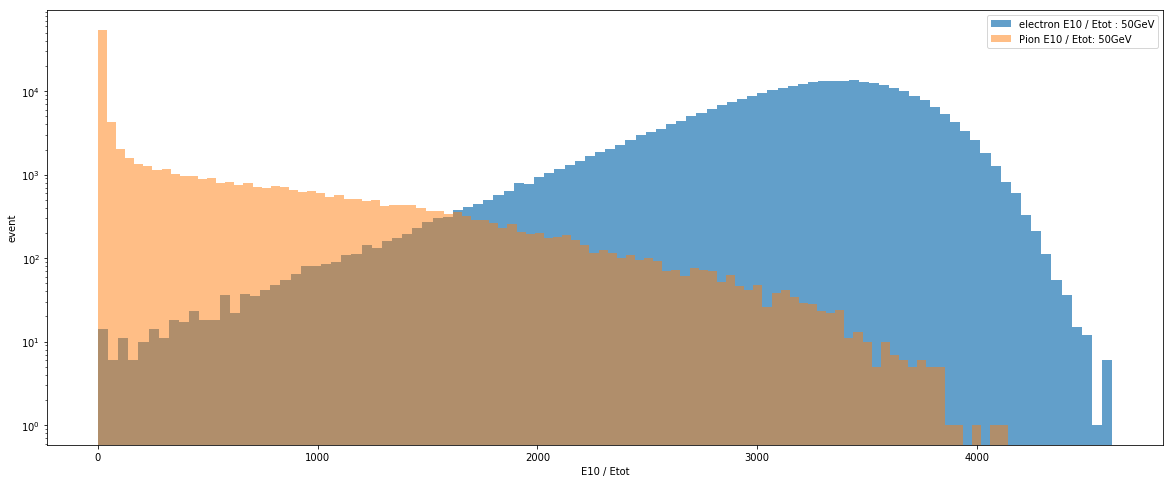

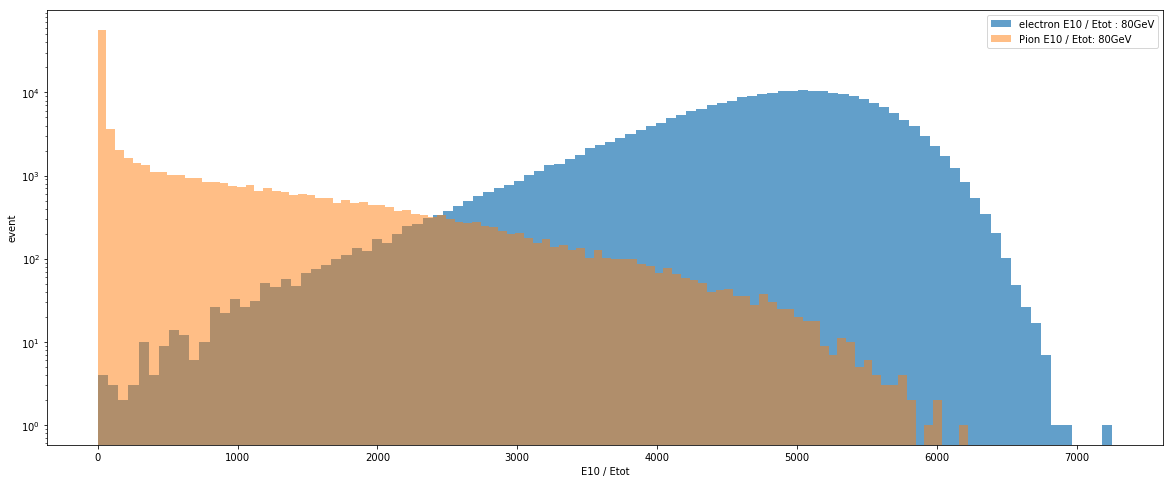

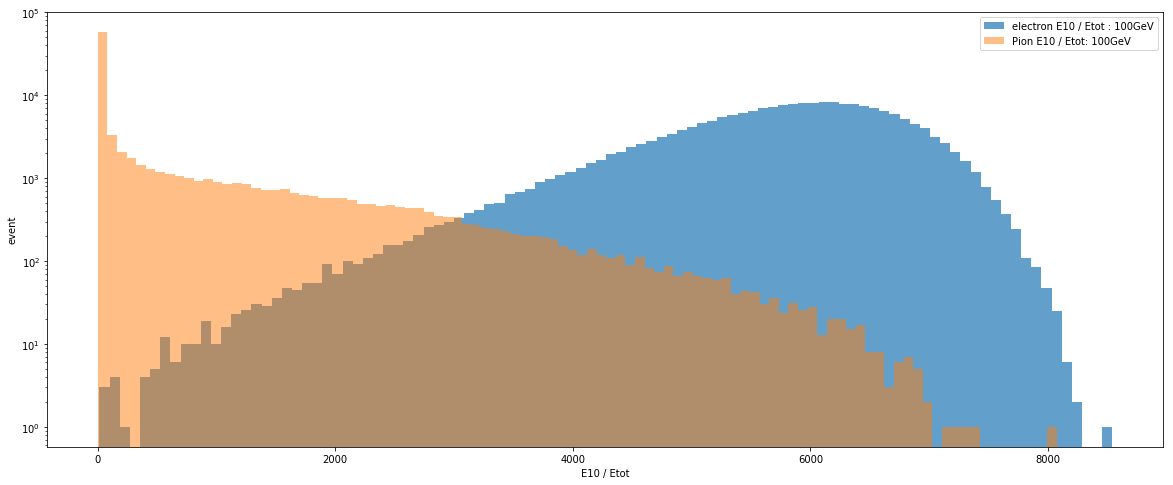

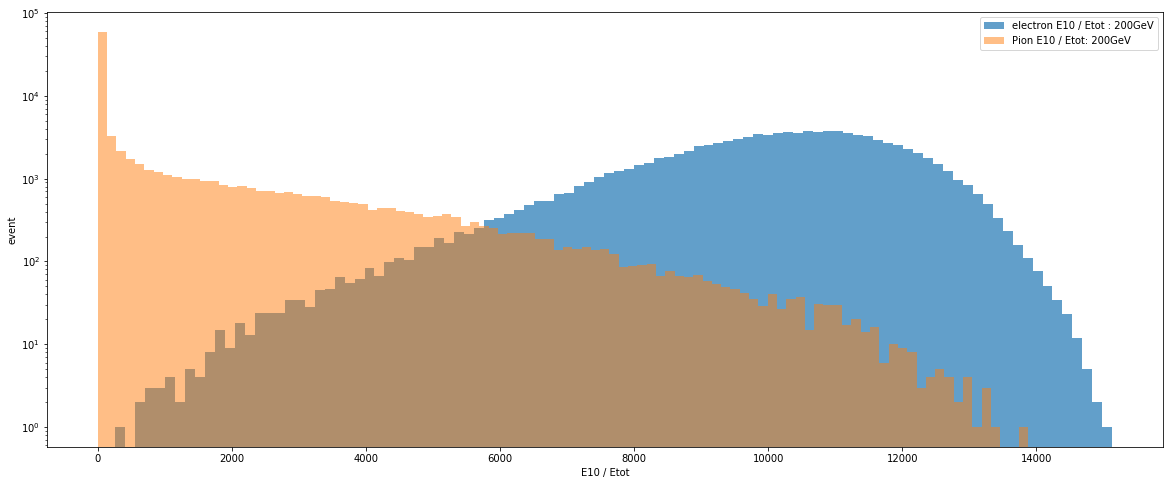

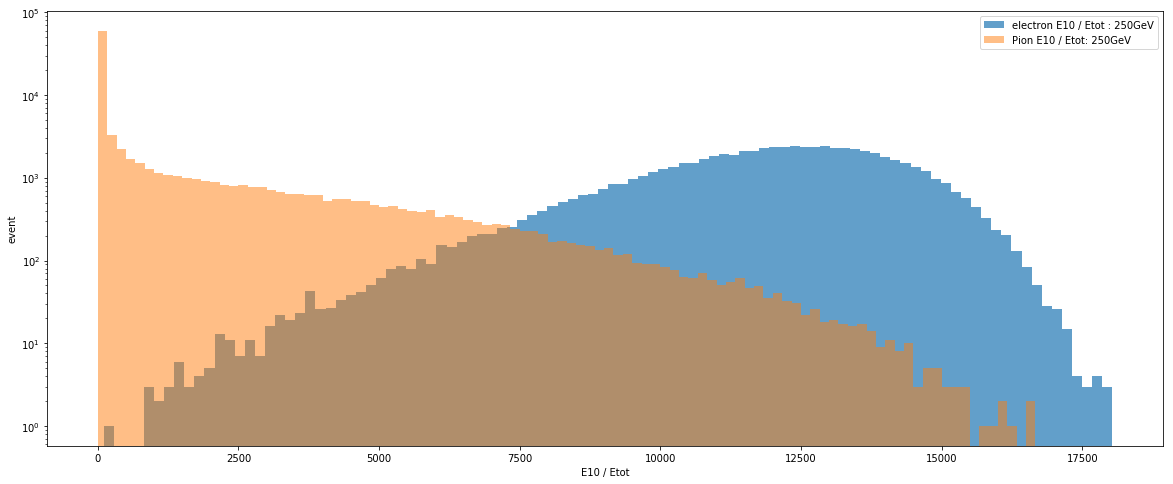

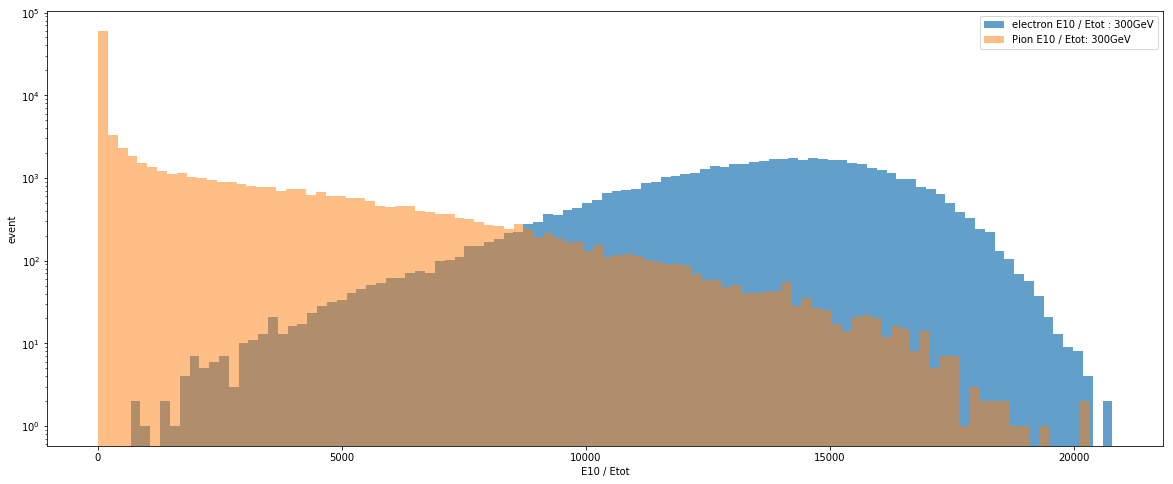

In [31]:
count = 1
bw = "E10 / Etot"

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E1to10byEtot'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.50)
    plt.yscale('log')
    plt.legend()
    count += 1

##### E1+E2 / Etot

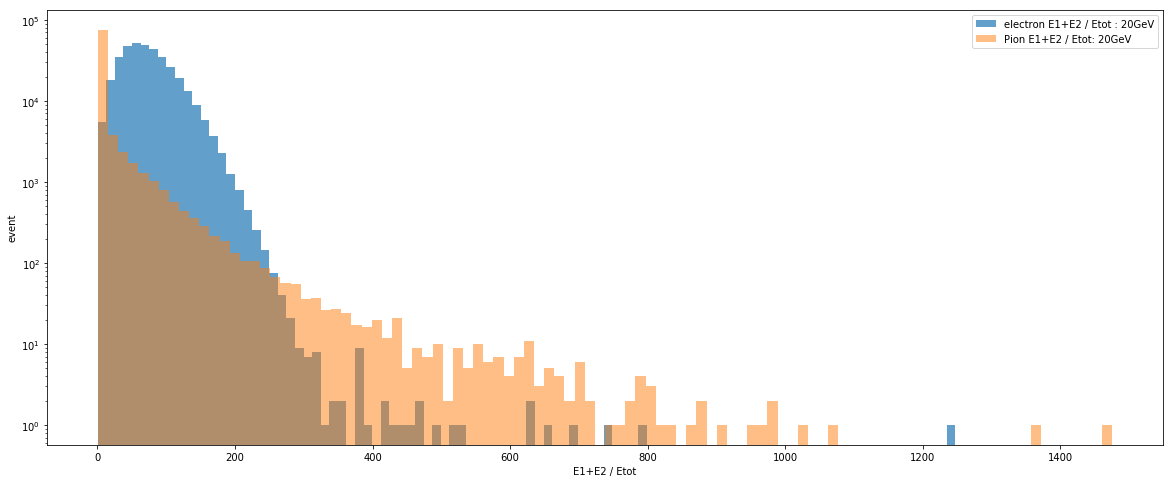

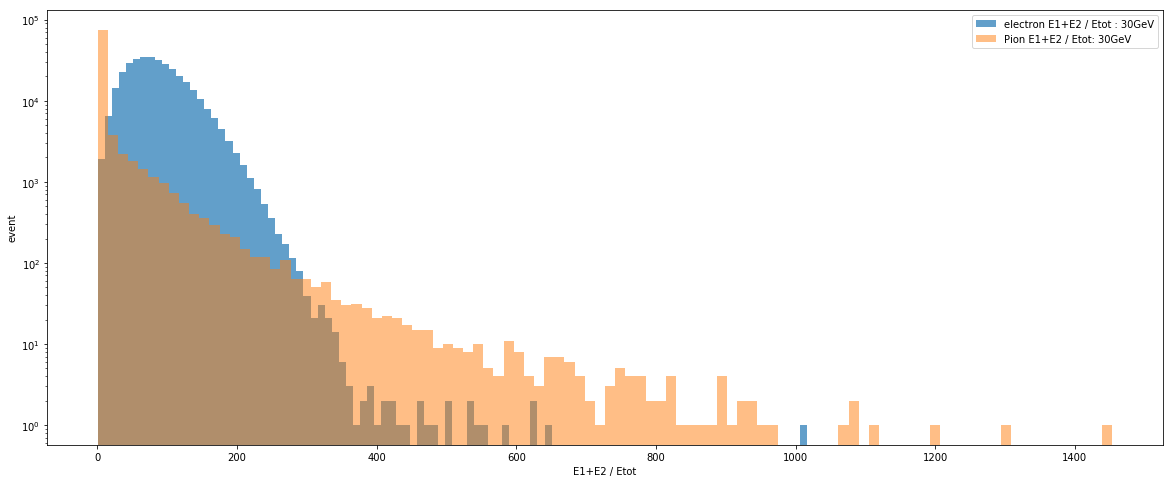

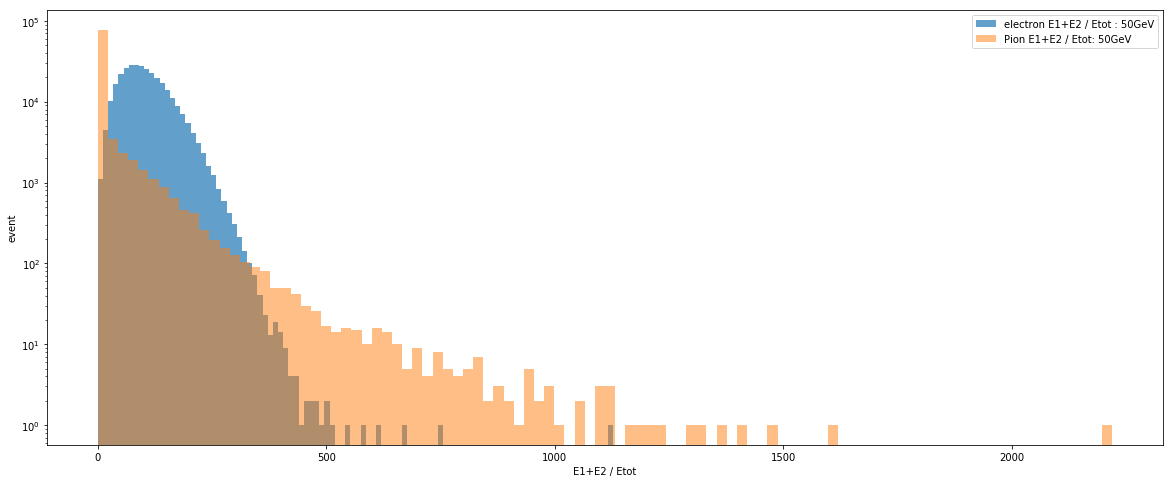

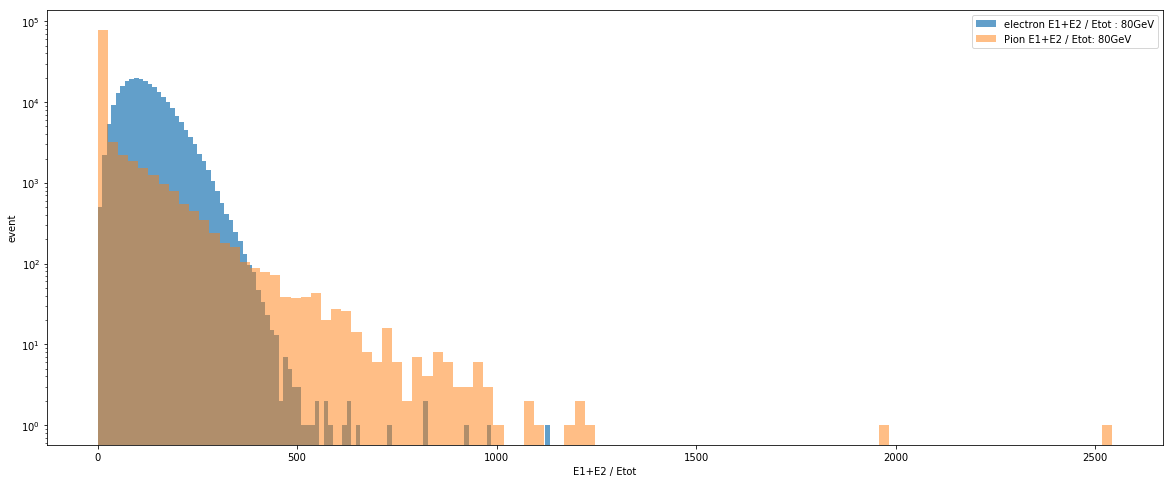

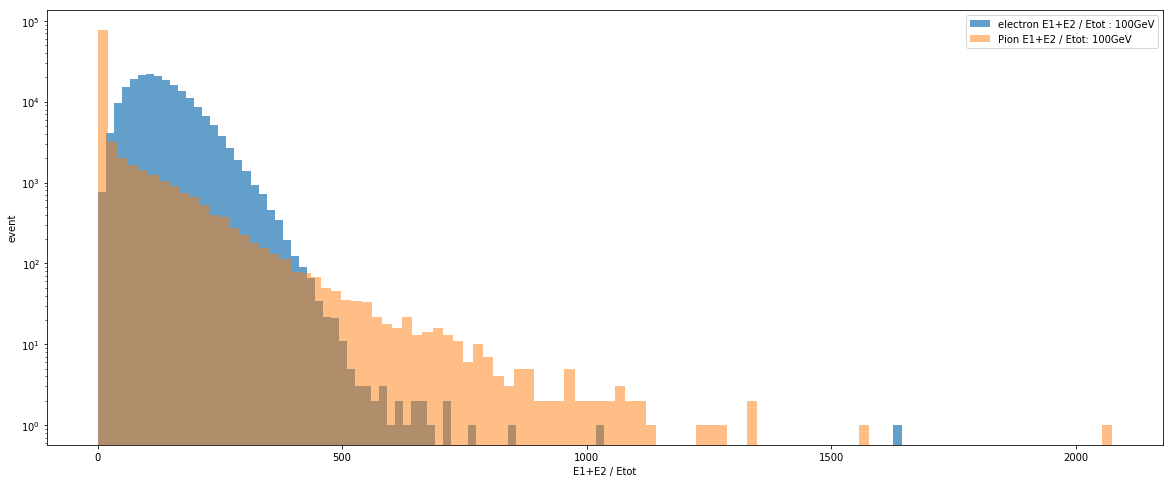

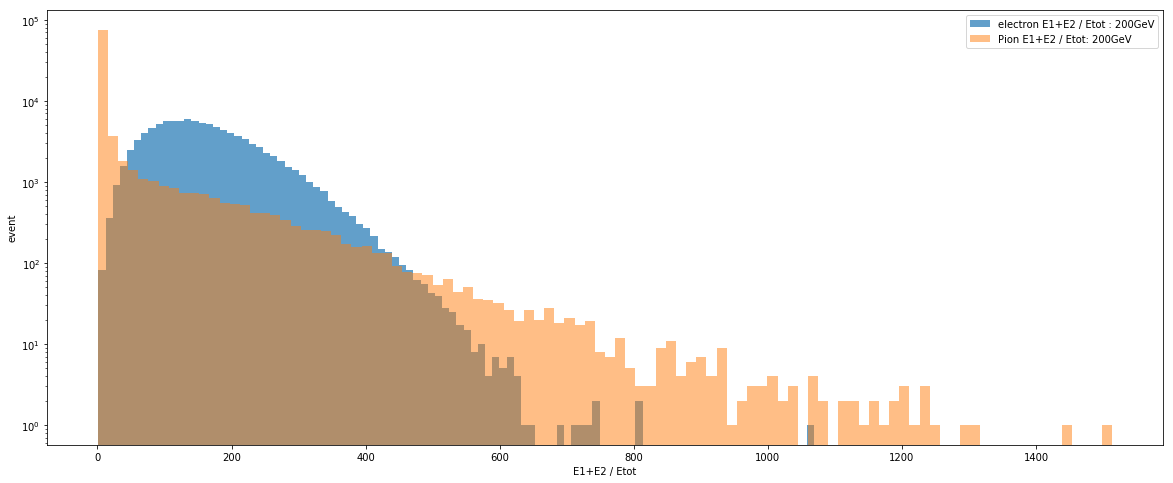

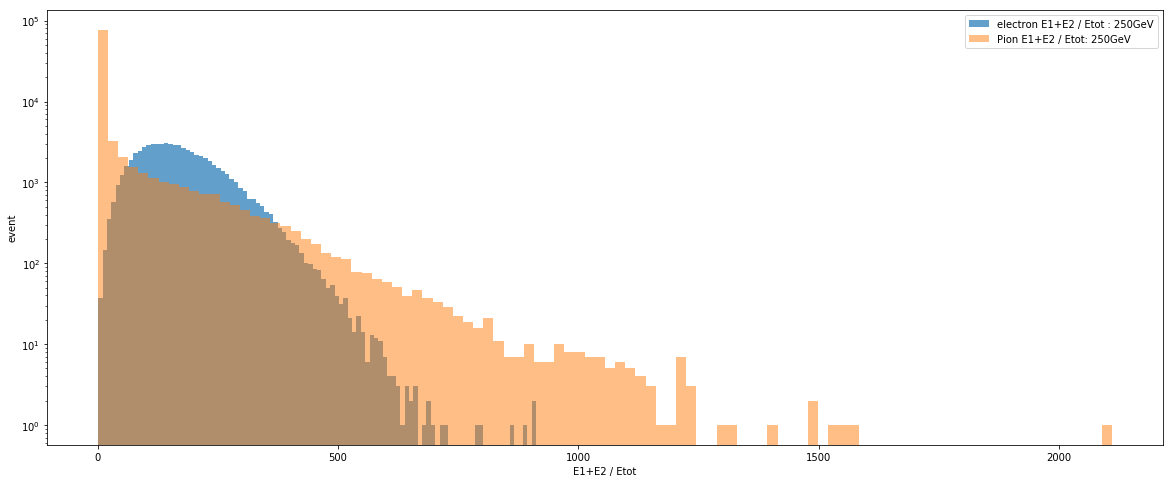

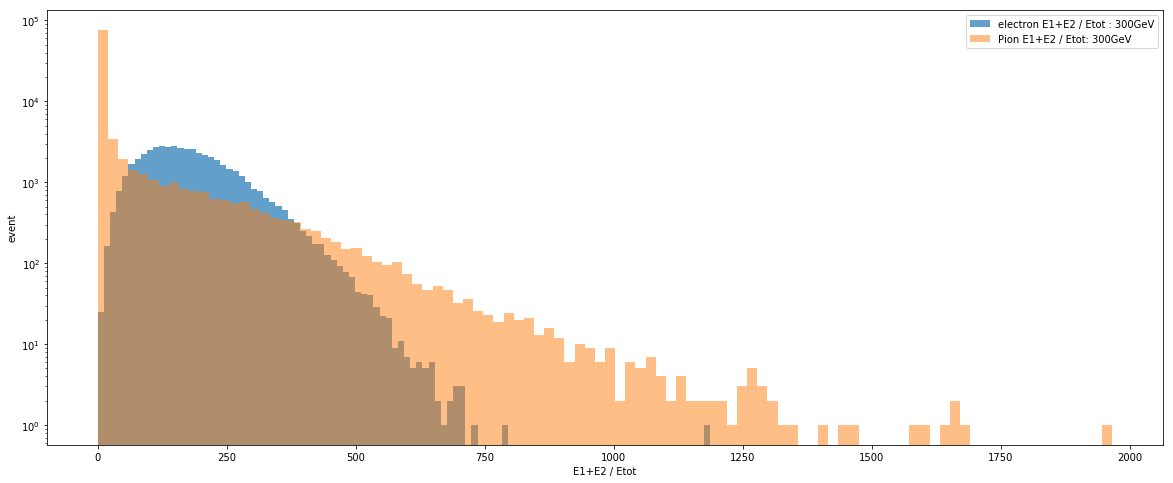

In [68]:
count = 1
bw = "E1+E2 / Etot"

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E1to2byEtot'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.50)
    plt.yscale('log')
    plt.legend()
    count += 1

##### E26+E27+E28/Etot 

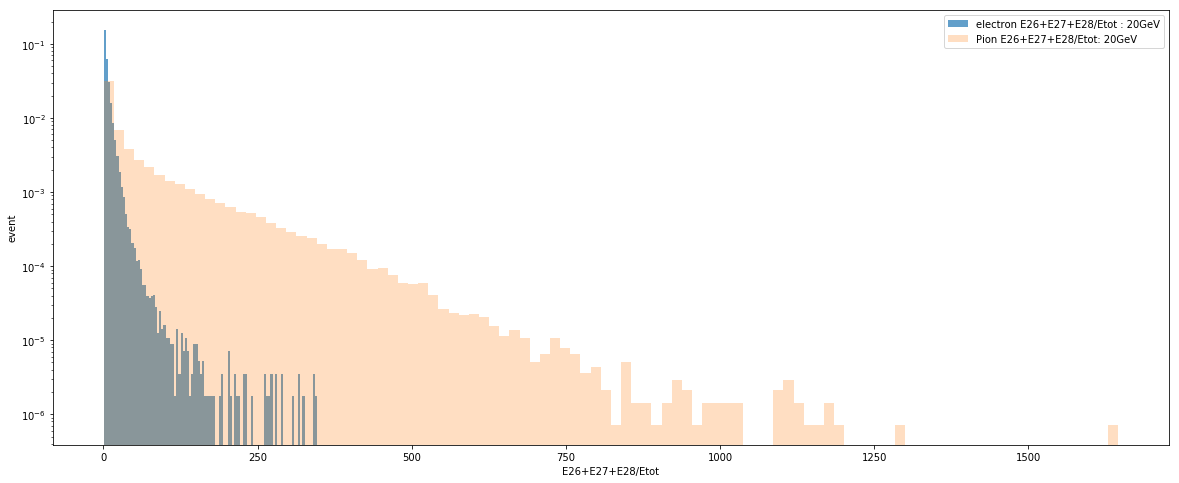

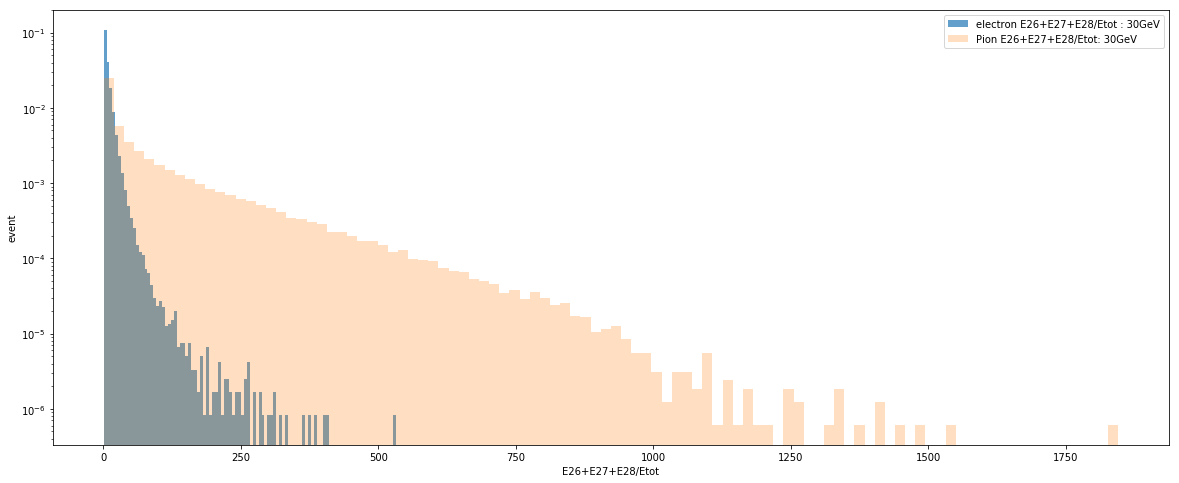

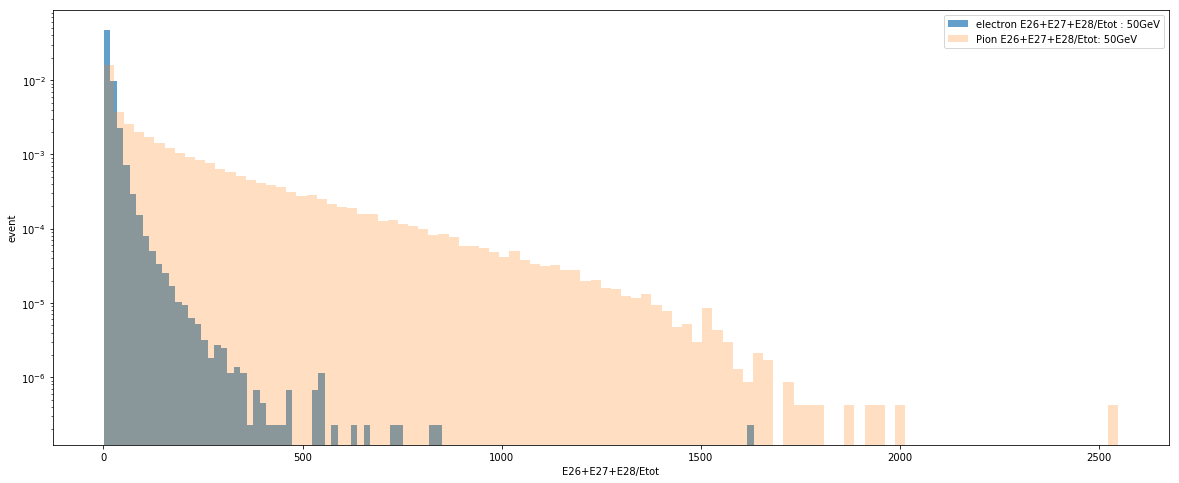

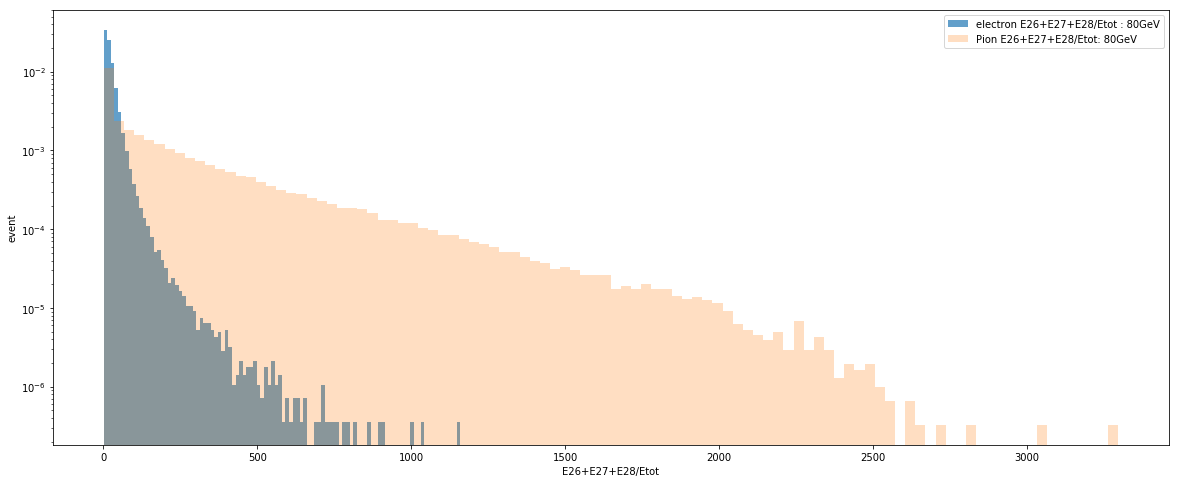

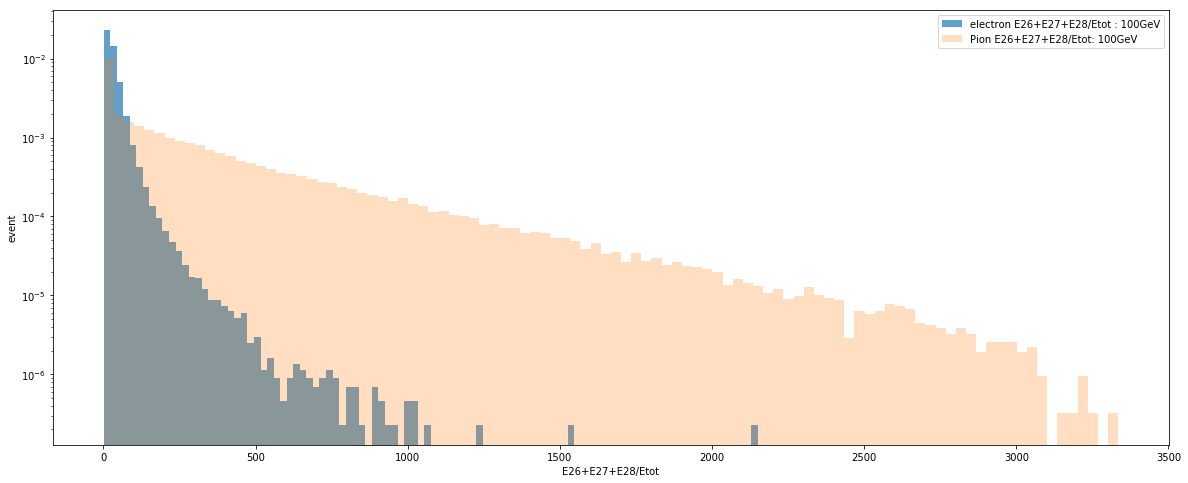

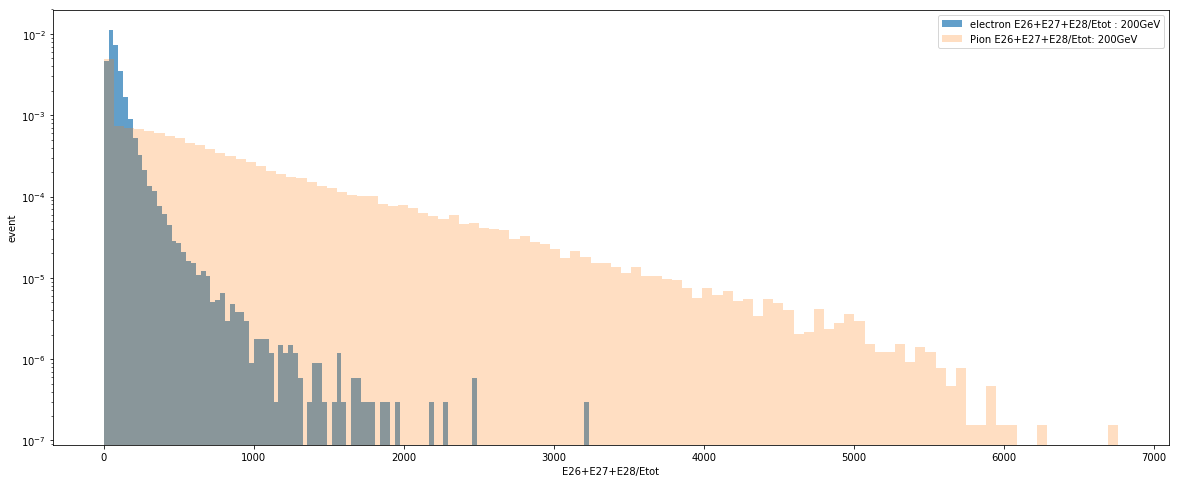

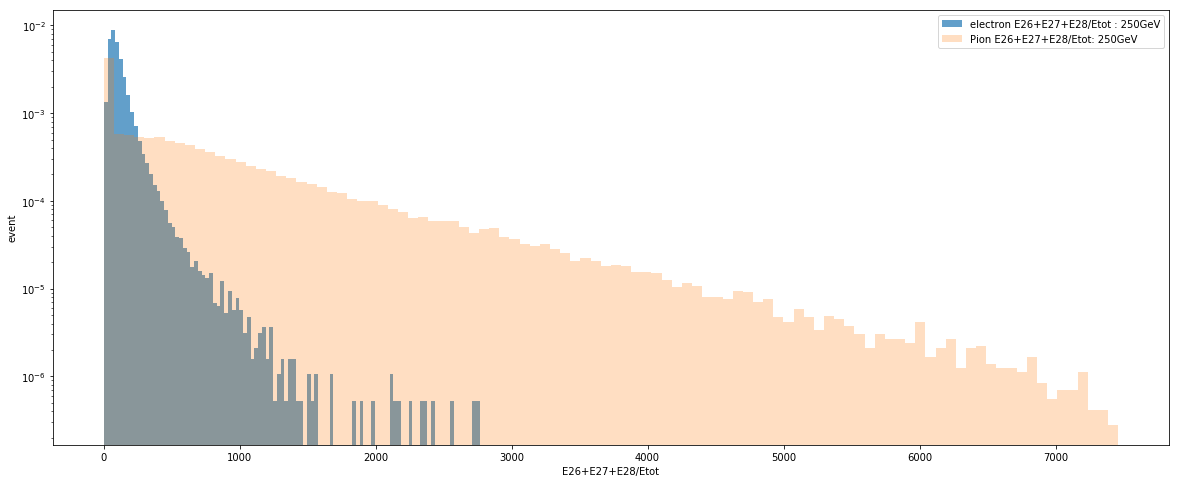

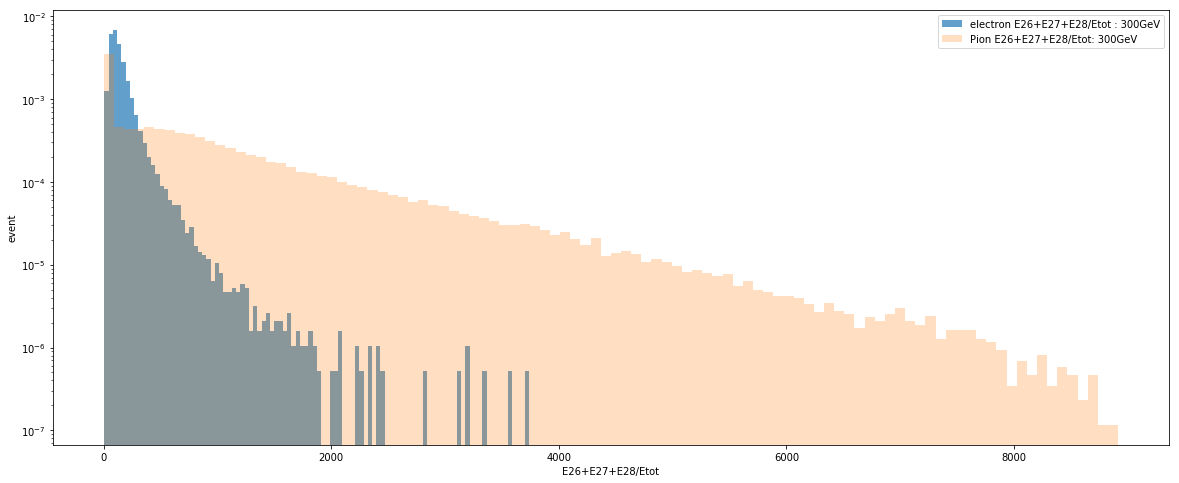

In [32]:
count = 1
bw = "E26+E27+E28/Etot"

for energy in energies:
#   longitudinal profile
    f = plt.figure(count,figsize = (20,8))
    
    key = 'E26to28byEtot'
    hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C0",label = "electron "+bw+" : %iGeV"%energy,alpha = 0.70,density = True)
    plt.xlabel(bw)
    plt.ylabel("event")
    plt.legend()

    hdf = pd.HDFStore(dataset_dir+"pion_%iGeV.h5"%energy,mode = 'a')
    temp = hdf['beam_%ieV'%energy][key]
    hdf.close()
    
    plt.hist(temp.dropna(), 100, color="C1",label = "Pion "+bw+": %iGeV"%energy,alpha = 0.25,density = True)
    plt.legend()
    plt.yscale('log') 
    count += 1

In [1]:
# # def get_hypot(df):
# #     df_group = df.groupby('event') # groupby events
# #     totE = df_group.rechit_energy.sum()
# #     dx = df.rechit_x - df_group.x_timesE.sum()/totE # baryX
# #     dy = df.rechit_y - df_group.y_timesE.sum()/totE # baryY
# #     return np.hypot(dx,dy)

# import seaborn as sns


# # ds_columns = ['baryX','baryY','baryZ','dR','hits','Etotal','E1to20','E21to28','E1to28',
# #               'E29to40','E1to10byEtot','E1to2byEtot','E26to28byEtot','E1to20byE21to28']

# # # sns.set(style="ticks", color_codes=True)
# # # g = sns.pairplot(iris)
# # hdf = pd.HDFStore(dataset_dir+"electron_%iGeV.h5"%20,mode = 'a')
# # temp = hdf['beam_%ieV'%20]
# # # hdf.close()
# # # hdf.keys()
# temp[ds_columns]
# dfgh = temp.fillna(0)
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(dfgh)

# # dfgh = temp[ds_columns].head()

# # print("sdfsdfs")
# # dfgh
# # sns.pairplot(dfgh, hue="species")

In [ ]:
# import re
# import sys
# import uproot
# import uproot._connect._pandas
# import concurrent.futures

# import numpy as np
# import pandas as pd

# sys.path.insert(0, '/eos/user/m/manoj/hgcal-electron-pion-classification/Analysis/')
# from data import load_data, x_times_e
# from observables import *
# from helpers import *

# try:
#     input_file = sys.argv[1]
#     print(input_file)
# except IndexError: as e:
#     raise Exception("Missing input file")

# try:
#     re.findall('*\.h5$',output_file)[0]:
# except IndexError: as e:
#     raise raise Exception("Output file must be a .h5 file")

# executor = concurrent.futures.ThreadPoolExecutor(16) # threads in pool
# chunksize = 10000
# columns = ['rechit_layer','rechit_energy','rechit_x','rechit_y','rechit_z']
# flag = None

# layers = []
# ds_columns = ['baryX','baryY','baryZ','dR','hits','Etotal','E1to20','E21to28','E1to28',
#               'E29to40','E1to10byEtot','E1to2byEtot','E26to28byEtot','E1to20byE21to28']

# for i in range (1,41): # all 40 layers columns
#     layers.append("E%i"%i)

# hits = uproot.open(input_file)['rechitntupler/hits'] # assuming every file has this key.
# no_of_events = len(hits['event'].array())
# start = 0
# dataset = pd.DataFrame(columns = ds_columns + layers) # empty dataframe

# print("Processing input file........")

# while start < no_of_events:
#     end = start + chunksize
#     if end > no_of_events:
#         end = start + no_of_events % chunksize

#     df = hits.pandas.df(columns, entrystart = start,entrystop = end,
#                         flatten = True,executor = executor)
#     start = end

# #             if flag == 'EE': # electromagnatic chamber
# #                 sel = (df.rechit_energy > 0.50) & (df.rechit_layer < 29) # remove insentric noise
# #             else:
#     sel = (df.rechit_energy > 0.50)
#     df = df[sel]

#     df.dropna(subset=['rechit_energy']) # drop missing rows
#     x_times_e(df) # add x * energy in dataset

#     df = df.reset_index(level=1,drop=True)
#     df.index.name = 'event'

#     _temp = pd.DataFrame(columns = ds_columns) # emplty dataframe

#     _temp.baryX = get_barycenter(df,'x')
#     _temp.baryY = get_barycenter(df,'y')
#     _temp.baryZ = get_barycenter(df,'z')

#     _temp.Etotal = total_energy(df)
#     _temp.dR = get_dr(_temp.baryX,_temp.baryY)
#     _temp.hits = [float(hit) for hit in df.groupby(['event']).size().values]

#     # E1-E20
#     _temp.E1to20 = enrgy_bw_layer(df,1,20)
#     # E21-E28
#     _temp.E21to28 = enrgy_bw_layer(df,21,28)
#     #E1-E28
#     _temp.E1to28 = enrgy_bw_layer(df,1,28)
#     #E29-E40
#     _temp.E29to40 = enrgy_bw_layer(df,29,40)
#     # E1-E8
#     # _temp.E1to8 = enrgy_bw_layer(df,1,8)

#     # E1-E2 / Etot
#     _temp.E1to2byEtot = enrgy_bw_layer(df,1,2)
#     # E26-E28 / Etot
#     _temp.E26to28byEtot = enrgy_bw_layer(df,26,28)
#     # E1-E10 / Etot
#     _temp.E1to10byEtot = enrgy_bw_layer(df,1,10)

#     # E1-E8 / E1-E20
#     # _temp.E1to8byE1to20 = _temp.E1to8 / _temp.E1to20
#     # E1-E20 / E21-E28
#     _temp.E1to20byE21to28 = _temp.E1to20 / _temp.E21to28

#     # get per layer energy
#     _temp = pd.concat([_temp,get_layers_df(df,_temp.index.unique(),layers)],axis=1)
#     dataset = dataset.append(_temp)
#     df, _temp = None, None

# dataset.index.name = 'event'

# print("Writing processed data into HDF5 file")
# hdf = pd.HDFStore(output_file, mode = 'a') # open file in append mode
# hdf.put('dataset',dataset,data_columns=True) 
# print("Process complete.")
# hdf.close()
# dataset = None

In [15]:
import re
re.findall('\.h5$',"hjjjhj..hh5")

[]